# Intelligent Systems Final Project - Notebook 01
This notebook will contain the initial exploration of the dataset as well as the data cleaning of the dataset. Furthermore, visual analysis will be made to analyze the treated data.

**The data used for the execution of this project will be the Hotel California  Datset.**

**Project Made By:** Daniel Kruk | Student no. w23063249

This project contains (exclude options that will be in other notebooks):
- Initial evaluation of the dataset;
- Data Cleaning and Treatment;
- Exploratory data analysis;
- Feature Engineering;
- Train-Test splitting;
- Model building and training;
- Model selection;

In [ ]:
# Mount Drive files
from google.colab import drive
import sys, os

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing general packages
import pandas as pd
import numpy as np
import math
from datetime import datetime, timedelta
import time

# Packages used for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Sequential Feature Selection
from sklearn.feature_selection import SequentialFeatureSelector as SFS



# For model building and data splitting
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from lazypredict.Supervised import LazyClassifier


# For Data Scaling
from sklearn.preprocessing import Normalizer, StandardScaler, RobustScaler, PowerTransformer


# To set definitions of visualizations
from pylab import rcParams

# Hide warnings in Notebook
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Future utils.py file
# Packages required to run the functions below

import math #using

import matplotlib.patches as mpatches
import matplotlib.colors
import seaborn as sns

import pandas as pd
import numpy as np
#import squarify
import matplotlib.pyplot as plt


from pylab import rcParams


'''
Firstly we are going to redefine the parameter which regards
the size of every graphic that is going to be displayed throughout this document
and we will also create a list that will contain our color code for this project
'''

rcParams['figure.figsize'] = 10, 6

col_code = ['#845EC2',
            '#DCB0FF',
            '#A178DF',
            '#BE93FD',
            '#FACCFF']

# creating a function that will automate the creation of piecharts
def auto_pie(
        series: pd.DataFrame,
        title: str,
        legend_title: str):
    # setting the color palette that will be used
    colours = col_code

    # creating the pie chart
    fig, ax = plt.subplots()
    ax.pie(series.value_counts(),
    labels=series.value_counts().index,
    colors=colours,
    autopct='%1.2f%%',
    textprops={'fontsize': 16})

    # setting the title and legend
    ax.set_title(title, fontsize=16)
    ax.legend(title=legend_title)

    # removing the y-label
    ax.set_ylabel('')

    # displaying the chart
    plt.show()


# creating a function that will automate the creation of histograms
def auto_hist(
        series: pd.DataFrame,
        title: str,
        x_axis_label: str,
        y_axis_label: str,
        n_bins: int = None):

    # creating the histogram itself
    plt.hist(series, bins=n_bins,
           color='#845EC2',
           edgecolor='black',
           linewidth=1.2)

    # setting the title and axis labels
    plt.title(title, fontsize=16)
    plt.xlabel(x_axis_label, fontsize=12)
    plt.ylabel(y_axis_label, fontsize=12)

    #displaying the created chart
    plt.show()

# Using
def metrics(y_train, pred_train , y_val, pred_val, to_print = True):

    train_acc_score = accuracy_score(y_train, pred_train)

    val_acc_score = accuracy_score(y_val, pred_val)

    if to_print == False:
        pass

    else:

        print('___________________________________________________________________________________________________________')
        print('                                                     TRAIN                                                 ')
        print('-----------------------------------------------------------------------------------------------------------')
        print(classification_report(y_train, pred_train))
        print(train_acc_score)
        print(confusion_matrix(y_train, pred_train))


        print('___________________________________________________________________________________________________________')
        print('                                                VALIDATION                                                 ')
        print('-----------------------------------------------------------------------------------------------------------')
        print(classification_report(y_val, pred_val))
        print(val_acc_score)
        print(confusion_matrix(y_val, pred_val))

    return train_acc_score, val_acc_score



def simplest_model_tester(model_version, #add typehint
                        training_x, #add typehint
                        training_y, #add typehint
                        validation_x, #add typehint
                        validation_y, #add typehint
                        to_print: bool = True):

    '''
    Add .info

    '''

    model_version.fit(training_x,training_y)

    # Creating predictions for training and validation x sets
    train_preds = np.round(model_version.predict(training_x), 0)
    val_preds = np.round(model_version.predict(validation_x), 0)

    return metrics(training_y, train_preds, validation_y, val_preds, to_print)



In [ ]:
#Importing the datasets (both training and testing) Drive version
hotel_data = pd.read_csv('/content/drive/MyDrive/Data Science (Bsc)/Year 3/Spring Semester (ERASMUS)/data/train_hotel.csv', index_col = 'BookingID')

In [ ]:
# Creating a copy of the original dataset
# to preserve a safe version of the original data
data = hotel_data.copy()

## Taking a first look at the dataset

In [ ]:
# Taking a first glance at the imported dataset
data

,ArrivalYear,ArrivalMonth,ArrivalWeekNumber,ArrivalDayOfMonth,ArrivalHour,WeekendStays,WeekdayStays,Adults,Children,Babies,...,OrderedMealsPerDay,FloorReserved,FloorAssigned,DailyRateEuros,DailyRateUSD,%PaidinAdvance,CountryofOriginAvgIncomeEuros (Year-2),CountryofOriginAvgIncomeEuros (Year-1),CountryofOriginHDI (Year-1),Canceled
BookingID,,,,,,,,,,,,,,,,,,,,,
10423,2016,3,13,21,18.00,1,2,2,0.0,0,...,1,6,3,85.00,84.1500,0.0,40141.59,40833.24,0.898,0
14038,2016,4,17,23,16.00,2,4,2,2.0,0,...,1,1,1,206.00,203.9400,0.0,7199.25,7096.60,0.572,1
37179,2016,12,53,28,16.00,0,1,2,0.0,0,...,1,6,6,138.00,136.6200,0.0,28742.44,29668.86,0.842,1
15019,2016,4,18,30,15.25,2,5,2,0.0,0,...,1,6,6,109.81,108.7119,0.0,28742.44,29668.86,0.842,0
30385,2016,5,21,17,15.50,0,2,2,0.0,0,...,1,6,5,140.00,138.6000,0.0,28742.44,29668.86,0.842,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23233,2016,2,6,4,21.25,0,2,1,0.0,0,...,1,6,6,62.10,61.4790,0.0,28742.44,29668.86,0.842,1
32833,2016,7,28,8,16.75,0,1,2,2.0,0,...,1,1,1,168.30,166.6170,0.0,36194.87,36909.33,0.876,1
30966,2016,2,6,6,16.00,2,6,2,0.0,0,...,0,6,6,62.58,61.9542,0.0,49233.22,50302.07,0.926,0


From looking at the output above, there are no immediate inconsistencies or outliers that we can identify.

## Checking information regarding our features and missing values using .info()

We should also take a look at the amount of missing values existent per variable as well as the data types of our variables. We will do so by using the `.info()` method.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13938 entries, 10423 to 24861
Data columns (total 33 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ArrivalYear                             13938 non-null  int64  
 1   ArrivalMonth                            13938 non-null  int64  
 2   ArrivalWeekNumber                       13938 non-null  int64  
 3   ArrivalDayOfMonth                       13938 non-null  int64  
 4   ArrivalHour                             13938 non-null  float64
 5   WeekendStays                            13938 non-null  int64  
 6   WeekdayStays                            13938 non-null  int64  
 7   Adults                                  13938 non-null  int64  
 8   Children                                13938 non-null  float64
 9   Babies                                  13938 non-null  int64  
 10  FirstTimeGuest                          13938 non-null  int

## Taking a look at the descriptive statistics of the numerical data

To take an overall look at the state of the dataset and to identify possible outliers that may exist within the data we will use the `.describe()` method

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ArrivalYear,13938.0,2016.000000,0.000000,2016.000,2016.000000,2016.000,2016.000,2016.000
ArrivalMonth,13938.0,6.854498,3.175421,1.000,4.000000,7.000,10.000,12.000
ArrivalWeekNumber,13938.0,28.851413,13.901656,1.000,17.000000,29.000,41.000,53.000
ArrivalDayOfMonth,13938.0,15.888148,8.850454,1.000,8.000000,16.000,24.000,31.000
ArrivalHour,13938.0,18.874121,2.884563,14.000,16.250000,19.000,21.250,23.750
WeekendStays,13938.0,0.882695,0.945422,0.000,0.000000,1.000,2.000,14.000
WeekdayStays,13938.0,2.292510,1.735639,0.000,1.000000,2.000,3.000,35.000
Adults,13938.0,1.885852,0.547217,0.000,2.000000,2.000,2.000,4.000
Children,13938.0,0.141627,0.452717,0.000,0.000000,0.000,0.000,3.000
Babies,13938.0,0.006959,0.116244,0.000,0.000000,0.000,0.000,10.000


There are no missing values in any of the columns, which is very good as we will not require inputing artificial values. However, we do have some problems with the datatypes of our features therefore we should correct them straight away.

# Data Treatment and PreProcessing

## Checking for duplicate rows

In [ ]:
# Checking for duplicate rows
duplicated_rows = data[data.duplicated()]
duplicated_rows

,ArrivalYear,ArrivalMonth,ArrivalWeekNumber,ArrivalDayOfMonth,ArrivalHour,WeekendStays,WeekdayStays,Adults,Children,Babies,...,OrderedMealsPerDay,FloorReserved,FloorAssigned,DailyRateEuros,DailyRateUSD,%PaidinAdvance,CountryofOriginAvgIncomeEuros (Year-2),CountryofOriginAvgIncomeEuros (Year-1),CountryofOriginHDI (Year-1),Canceled
BookingID,,,,,,,,,,,,,,,,,,,,,


We have no duplicate rows whatsoever, so we can proceed without having to input values

## Analysing the distribution of the variables using plots


### Binary Variables

As we've seen we have various binary variables in the dataset, and in this section we will be analyzing them using simple pie-charts.

We will also insert in this section, a quick verification of the balance of our outcome variable ("Canceled")

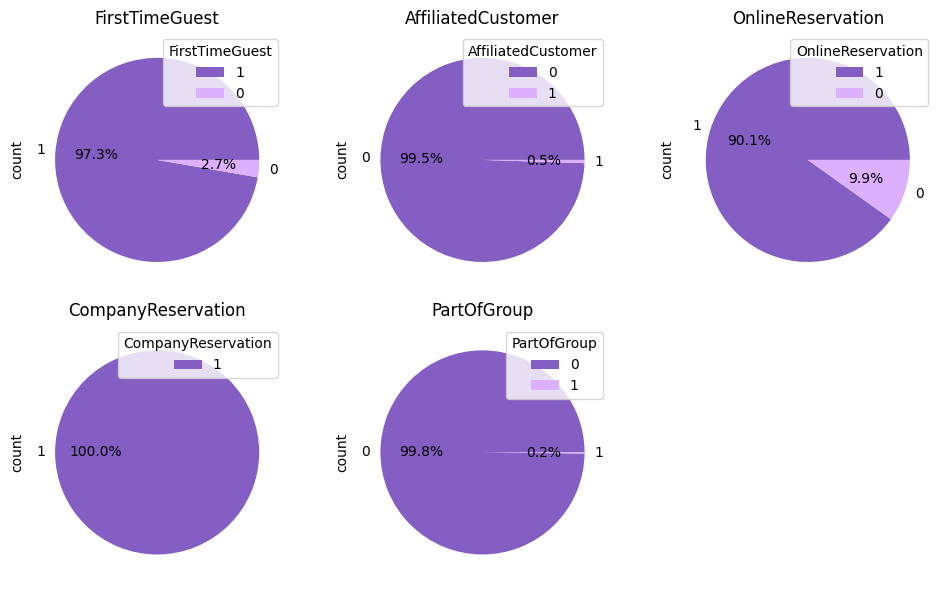

In [ ]:
# Compiling together names of binary variables
bin_var_names = ['FirstTimeGuest', 'AffiliatedCustomer', 'OnlineReservation', 'CompanyReservation', 'PartOfGroup', 'Canceled']
# Defining size basics for the mini plots
mini_plot_fig_size = (10, 6)

# Creating loop to create every pie chart
for i, name in enumerate(bin_var_names):
  if name != 'Canceled':
    plt.subplot(2, 3, i+1)  # Defining the subplot layout
    plt.title(name)  # Setting the subplot title
    data[name].value_counts().plot.pie(autopct='%1.1f%%',
                                       colors = col_code)  # Plotting pie chart
    plt.legend(title=name,
               loc = 'upper right')  # Add legend with categories

plt.tight_layout()  # Adjust layout
plt.show()  # Display plots

We can se that the distribution of every variable that is plotted above is extremely unbalanced. The following plots tell us the following about our customers:
- First Time Guest: The majority of our customers are making their first reservation with the company;
-
-

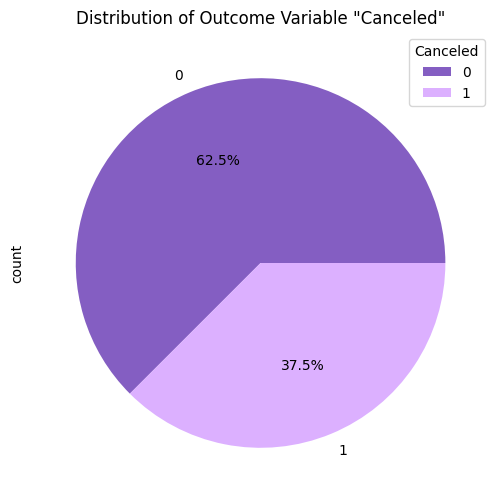

In [ ]:
# Plotting a pie chart to visualize outcome variable value counts
data['Canceled'].value_counts().plot.pie(autopct='%1.1f%%',
                                    colors = col_code)  # Plotting pie chart

plt.title('Distribution of Outcome Variable "Canceled"')

plt.legend(title='Canceled',
            loc = 'upper right')  # Add legend with categories

plt.show()

#### Analyzing the numerical variables

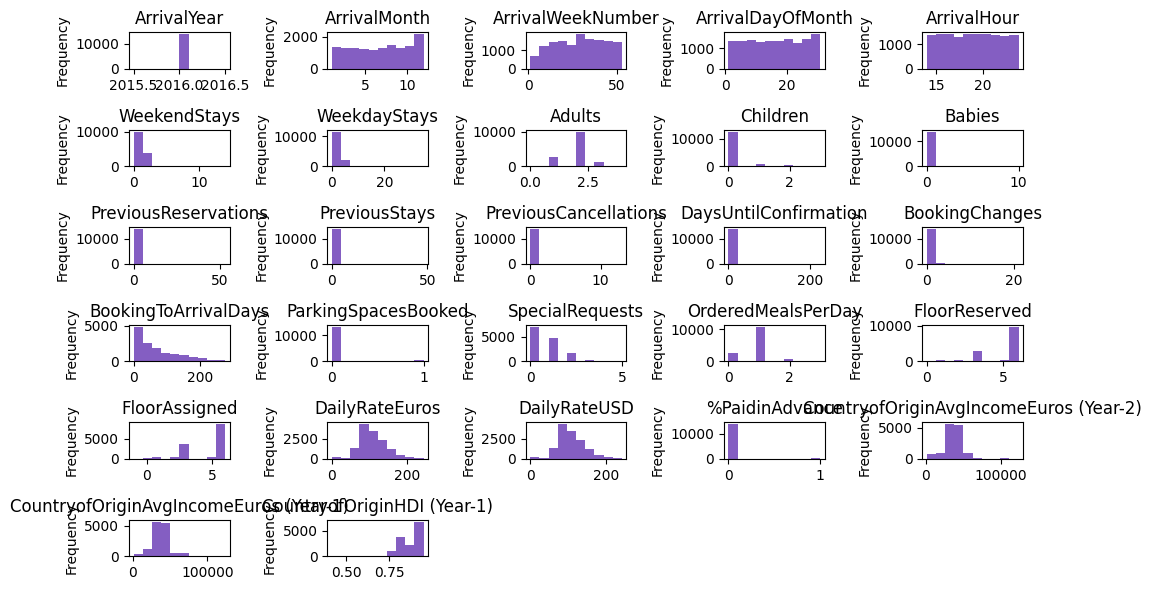

In [ ]:
# Compiling together names of non-binary variables
num_var_names = []
for var in data:
  if var not in bin_var_names:
    num_var_names.append(var)

# Defining size basics for the mini plots
mini_plot_fig_size = (10, 6)

# Calculate number of rows and columns for subplots
num_vars = len(num_var_names)
num_rows = math.ceil(num_vars ** 0.5)  # Square root to get close to square shape
num_cols = math.ceil(num_vars / num_rows)

# Creating loop to create every histogram
for i, name in enumerate(num_var_names):
    plt.subplot(num_rows, num_cols, i+1)  # Defining the subplot layout dynamically
    plt.title(name)  # Setting the subplot title
    data[name].plot.hist(color = '#845EC2')  # Plotting histogram for the current variable

plt.tight_layout()  # Adjust layout
plt.show()  # Display plots


From looking at the plots above, we can clearly see that some of the variables do not follow a continuous distribution. Those variables are:
- Adults;
- Children;
- Babies;
- SpecialRequests;
- OrderedMealsPearDay;
- FloorReserved;
- FloorAssigned;


Some of those other variables, due to their lack of descriptive power (since some their values are mostly the same in some cases) could be engineered in order to create some other variables that could be more informative regarding the observations' characteristics. Some of them could be:
- ParkingSpacesBooked - almost nobody reserves a Parking Space and thos who do, don't reserve more than one so we could **transform it into binary**
- Previous (Cancelations and Reservations) - since the vast majority of the pooled customers are first time clients of the hotel, obviously most of the values will be arround zero. These variables are even unlikely to be maintained in the dataset because they are a bit repetitive in comparison to *FirstTimeGuest* for example

### Discrete Distribution Variables
In this section we will take a closer look at the variables that we deemed in the previous section as Categorical Variables (discrete dist. variables)

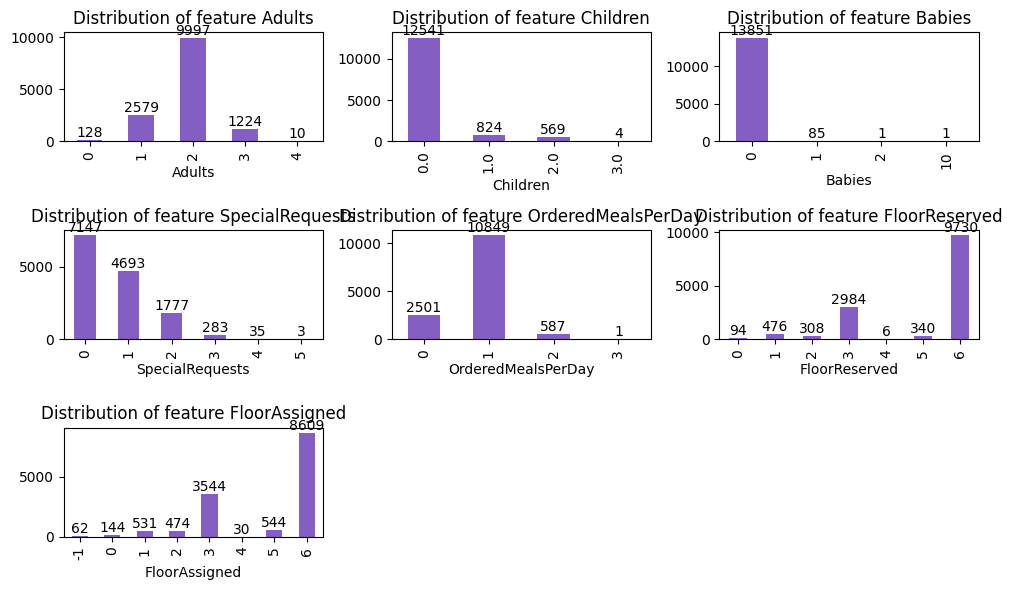

In [ ]:
cat_var_names = ['Adults',
                 'Children',
                 'Babies',
                 'SpecialRequests',
                 'OrderedMealsPerDay',
                 'FloorReserved',
                 'FloorAssigned']

# Using the previously defined size for the miniplots ()
mini_plot_fig_size = (14, 8)

# Calculate number of rows and columns for subplots
num_vars_cat = len(cat_var_names)
num_rows_cat = math.ceil(num_vars_cat ** 0.5)  # Square root to get close to square shape
num_cols_cat = math.ceil(num_vars_cat / num_rows_cat)

# Creating loop to create every pie chart
for i, name in enumerate(cat_var_names):
      plt.subplot(num_rows_cat, num_cols_cat, i+1)  # Defining the subplot layout
      plt.title(f"Distribution of feature {name}")  # Setting the subplot title

      # Getting value counts, sorting, and then plotting
      value_counts_sorted = data[name].value_counts().sort_index()
      value_counts_sorted.plot.bar(color='#845EC2')  # Plotting bar chart with a sky blue color

      # Displaying values on top of the bars
      for index, value in enumerate(value_counts_sorted):
          plt.text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()  # Adjust layout
plt.show()  # Display plots

#### Continuous numerical variables distribution

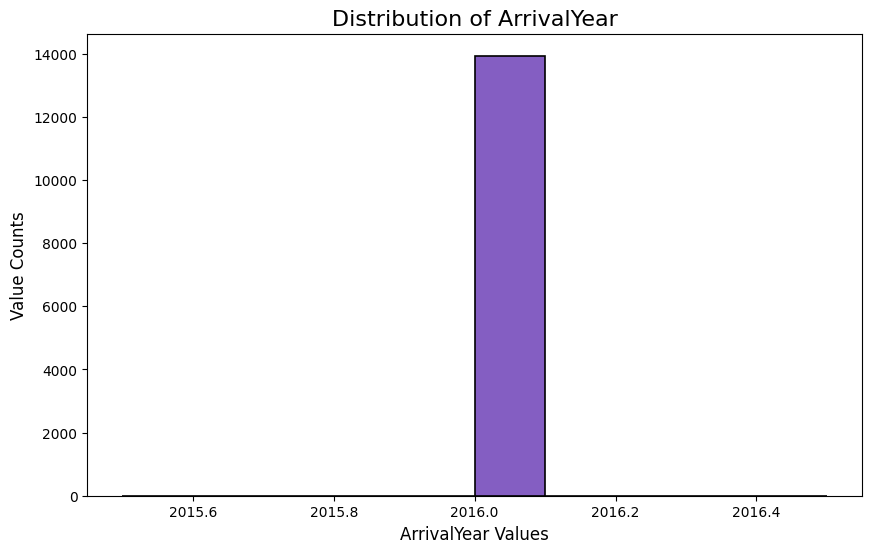

In [ ]:
# Plotting the distribution ArrivalYear
auto_hist(data['ArrivalYear'],
          f'Distribution of ArrivalYear',
          'ArrivalYear Values',
          'Value Counts')

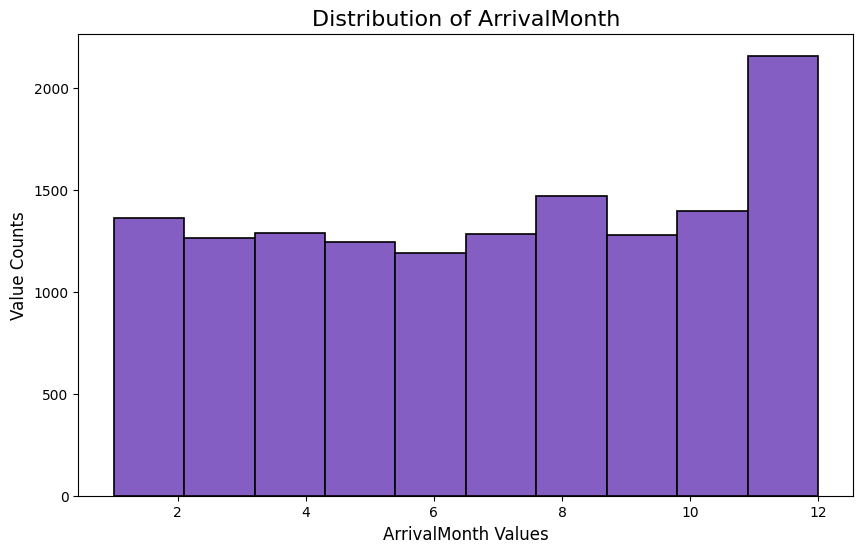

In [ ]:
# Plotting the distribution of ArrivalMonth
auto_hist(data['ArrivalMonth'],
          f'Distribution of ArrivalMonth',
          'ArrivalMonth Values',
          'Value Counts')

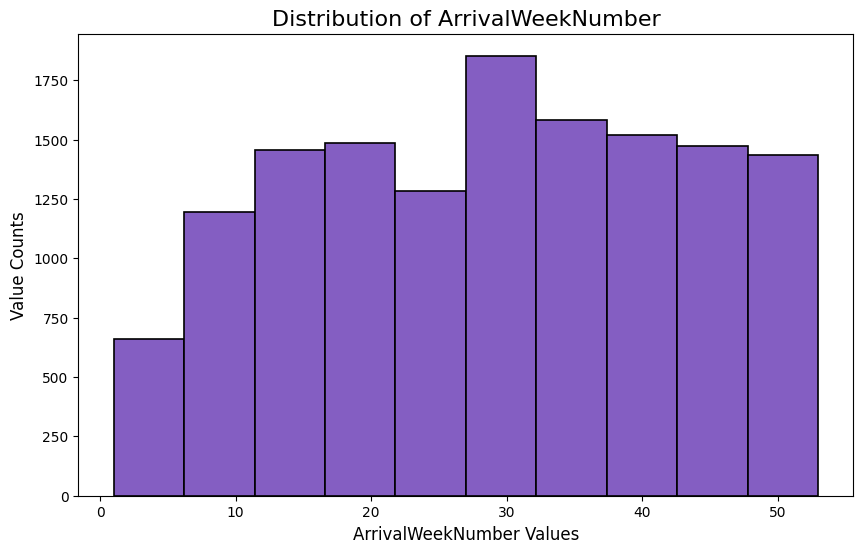

In [ ]:
# Plotting the distribution of ArrivalWeekNumber
auto_hist(data['ArrivalWeekNumber'],
          f'Distribution of ArrivalWeekNumber',
          'ArrivalWeekNumber Values',
          'Value Counts')

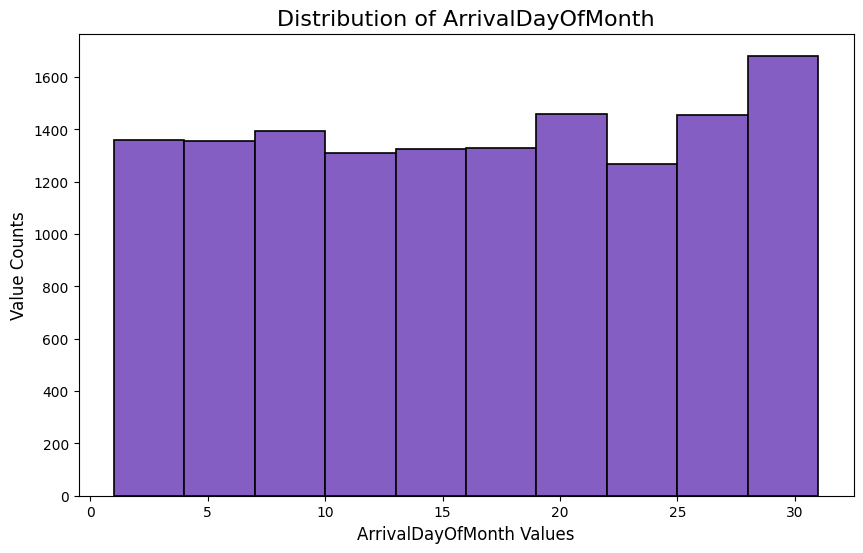

In [ ]:
# Plotting the distribution of ArrivalDayOfMonth
auto_hist(data['ArrivalDayOfMonth'],
          f'Distribution of ArrivalDayOfMonth',
          'ArrivalDayOfMonth Values',
          'Value Counts')

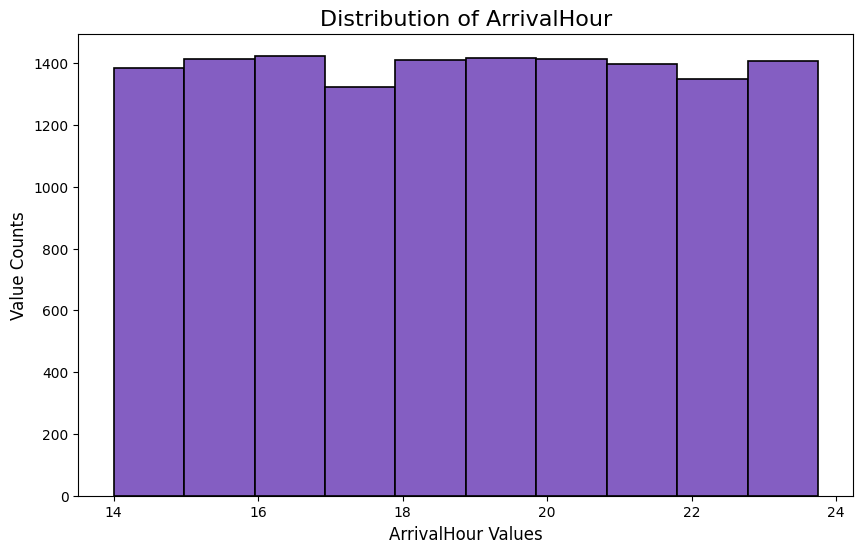

In [ ]:
# Plotting the distribution of ArrivalHour
auto_hist(data['ArrivalHour'],
          f'Distribution of ArrivalHour',
          'ArrivalHour Values',
          'Value Counts')

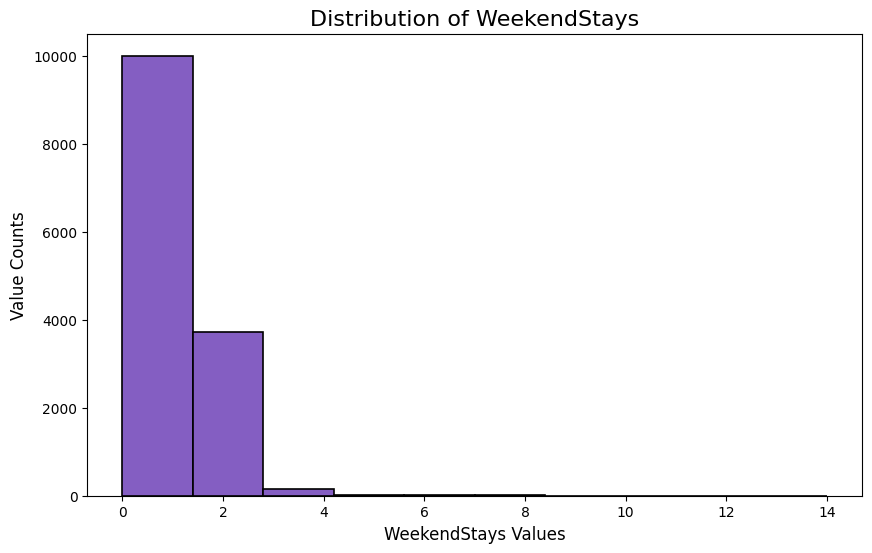

In [ ]:
# Plotting the distribution of WeekendStays
auto_hist(data['WeekendStays'],
          f'Distribution of WeekendStays',
          'WeekendStays Values',
          'Value Counts')

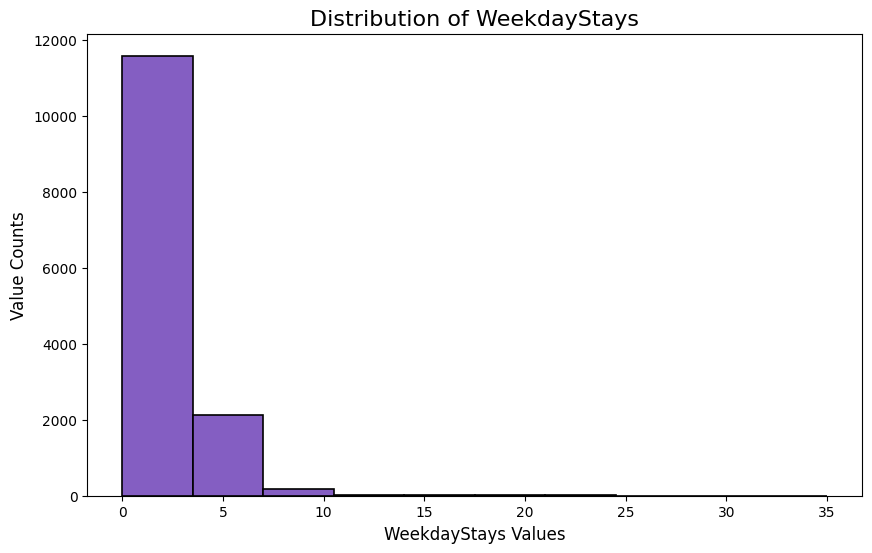

In [ ]:
# Plotting the distribution of WeekdayStays
auto_hist(data['WeekdayStays'],
          f'Distribution of WeekdayStays',
          'WeekdayStays Values',
          'Value Counts')

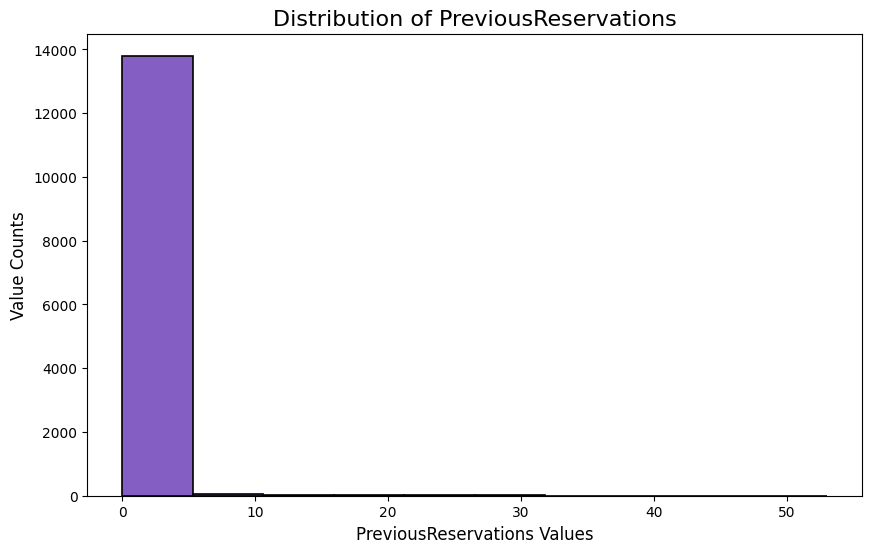

In [ ]:
# Plotting the distribution of PreviousReservations
auto_hist(data['PreviousReservations'],
          f'Distribution of PreviousReservations',
          'PreviousReservations Values',
          'Value Counts')

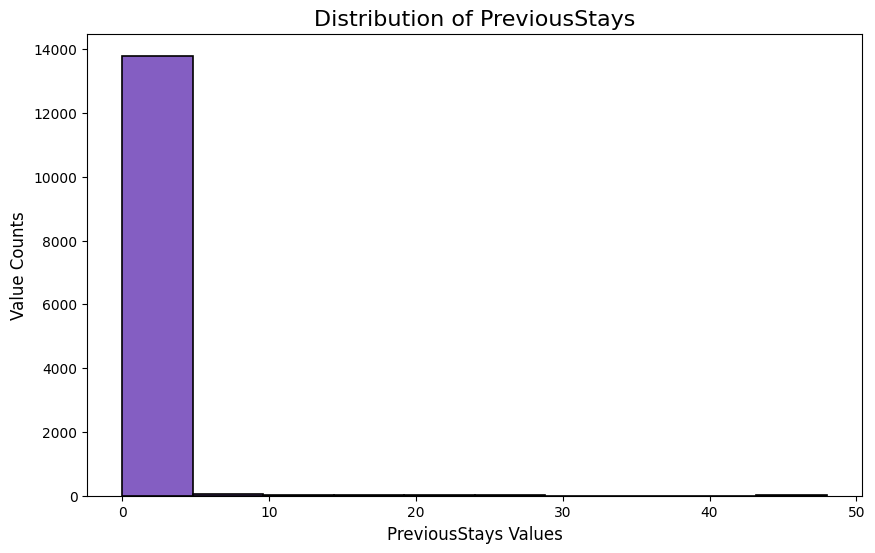

In [ ]:
# Plotting the distribution of PreviousStays
auto_hist(data['PreviousStays'],
          f'Distribution of PreviousStays',
          'PreviousStays Values',
          'Value Counts')

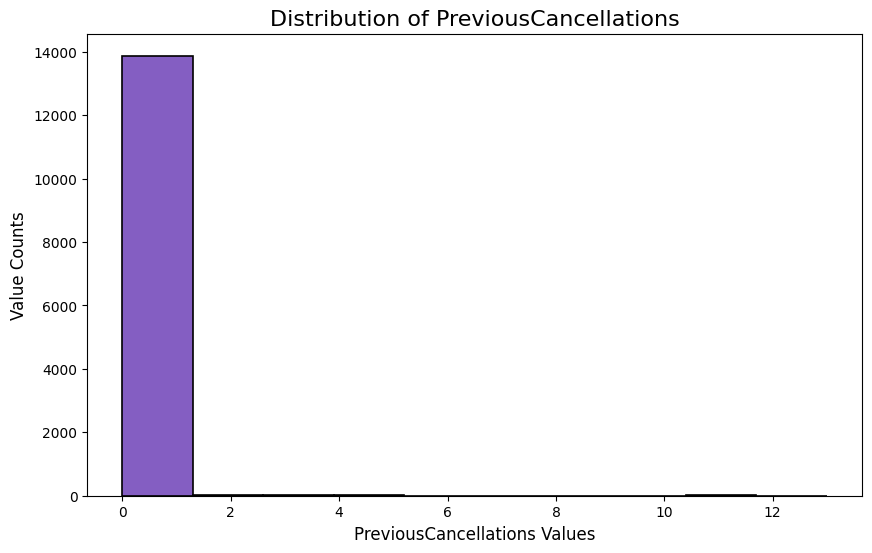

In [ ]:
# Plotting the distribution of PreviousCancellations
auto_hist(data['PreviousCancellations'],
          f'Distribution of PreviousCancellations',
          'PreviousCancellations Values',
          'Value Counts')

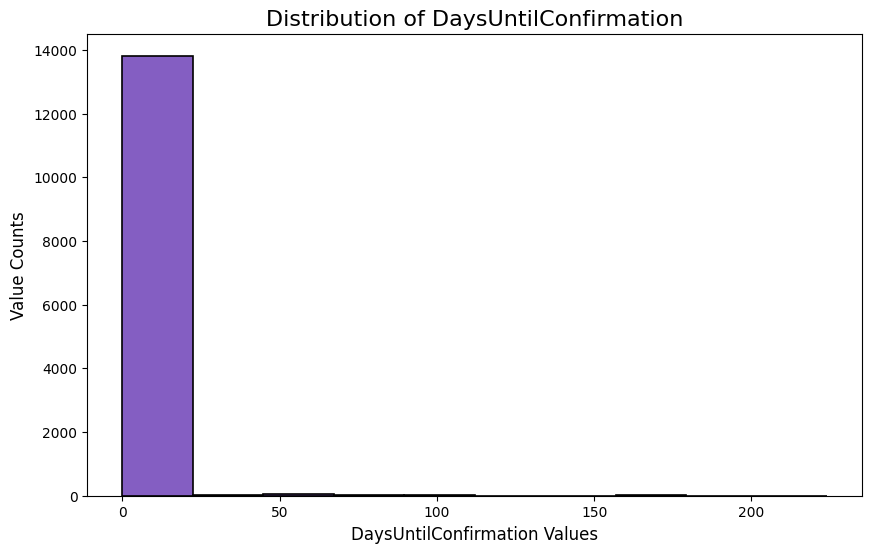

In [ ]:
# Plotting the distribution of DaysUntilConfirmation
auto_hist(data['DaysUntilConfirmation'],
          f'Distribution of DaysUntilConfirmation',
          'DaysUntilConfirmation Values',
          'Value Counts')

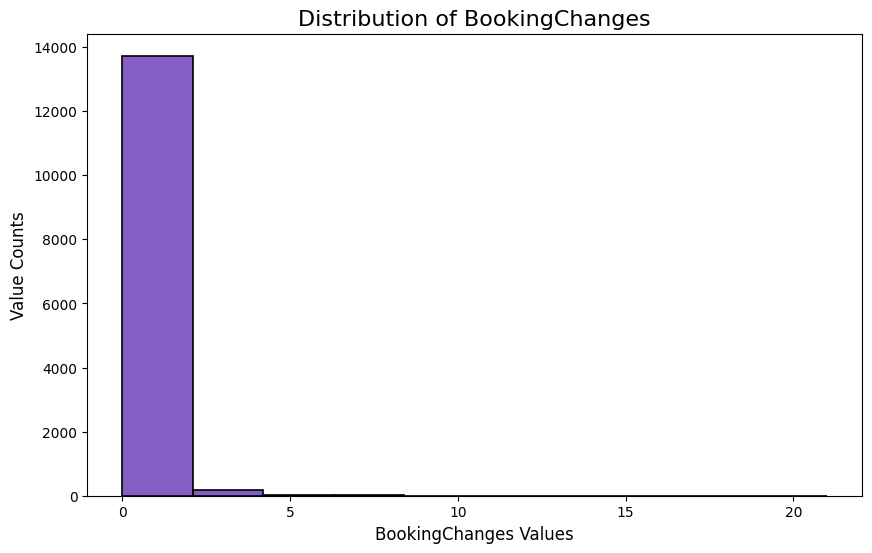

In [ ]:
# Plotting the distribution of BookingChanges
auto_hist(data['BookingChanges'],
          f'Distribution of BookingChanges',
          'BookingChanges Values',
          'Value Counts')

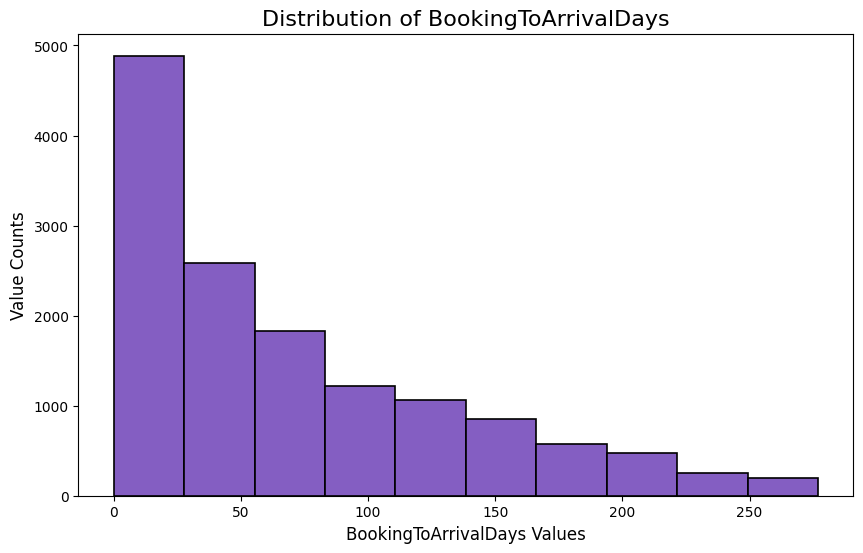

In [ ]:
# Plotting the distribution of BookingToArrivalDays
auto_hist(data['BookingToArrivalDays'],
          f'Distribution of BookingToArrivalDays',
          'BookingToArrivalDays Values',
          'Value Counts')

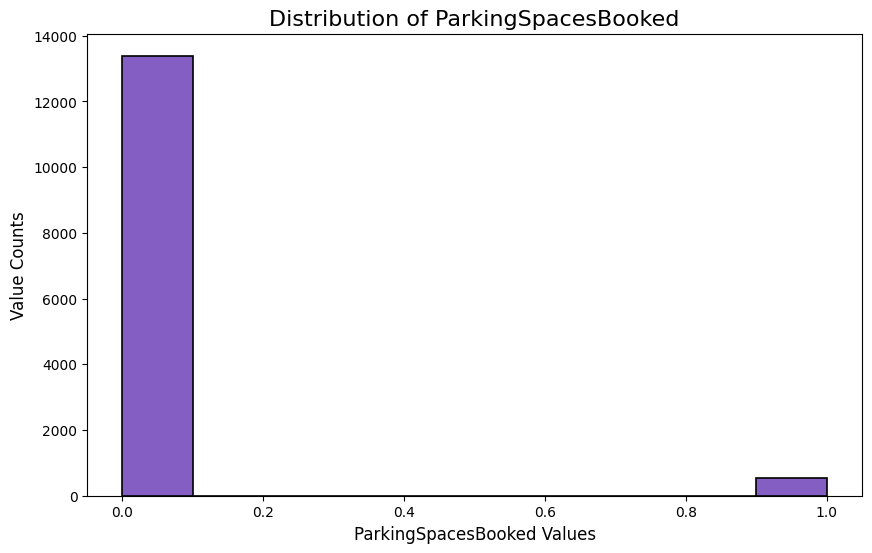

In [ ]:
#Plotting the distribution of ParkingSpacesBooked
auto_hist(data['ParkingSpacesBooked'],
          f'Distribution of ParkingSpacesBooked',
          'ParkingSpacesBooked Values',
          'Value Counts')

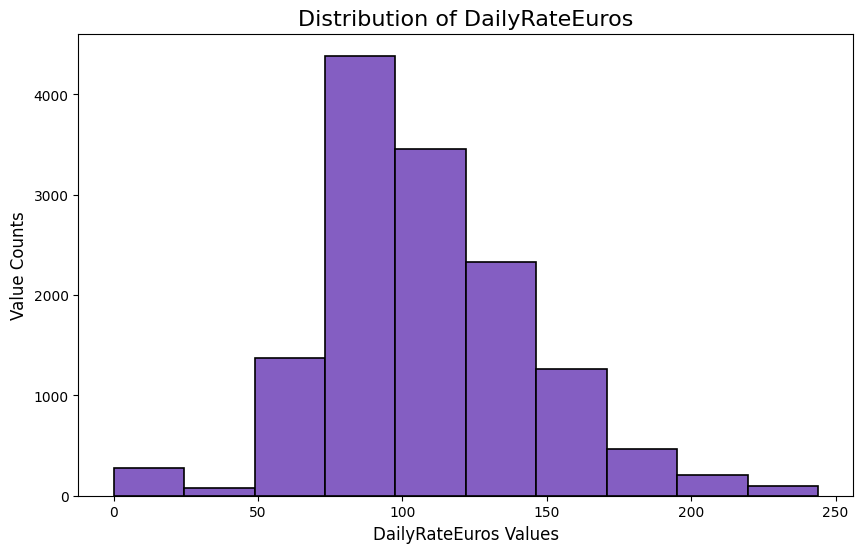

In [ ]:
# Plotting the distribution of DailyRateEuros
auto_hist(data['DailyRateEuros'],
          f'Distribution of DailyRateEuros',
          'DailyRateEuros Values',
          'Value Counts')

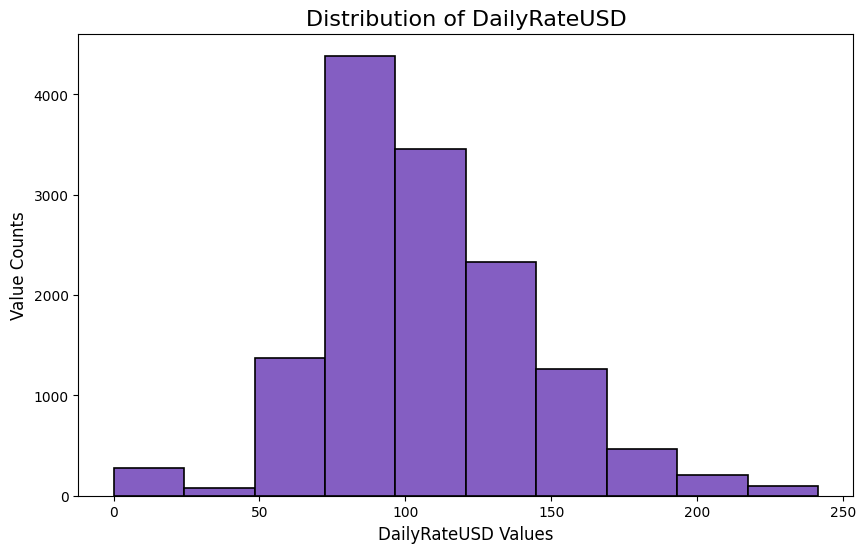

In [ ]:
# Plotting the distribution of DailyRateUSD
auto_hist(data['DailyRateUSD'],
          f'Distribution of DailyRateUSD',
          'DailyRateUSD Values',
          'Value Counts')

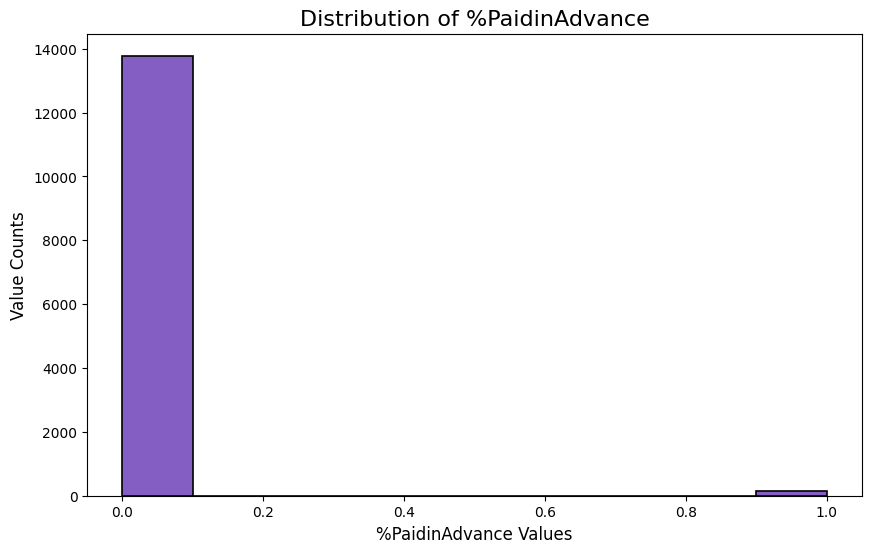

In [ ]:
# Plotting the distribution of %PaidinAdvance
auto_hist(data['%PaidinAdvance'],
          f'Distribution of %PaidinAdvance',
          '%PaidinAdvance Values',
          'Value Counts')

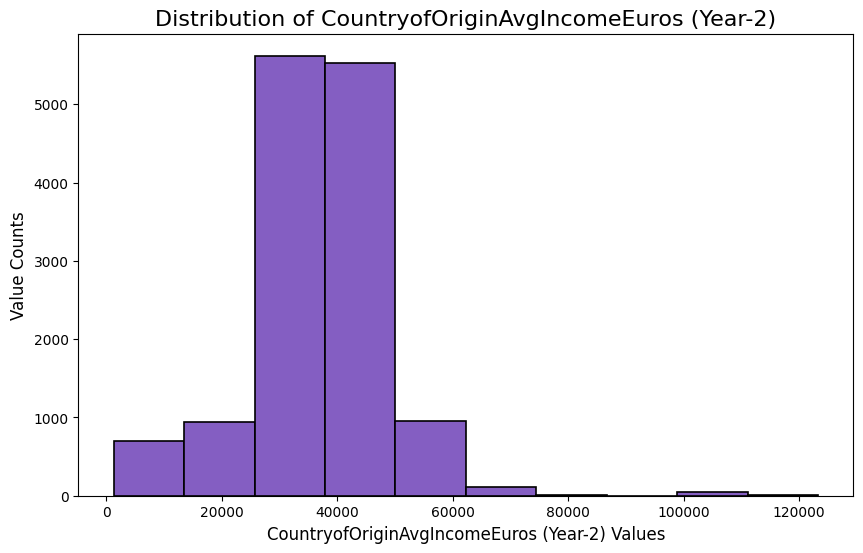

In [ ]:
# Plotting the distribution of CountryofOriginAvgIncomeEuros (Year-2)
auto_hist(data['CountryofOriginAvgIncomeEuros (Year-2)'],
          f'Distribution of CountryofOriginAvgIncomeEuros (Year-2)',
          'CountryofOriginAvgIncomeEuros (Year-2) Values',
          'Value Counts')

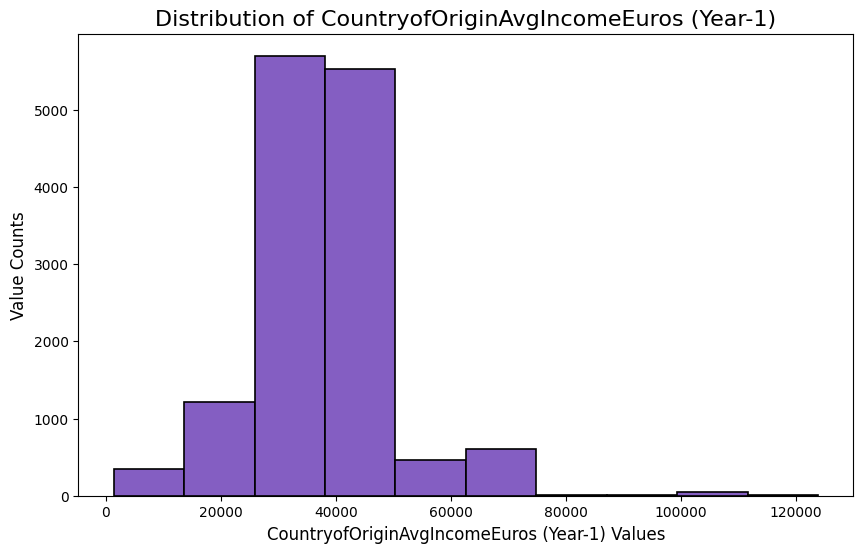

In [ ]:
# Plotting CountryofOriginAvgIncomeEuros (Year-1) distribution
auto_hist(data['CountryofOriginAvgIncomeEuros (Year-1)'],
          f'Distribution of CountryofOriginAvgIncomeEuros (Year-1)',
          'CountryofOriginAvgIncomeEuros (Year-1) Values',
          'Value Counts')

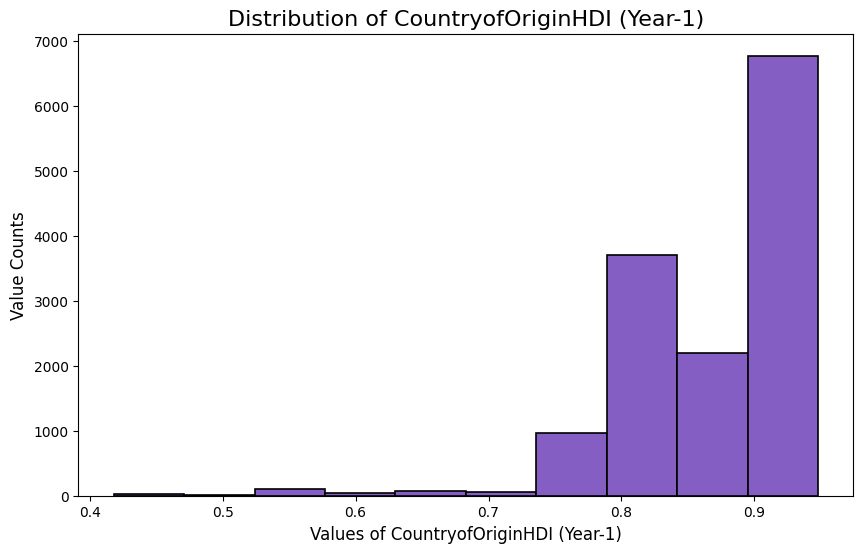

In [ ]:
# Plotting CountryofOriginHDI (Year-1) distribution
auto_hist(data['CountryofOriginHDI (Year-1)'],
          f'Distribution of CountryofOriginHDI (Year-1)',
          'Values of CountryofOriginHDI (Year-1)',
          'Value Counts')

## Correlation Matrix Heatmap
In this section we will be verifying how the variables within our dataset relate to one another. This will be useful, in order to see which features we can combine to create new ones (cases where both features are highly correlated, meaning they are likely to be redundant, so by combining them we could drop one) and also because we will be able to identify which can possibly be discarded or disregarded in case any inconsistencies exist within their observations.


Text(0.5, 1.0, 'Feature Correlation within the dataset')

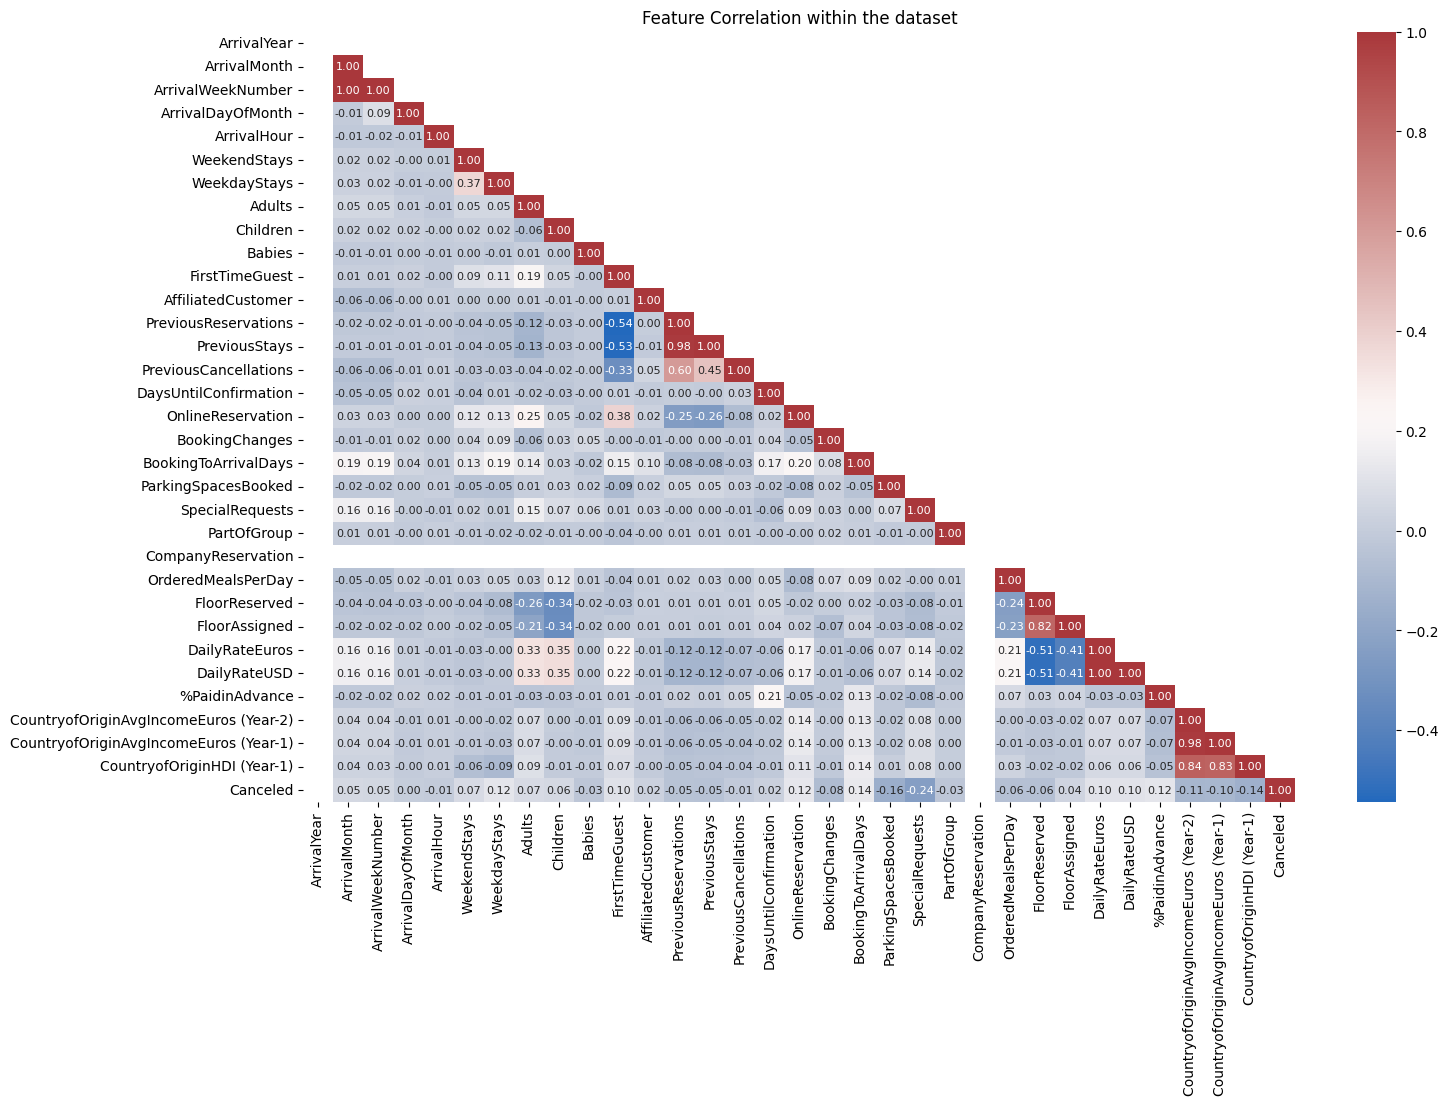

In [ ]:
# Plotting the Correlation Matrix

# Create a mask to cover half of the correlation matrix
mask = np.triu(np.ones_like(data.corr(), dtype=bool), k=1)

plt.figure(figsize=(16, 10))

sns.heatmap(data.corr(),
            annot = True,
            cmap='vlag',
            fmt=".2f",
            annot_kws={"size": 8},
            mask = mask)

# Setting the title of the plot
plt.title('Feature Correlation within the dataset')


 By analyzing the correlation matrix above, we can clearly note that there are not a lot of extremely correlated features within our dataset (because we cannot see very intense colors). However, we still have some features which present a high-level correlation, like:
- DailyRateEUR x DailyRateUSD (As one could expect) - | ρ = 1.00 |
- ArrivalWeekNumber x ArrivalMonth - | ρ = 1.00 |
- CountryofOriginAvgIncomeEuros (Year-1) x CountryofOriginAvgIncomeEuros (Year-2) (Also expectable) - | ρ = 0.98 |
- PreviousStays x PreviousReservations - | ρ = 0.98 |
- CountryofOriginHDI x CountryofOriginAvgIncomeEuros (Year-2) - | ρ = 0.84 |
- CountryofOriginHDI x CountryofOriginAvgIncomeEuros (Year-1) - | ρ = 0.83 |
- FloorReserved x FloorAssigned - | ρ = 0.83 |
-----------------------------
Other "fairly high correlations" (in this case we are considering relationships with ρ > |0.50|) that could also be useful include:
- PreviousCancellations x PreviousReservations - | ρ = 0.60 |
- PreviousReservations x FirstTimeGuest - | ρ = - 0.54 |
- PreviousStays x FirstTimeGuest - | ρ = - 0.53 |
- FloorReserved x DailyRateEuros - | ρ = - 0.51 |
- FloorReserved x DailyRateUSD - | ρ = -0.51 |
- PreviousCancellations x PreviousStays - | ρ = 0.45 |

For the time being we will keep these correlation coefficients in mind as we check the data for any inconsistencies, and we will come back to them once we reach the feature engineering stage of the project (where the goal will be to create some new variables based on the already existing ones, and to drop some variables that can be/are redundant in comparison to other variables from the dataset.


## Verifying inconsistencies

### People who are first time guests but have had reservations in the past and vice-versa

In this section we will be giving a look to see if any of our clients has inconsistent values within these two variables.

In [ ]:
# First Time Guests with Previous Reservations
non_first_timers = data[((data['FirstTimeGuest'] == 1) & (data['PreviousReservations'] != 0)) | ((data['FirstTimeGuest'] == 0) & (data['PreviousReservations'] == 0))]
non_first_timers

,ArrivalYear,ArrivalMonth,ArrivalWeekNumber,ArrivalDayOfMonth,ArrivalHour,WeekendStays,WeekdayStays,Adults,Children,Babies,...,OrderedMealsPerDay,FloorReserved,FloorAssigned,DailyRateEuros,DailyRateUSD,%PaidinAdvance,CountryofOriginAvgIncomeEuros (Year-2),CountryofOriginAvgIncomeEuros (Year-1),CountryofOriginHDI (Year-1),Canceled
BookingID,,,,,,,,,,,,,,,,,,,,,
23621,2016,12,52,20,22.25,0,0,0,0.0,0,...,1,6,3,0.0,0.00,0.0,28742.44,29668.86,0.842,0
37585,2016,1,1,2,17.50,2,1,2,0.0,0,...,2,6,6,109.0,107.91,0.0,36194.87,36909.33,0.876,0
37712,2016,1,5,27,23.00,0,2,1,0.0,0,...,1,6,6,70.0,69.30,1.0,28742.44,29668.86,0.842,1
15254,2016,7,30,17,23.50,0,0,2,0.0,0,...,1,6,6,0.0,0.00,0.0,28742.44,29668.86,0.842,0
15286,2016,5,22,23,22.25,1,1,1,0.0,0,...,1,2,2,106.0,104.94,1.0,28742.44,29668.86,0.842,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35798,2016,6,23,3,22.25,0,1,2,0.0,0,...,1,6,6,127.0,125.73,0.0,28742.44,29668.86,0.842,1
27739,2016,5,20,9,20.25,1,2,1,0.0,0,...,1,2,2,106.0,104.94,1.0,28742.44,29668.86,0.842,0
19070,2016,1,2,9,18.75,0,0,2,0.0,0,...,1,6,6,0.0,0.00,0.0,28742.44,29668.86,0.842,0


Apparently we have 160 rows that consist of bookings where we've had clients that were not actual first time clients. We will need to take care of this. <br>

Because it is more practical to consider that the clients that have PreviousReservations are not FirstTimeGuests (because if we were to correct the values based on the FirstTimeGuests one, we could end up in a situation where we had to guess how many PreviousReservations a given client had), we will mantain the original values from the PreviousReservations Columns and correcting the value in the FirstTimeGuest column.

In [ ]:
# Count of non-zero 'FirstTimeGuest' values before modification
before_count = non_first_timers['FirstTimeGuest'].sum()

# Set 'FirstTimeGuest' to 0 for inconsistent rows in the 'non_first_timers' subset
non_first_timers.loc[non_first_timers['PreviousReservations'] != 0, 'FirstTimeGuest'] = 0

# Count of non-zero 'FirstTimeGuest' values after modification
after_count = non_first_timers['FirstTimeGuest'].sum()

# Calculate the number of rows altered
rows_altered = before_count - after_count

print("Number of rows altered:", rows_altered)

Number of rows altered: 111


In [ ]:
# Count of non-zero 'FirstTimeGuest' values before modification
before_count = non_first_timers['FirstTimeGuest'].sum()

# Set 'FirstTimeGuest' to 1 for inconsistent rows in the 'non_first_timers' subset
non_first_timers.loc[non_first_timers['PreviousReservations'] == 0, 'FirstTimeGuest'] = 1

# Count of non-zero 'FirstTimeGuest' values after modification
after_count = non_first_timers['FirstTimeGuest'].sum()

# Calculate the number of rows altered
rows_altered = after_count - before_count

print("Number of rows altered:", rows_altered)

Number of rows altered: 49


In [ ]:
# Update the 'FirstTimeGuest' column in the original DataFrame 'data'
data.update(non_first_timers)

### Reservations that may contain Children or Babies without containing Adults

In [ ]:
# Children and Babies without Adults
lonely_kids = data[((data['Children'] != 0) & (data['Babies'] != 0) & (data['Adults'] == 0))]
lonely_kids

,ArrivalYear,ArrivalMonth,ArrivalWeekNumber,ArrivalDayOfMonth,ArrivalHour,WeekendStays,WeekdayStays,Adults,Children,Babies,...,OrderedMealsPerDay,FloorReserved,FloorAssigned,DailyRateEuros,DailyRateUSD,%PaidinAdvance,CountryofOriginAvgIncomeEuros (Year-2),CountryofOriginAvgIncomeEuros (Year-1),CountryofOriginHDI (Year-1),Canceled
BookingID,,,,,,,,,,,,,,,,,,,,,


In [ ]:
# Babies without Adults or Children
lonely_babies = data[((data['Children'] == 0) & (data['Babies'] != 0) & (data['Adults'] == 0))]
lonely_babies

,ArrivalYear,ArrivalMonth,ArrivalWeekNumber,ArrivalDayOfMonth,ArrivalHour,WeekendStays,WeekdayStays,Adults,Children,Babies,...,OrderedMealsPerDay,FloorReserved,FloorAssigned,DailyRateEuros,DailyRateUSD,%PaidinAdvance,CountryofOriginAvgIncomeEuros (Year-2),CountryofOriginAvgIncomeEuros (Year-1),CountryofOriginHDI (Year-1),Canceled
BookingID,,,,,,,,,,,,,,,,,,,,,


In [ ]:
# Children without Adults or Babies
lonely_children = data[((data['Children'] != 0) & (data['Babies'] == 0) & (data['Adults'] == 0))]
lonely_children

,ArrivalYear,ArrivalMonth,ArrivalWeekNumber,ArrivalDayOfMonth,ArrivalHour,WeekendStays,WeekdayStays,Adults,Children,Babies,...,OrderedMealsPerDay,FloorReserved,FloorAssigned,DailyRateEuros,DailyRateUSD,%PaidinAdvance,CountryofOriginAvgIncomeEuros (Year-2),CountryofOriginAvgIncomeEuros (Year-1),CountryofOriginHDI (Year-1),Canceled
BookingID,,,,,,,,,,,,,,,,,,,,,
21074,2016,12,50,7,14.00,0,3,0,2.0,0,...,1,5,6,82.44,81.6156,0.0,36194.87,36909.33,0.876,0
22825,2016,9,37,4,21.50,2,5,0,2.0,0,...,1,5,5,106.90,105.8310,0.0,47011.55,47683.79,0.933,1
32781,2016,3,14,30,21.50,0,3,0,2.0,0,...,1,5,5,89.92,89.0208,0.0,28742.44,29668.86,0.842,1
33209,2016,6,24,9,23.50,0,3,0,2.0,0,...,1,5,5,116.49,115.3251,0.0,36194.87,36909.33,0.876,0
23876,2016,7,31,28,22.00,2,4,0,3.0,0,...,1,5,5,79.27,78.4773,0.0,40141.59,40833.24,0.898,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34101,2016,7,31,29,22.00,0,2,0,2.0,0,...,1,5,5,6.00,5.9400,0.0,44929.69,46213.27,0.913,0
37007,2016,4,18,30,15.00,2,3,0,2.0,0,...,1,5,5,127.83,126.5517,0.0,49233.22,50302.07,0.926,0
31929,2016,8,34,15,14.75,1,2,0,2.0,0,...,1,5,5,106.32,105.2568,0.0,40141.59,40833.24,0.898,0


As we can see there are 88 observations in which we do not have Babies or Adults but in which we do have children. In normal circumstances, an individual that is not 18 years-old or older cannot make a booking for a room so considering a situation in which these values were not imputed by mistake, these bookings cannot be considered valid. <br>
Since these observations account for only a very small portion of the dataset (88/13938) we can discard them from the dataset, as they will not have a huge impact in the final results of our predictive model.

In [ ]:
# Dropping lonely_children
lonely_children_indices = lonely_children.index

# Drop the subset from the original dataset
data.drop(lonely_children_indices, inplace=True)

### Reservations that do not contain Adults, Children or Babies (Empty Reservations)

In [ ]:
# Children without Adults or Babies
empty_res = data[((data['Children'] == 0) & (data['Babies'] == 0) & (data['Adults'] == 0))]
empty_res

,ArrivalYear,ArrivalMonth,ArrivalWeekNumber,ArrivalDayOfMonth,ArrivalHour,WeekendStays,WeekdayStays,Adults,Children,Babies,...,OrderedMealsPerDay,FloorReserved,FloorAssigned,DailyRateEuros,DailyRateUSD,%PaidinAdvance,CountryofOriginAvgIncomeEuros (Year-2),CountryofOriginAvgIncomeEuros (Year-1),CountryofOriginHDI (Year-1),Canceled
BookingID,,,,,,,,,,,,,,,,,,,,,
23621,2016,12,52,20,22.25,0,0,0,0.0,0,...,1,6,3,0.00,0.0000,0.0,28742.44,29668.86,0.842,0
36441,2016,2,9,21,19.75,2,4,0,0.0,0,...,0,5,-1,56.27,55.7073,0.0,61902.13,63938.99,0.942,0
23052,2016,6,26,21,19.25,0,0,0,0.0,0,...,1,3,4,0.00,0.0000,0.0,28742.44,29668.86,0.842,0
36525,2016,8,32,5,14.00,2,2,0,0.0,0,...,0,6,-1,69.50,68.8050,0.0,25751.51,24061.10,0.813,0
23498,2016,9,39,20,20.75,0,4,0,0.0,0,...,0,6,-1,0.00,0.0000,0.0,28742.44,29668.86,0.842,0
20524,2016,11,48,23,23.75,0,0,0,0.0,0,...,1,6,6,0.00,0.0000,0.0,28742.44,29668.86,0.842,0
15069,2016,5,19,5,15.75,2,4,0,0.0,0,...,0,2,-1,50.87,50.3613,0.0,61902.13,63938.99,0.942,0
34452,2016,5,19,1,22.25,2,1,0,0.0,0,...,0,6,-1,0.00,0.0000,0.0,28742.44,29668.86,0.842,0
22373,2016,11,47,18,15.50,1,2,0,0.0,0,...,0,6,-1,92.67,91.7433,0.0,40141.59,40833.24,0.898,0


In this case, we have 40 reservations which allegedly contain no subjects whatsoever. Since it is usually not valid to have reservations made for no people at all, these observations appear to be inconsistent. Due to being such a small portion of the overall dataset (44/13938) we will drop these observations from the dataset.

In [ ]:
# Dropping empty_res
empty_res_indices = empty_res.index

# Drop the subset from the original dataset
data.drop(empty_res_indices, inplace=True)

### People who don't stay in Weekdays nor on the Weekends (WeekdayStays & WeekendStays == 0)

In [ ]:
# Verifying people who do not have days
no_days = data[(data['WeekendStays'] == 0) & (data['WeekdayStays'] == 0)]
no_days

,ArrivalYear,ArrivalMonth,ArrivalWeekNumber,ArrivalDayOfMonth,ArrivalHour,WeekendStays,WeekdayStays,Adults,Children,Babies,...,OrderedMealsPerDay,FloorReserved,FloorAssigned,DailyRateEuros,DailyRateUSD,%PaidinAdvance,CountryofOriginAvgIncomeEuros (Year-2),CountryofOriginAvgIncomeEuros (Year-1),CountryofOriginHDI (Year-1),Canceled
BookingID,,,,,,,,,,,,,,,,,,,,,
30744,2016,4,17,21,23.75,0,0,2,0.0,0,...,1,5,6,0.0,0.0,0.0,28742.44,29668.86,0.842,0
22210,2016,1,4,22,18.25,0,0,1,0.0,0,...,1,6,6,0.0,0.0,0.0,28742.44,29668.86,0.842,0
15254,2016,7,30,17,23.50,0,0,2,0.0,0,...,1,6,6,0.0,0.0,0.0,28742.44,29668.86,0.842,0
13369,2016,2,9,26,20.00,0,0,1,0.0,0,...,0,6,6,0.0,0.0,0.0,36194.87,36909.33,0.876,1
35912,2016,10,44,28,23.00,0,0,2,0.0,0,...,0,6,6,0.0,0.0,0.0,28742.44,29668.86,0.842,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22761,2016,10,42,14,23.75,0,0,1,0.0,0,...,1,6,-1,0.0,0.0,0.0,28742.44,29668.86,0.842,0
36730,2016,3,13,23,18.25,0,0,2,0.0,0,...,1,6,5,0.0,0.0,0.0,20008.32,20551.83,0.822,1
24432,2016,8,34,20,21.75,0,0,2,0.0,0,...,1,6,6,0.0,0.0,0.0,28742.44,29668.86,0.842,0


In [ ]:
# Dropping the no_days subset from the overall dataset
no_days_indices = no_days.index

data.drop(no_days_indices, inplace=True)

## Updated Correlation Matrix
After correcting those few inconsistencies from the dataset, we will be giving another look at a new version of the correlation matrix to see if any correlation coefficients chnaged dramatically.

Text(0.5, 1.0, 'Feature Correlation within the dataset')

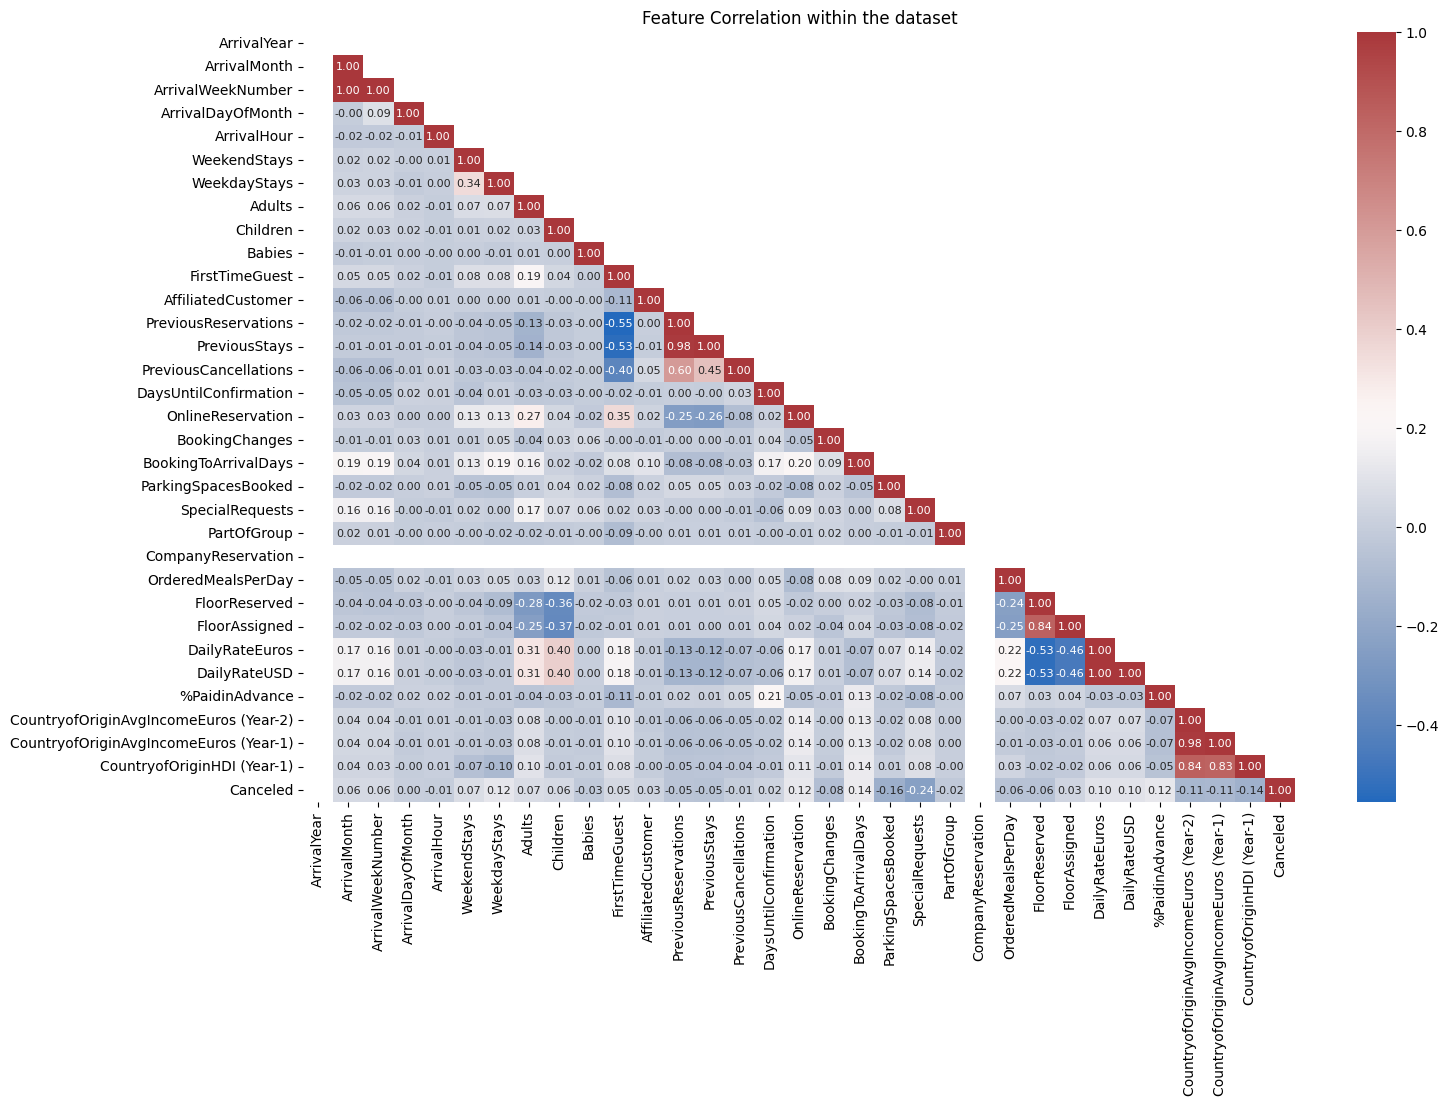

In [ ]:
# Plotting the Correlation Matrix

# Create a mask to cover half of the correlation matrix
mask = np.triu(np.ones_like(data.corr(), dtype=bool), k=1)

plt.figure(figsize=(16, 10))

sns.heatmap(data.corr(),
            annot = True,
            cmap='vlag',
            fmt=".2f",
            annot_kws={"size": 8},
            mask = mask)

# Setting the title of the plot
plt.title('Feature Correlation within the dataset')

After correcting those inconsistencies, some of the coefficients did indeed change, however none were altered drastically. So, the final worth noting relationships among variables are:

- DailyRateEUR x DailyRateUSD (As one could expect) - | ρ = 1.00 |
- ArrivalWeekNumber x ArrivalMonth - | ρ = 1.00 |
- CountryofOriginAvgIncomeEuros (Year-1) x CountryofOriginAvgIncomeEuros (Year-2) (Also expectable) - | ρ = 0.98 |
- PreviousStays x PreviousReservations - | ρ = 0.98 |
- CountryofOriginHDI x CountryofOriginAvgIncomeEuros (Year-2) - | ρ = 0.84 |
- CountryofOriginHDI x CountryofOriginAvgIncomeEuros (Year-1) - | ρ = 0.83 |
- FloorReserved x FloorAssigned - | ρ = 0.83 |
-----------------------------
Other "fairly high correlations" (in this case we are considering relationships with ρ > |0.50|) that could also be useful include:
- PreviousCancellations x PreviousReservations - | ρ = 0.60 |
- PreviousReservations x FirstTimeGuest - | ρ = - 0.55 |
- PreviousStays x FirstTimeGuest - | ρ = - 0.53 |
- FloorReserved x DailyRateEuros - | ρ = - 0.53 |
- FloorReserved x DailyRateUSD - | ρ = - 0.53 |
- FloorAssigned x DailyRateEuros - | ρ = - 0.46 |
- FloorAssigned x DailyRateUSD - | ρ = - 0.46 |
- PreviousCancellations x PreviousStays - | ρ = 0.45 |

## Creating a basic model using the original DataFrame

Now, before we move any further, after having cleaned the inconsistent rows from the dataframe we will be creating a basic LogisticRegression to see how the simplest model performs in our original dataset (just to have these values as a sort of benchmark)

To do this, we will be using the same methodology that will be used later on in the actual Modelling section of this Notebook and that will be explained more in depth in that section. (The Train-Test Split methodology)

In [ ]:
# Defining X and Y
original_y = data.Canceled
original_x = data.drop(['Canceled'], axis = 1)

In [ ]:
# Splitting the data into traind and validation subsets
x_train_original, x_val_original, y_train_original, y_val_original = train_test_split(original_x, original_y, train_size=0.75, stratify=original_y, random_state=0)

In [ ]:
# Creating the model and fitting it
original_model_lr = LogisticRegression()
original_model_lr.fit(x_train_original, y_train_original)
original_preds = np.round(original_model_lr.predict(x_val_original), 0)

# Printing the classification report (resulting accuracy)
print(classification_report(original_preds, y_val_original))

              precision    recall  f1-score   support

           0       0.89      0.65      0.75      2913
           1       0.22      0.54      0.31       525

    accuracy                           0.63      3438
   macro avg       0.55      0.59      0.53      3438
weighted avg       0.78      0.63      0.68      3438



As we can see, by using the original dataset, without adding any new variables, without doing any type of feature selection and without scaling the data, the simplest model which we can fit to our data (a Logistic Regression) gives a weighted F1-Score of 0.69. This value can be considered as a kind of benchmark that we should try and improve from in our future models (because we know that without doing anything to the data, we can predict the outcomes with 69% of accuracy approximately).

# Feature Engineering

## Feature Creation


### Feature Creation based on the correlation coefficient results

#### Creating RequestedRoom feature (combining info. from FloorReserved and FloorAssigned) - note to self convert to (Bool)

In [ ]:
# Iterating through every row, we will verify if the requested floor matches
# the assigned floor
# 0 meaning wrong floor
# 1 meaning correct floor
for index, row in data.iterrows():
    if row['FloorReserved'] == row['FloorAssigned']:
        data.loc[index, 'RequestedFloor'] = 1
    else:
        data.loc[index, 'RequestedFloor'] = 0

#### Creating the Variance of CountryofOriginAvgIncomeEuros(Year-1) & CountryofOriginAvgIncomeEuros(Year-2) == **CountryofOriginAvgIncomeEurosGrowth**

In [ ]:
# Calculating the variation of CountryofOriginAvgIncomeEuros
# from the 1st year to the 2nd
data['CountryofOriginAvgIncomeEurosDelta'] = data['CountryofOriginAvgIncomeEuros (Year-2)'] - data['CountryofOriginAvgIncomeEuros (Year-1)']

### Creating features based on logical associations (for simplicity purposes or even to add more descriptive power to the model)

#### Joining together Adults with Babies and Children (TotalGuests)
Used TotalGuests instead of FamilySize because people may make a reservation together and not belong to the same family (despite reserving within a cohort)


In [ ]:
data['TotalGuests'] = data['Adults'] + data['Babies'] + data['Children']

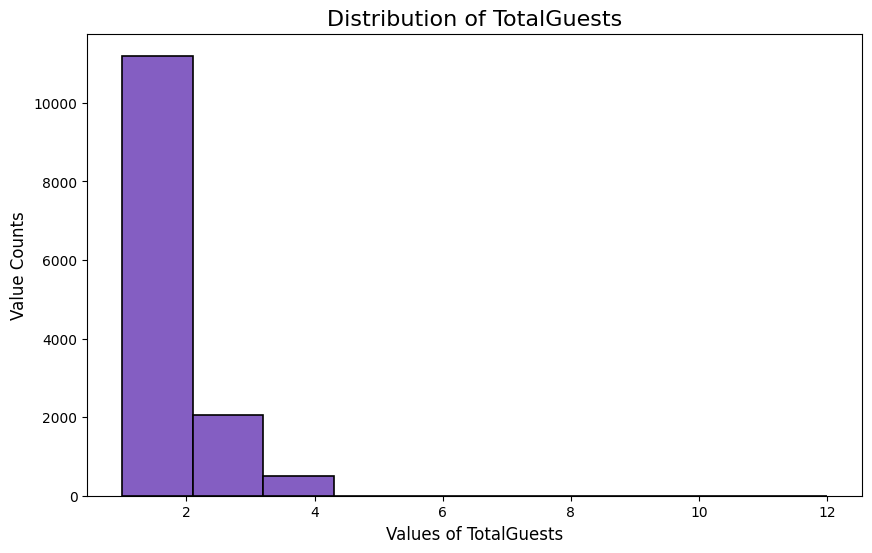

In [ ]:
# Plotting CountryofOriginHDI (Year-1) distribution
auto_hist(data['TotalGuests'],
          f'Distribution of TotalGuests',
          'Values of TotalGuests',
          'Value Counts')

#### Joining together Babies with Children (Minors)

In [ ]:
data['Minors'] = data['Babies'] + data['Children']

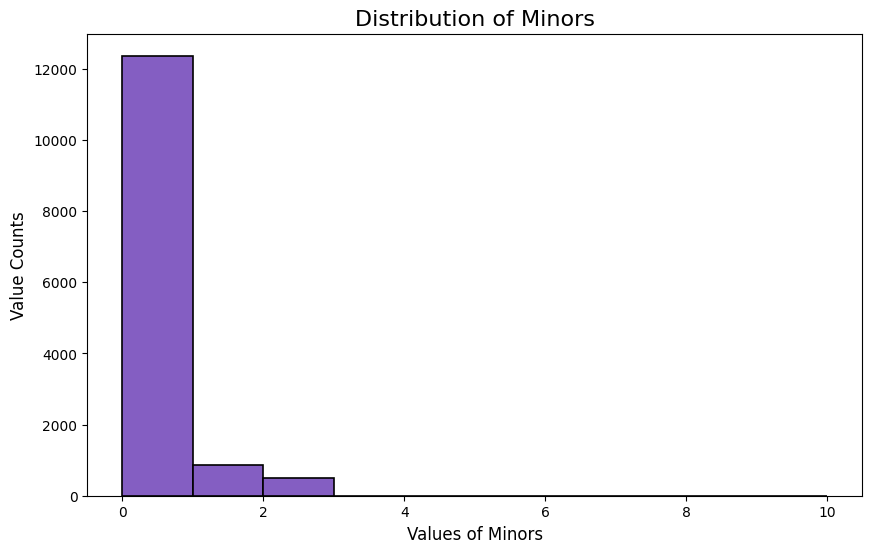

In [ ]:
# Plotting CountryofOriginHDI (Year-1) distribution
auto_hist(data['Minors'],
          f'Distribution of Minors',
          'Values of Minors',
          'Value Counts')

#### Grouping together total length of stays (TotalDays)

In [ ]:
data['TotalDays'] = data['WeekdayStays'] + data['WeekendStays']

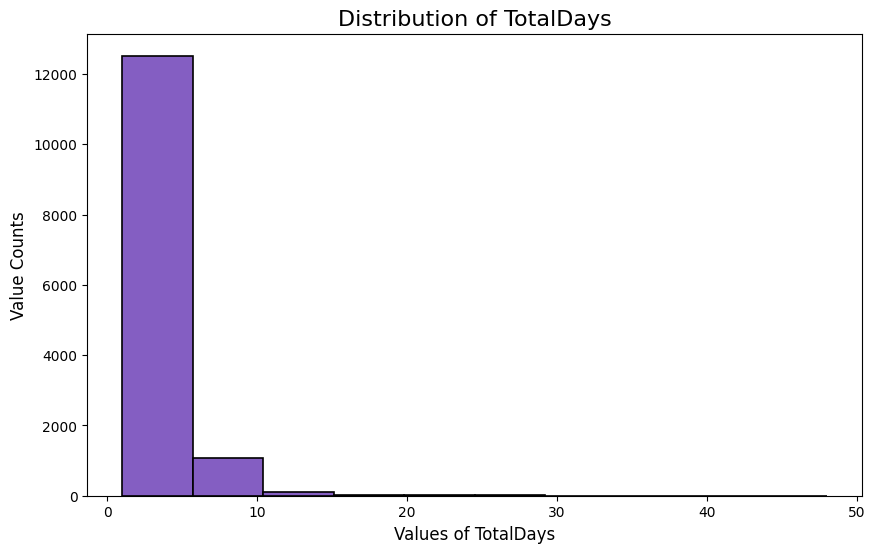

In [ ]:
# Plotting CountryofOriginHDI (Year-1) distribution
auto_hist(data['TotalDays'],
          f'Distribution of TotalDays',
          'Values of TotalDays',
          'Value Counts')


#### Amounts Paid for the stays (both in EUR and in USD)

In [ ]:
# Making the calculation for Cost of Stays in Euros
data['TotalStayCostEuros'] = data['DailyRateEuros'] * data['TotalDays']

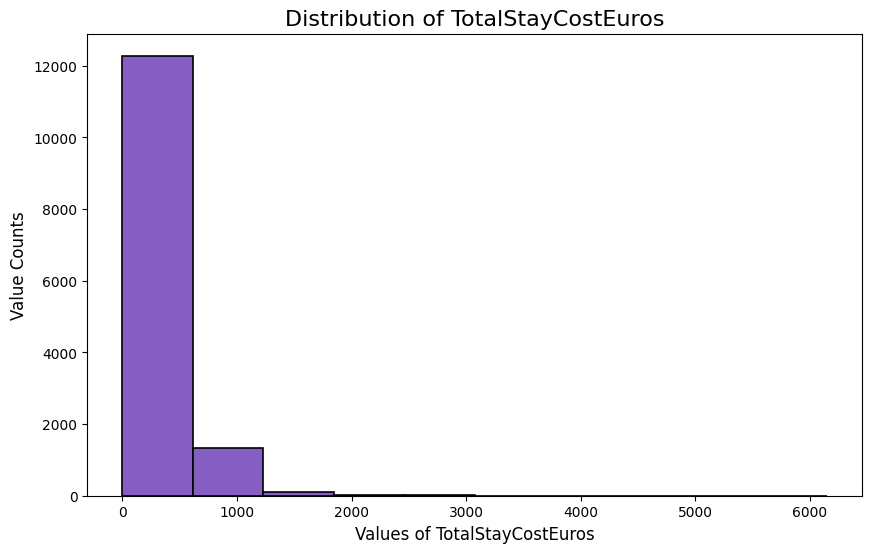

In [ ]:
# Plotting CountryofOriginHDI (Year-1) distribution
auto_hist(data['TotalStayCostEuros'],
          f'Distribution of TotalStayCostEuros',
          'Values of TotalStayCostEuros',
          'Value Counts')

In [ ]:
# Making the calculation for Cost of Stays in Euros
data['TotalStayCostUSD'] = data['DailyRateUSD'] * data['TotalDays']

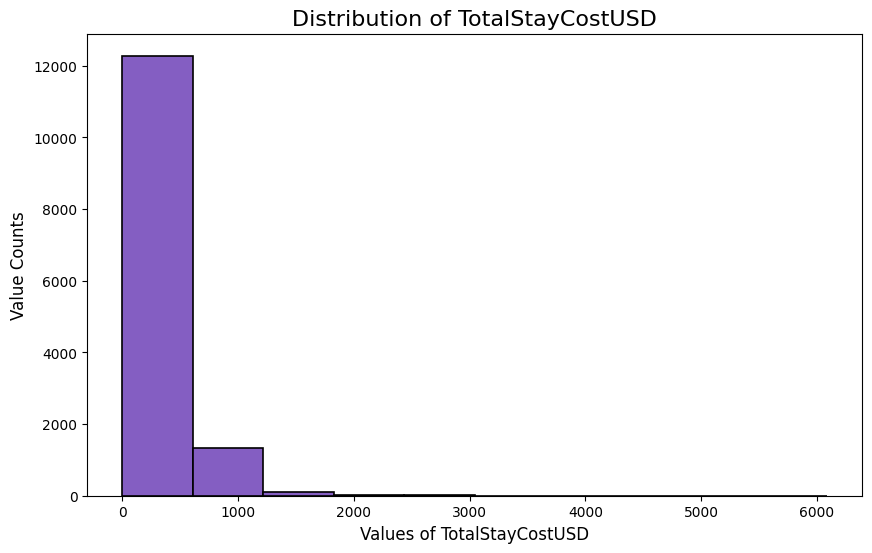

In [ ]:
# Plotting CountryofOriginHDI (Year-1) distribution
auto_hist(data['TotalStayCostUSD'],
          f'Distribution of TotalStayCostUSD',
          'Values of TotalStayCostUSD',
          'Value Counts')

#### Creating an ArrivalDate feature (joining Arrivalyear, ArrivalMonth, ArrivalDayOfMonth)

In [ ]:
# Creating an ArrivalDate feature (joining Arrivalyear, ArrivalMonth, ArrivalDayOfMonth)
reservation_date_int = data['ArrivalYear'].astype(str) + data['ArrivalMonth'].astype(str).str.zfill(2) + data['ArrivalDayOfMonth'].astype(str).str.zfill(2)
data['ArrivalDate'] = pd.to_datetime((reservation_date_int), format = '%Y%m%d')

#### Creating a **BookingDate** (using BookingToArrivalDays and subtracting from ArrivalDate) and **ConfirmationDate** (using BookingDate and adding from DaysUntilConfirmation)

In [ ]:
# Creating a **BookingDate** (using BookingToArrivalDays and subtracting from ArrivalDate) and **ConfirmationDate** (using BookingDate and adding from DaysUntilConfirmation)
for i in data.index:
  data.loc[i, 'BookingDate'] = data.loc[i, 'ArrivalDate'] - timedelta(days = int(data.loc[i, 'BookingToArrivalDays']))
  data.loc[i, 'ConfirmationDate'] = data.loc[i, 'BookingDate'] + timedelta(days = int(data.loc[i, 'DaysUntilConfirmation']))

#### Creating the split features for Booking and Confirmation Dates (as we have for Arrival)

In [ ]:
# Creating the split features for Booking and Confirmation Dates (as we have for Arrival)
# Booking Dates values
data['BookingDayOfMonth'] = data['BookingDate'].map(lambda x: x.day)
data['BookingMonth'] = data['BookingDate'].map(lambda x: x.month)
data['BookingYear'] = data['BookingDate'].map(lambda x: x.year)

In [ ]:
# Confirmation Date Values
data['ConfirmationDayOfMonth'] = data['ConfirmationDate'].map(lambda x: x.day)
data['ConfirmationMonth'] = data['ConfirmationDate'].map(lambda x: x.month)
data['ConfirmationYear'] = data['ConfirmationDate'].map(lambda x: x.year)

## Feature Transformation

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13749 entries, 10423 to 24861
Data columns (total 49 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   ArrivalYear                             13749 non-null  int64         
 1   ArrivalMonth                            13749 non-null  int64         
 2   ArrivalWeekNumber                       13749 non-null  int64         
 3   ArrivalDayOfMonth                       13749 non-null  int64         
 4   ArrivalHour                             13749 non-null  float64       
 5   WeekendStays                            13749 non-null  int64         
 6   WeekdayStays                            13749 non-null  int64         
 7   Adults                                  13749 non-null  int64         
 8   Children                                13749 non-null  float64       
 9   Babies                                  13749 non-n

### Altering Datatypes of various features

In [ ]:
# Altering Datatypes of various features
# Converting some boolean features that are ints to actual boolean
data['FirstTimeGuest'] = data['FirstTimeGuest'].astype(bool)
data['AffiliatedCustomer'] = data['AffiliatedCustomer'].astype(bool)
data['OnlineReservation'] = data['OnlineReservation'].astype(bool)
data['CompanyReservation'] = data['CompanyReservation'].astype(bool)
data['PartOfGroup'] = data['PartOfGroup'].astype(bool)
data['RequestedFloor'] = data['RequestedFloor'].astype(bool)


### Altering *Date variables to a more "computer-friendly" format

In some softwares, dates are often converted into integer values by calculating the total days of difference between a given date and a specific point in time. In order to make these features more comprehensible for our model we will be using this same approach and converting ArrivalDate, BookingDate, ConfirmationDate into days passed since a specific timeframe.

The utilized specific timeframe (or Reference date will be that of the latest/more recent observation)

In [ ]:
# Altering *Date variables to a more "computer-friendly" format

# Creating a list with variables that contain dates
date_variables = ['ArrivalDate', 'BookingDate', 'ConfirmationDate']
most_recent_dates = []

for variable in date_variables:
  most_recent_date = data[variable].max()
  most_recent_dates.append(most_recent_date)
  print(f"The most recent value of {variable} in the dataset is:", most_recent_date)

print("\n \n \n \n")

print(f"The most recent date of the dataset is {max(most_recent_dates)}")

The most recent value of ArrivalDate in the dataset is: 2016-12-31 00:00:00
The most recent value of BookingDate in the dataset is: 2016-12-30 00:00:00
The most recent value of ConfirmationDate in the dataset is: 2016-12-30 00:00:00

 
 
 

The most recent date of the dataset is 2016-12-31 00:00:00


Looking at the output above, we can see that the most recent date in the dataset is indeed December 31st 2016. Therefore, as a starting point for the calculation of our dates we will be using the following date:

01-01-2017 (Or in YYYY-MM-DD format 2017-01-01)

In [ ]:
# Defining the start_date
start_date = pd.to_datetime("2017-01-01")
# Re-using the list above
date_variables = ['ArrivalDate', 'BookingDate', 'ConfirmationDate']

for variable in date_variables:
    # Calculating the difference between each date in the dataset and the start_date
    data[variable] = (np.datetime64(start_date) - pd.to_datetime(data[variable])).dt.days

'''
Note to self, run this cell only once per run
or else dates will go to shit
'''

'\nNote to self, run this cell only once per run\nor else dates will go to shit\n'

In [ ]:
data['ArrivalDate'].value_counts()

ArrivalDate
108    82
189    81
65     80
83     67
41     67
       ..
358    10
336     6
21      6
356     4
190     4
Name: count, Length: 366, dtype: int64

In [ ]:
data['BookingDate'].value_counts()

BookingDate
327    93
326    93
328    90
342    88
293    87
       ..
477     1
15      1
482     1
460     1
428     1
Name: count, Length: 468, dtype: int64

In [ ]:
data['ConfirmationDate'].value_counts()

ConfirmationDate
326    103
327     98
342     91
328     90
293     89
      ... 
482      1
465      1
432      1
15       1
428      1
Name: count, Length: 460, dtype: int64

In [ ]:
# All Dates have now been standardized to say the count of days since a
# given event occurred

In [ ]:
data

,ArrivalYear,ArrivalMonth,ArrivalWeekNumber,ArrivalDayOfMonth,ArrivalHour,WeekendStays,WeekdayStays,Adults,Children,Babies,...,TotalStayCostUSD,ArrivalDate,BookingDate,ConfirmationDate,BookingDayOfMonth,BookingMonth,BookingYear,ConfirmationDayOfMonth,ConfirmationMonth,ConfirmationYear
BookingID,,,,,,,,,,,,,,,,,,,,,
10423,2016,3,13,21,18.00,1,2,2,0.0,0,...,252.4500,286,331,331,5,2,2016,5,2,2016
14038,2016,4,17,23,16.00,2,4,2,2.0,0,...,1223.6400,253,255,255,21,4,2016,21,4,2016
37179,2016,12,53,28,16.00,0,1,2,0.0,0,...,136.6200,4,18,18,14,12,2016,14,12,2016
15019,2016,4,18,30,15.25,2,5,2,0.0,0,...,760.9833,246,344,344,23,1,2016,23,1,2016
30385,2016,5,21,17,15.50,0,2,2,0.0,0,...,277.2000,229,293,293,14,3,2016,14,3,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23233,2016,2,6,4,21.25,0,2,1,0.0,0,...,122.9580,332,408,408,20,11,2015,20,11,2015
32833,2016,7,28,8,16.75,0,1,2,2.0,0,...,166.6170,177,350,350,17,1,2016,17,1,2016
30966,2016,2,6,6,16.00,2,6,2,0.0,0,...,495.6336,330,339,339,28,1,2016,28,1,2016


### Dropping Univariate Features
In this section we will be dropping from the dataset some features which are no longer useful (or that should not be useful anymore) for the building and testing of our final models.
This includes:
- CompanyReservation (because it is univariate)
- ArrivalYear (because it is univariate)
- ...

In [ ]:
# Dropping Univariate Features
data.drop(['CompanyReservation', 'ArrivalYear'], axis = 1, inplace = True)

# Train-Test Splitting

In this section, we will be performing what is the main objective of this project, the application of a Train-Test Split pipeline. We will be trying two different approaches of Train-test Splitting:
- A regular Train-test Split with 75/25 proportion for training and testing respectively (the so-called Hold-Out Method);
- A K-Folds Cross-Validation pipeline to obtain more robust results (despite the fact that this dataset doesn't contain many outliers;

In [ ]:
# Defining X and Y
y = data.Canceled
x = data.drop(['Canceled'], axis = 1)

## Normal Train-Test Split
In this section we will apply a Train-Test Splittage with **75% of our data being used as a training set** and **25% being used as a testing set**.

In [ ]:
# Performing the Train-Test Split
tts_train_x, tts_val_x, tts_train_y, tts_val_y = train_test_split(x, y,
                                                                  train_size=0.75,
                                                                  stratify=y,
                                                                  random_state=0)

### Scaling
Within the realm of feature scaling, we know that there are several methodologies that we could apply, with those being:
- Standard Scaler (not-ideal)
- PowerTransformer (to-use)
- Robust Scaler (to-use)
- Normalizer (non-applicable)
- MinMax Scaler (non-applicable)

The **Standard Scaler** is always a feasible option to consider upon the building of a model in which the variables might need some scaling. However, considering that almost every feature that we have doesn't follow a Normal Distribtion, using it **could make the Standard Scaler less ideal**

Out of these options, **the MinMax Scaler can be excluded from the get-go** because we know that our data is not limited to an upper and a lower boundary besides from the fact that the data doesn't follow a Gaussian Distribution.

Regarding the usage of a **Robust Scaler**, considering that our dataset doesn't contain many extreme values (or outliers), this is not a factor that can make us use this scaler. However, de to the fact that none of our variables (or almost none) follow a Normal Distribution, **using a Robust Scaler can make a lot of sense, therefore we will test it**

### Standard Scaler

In [ ]:
# Testing Scalers

# Creating the Scaler instance
st_scaler = StandardScaler()

# Fitting to the data
# Training data
tts_train_x_ss = st_scaler.fit_transform(tts_train_x)
tts_train_x_ss = pd.DataFrame(tts_train_x_ss, columns = tts_train_x.columns).set_index(tts_train_x.index)
# Validation data
tts_val_x_ss = st_scaler.transform(tts_val_x)
tts_val_x_ss = pd.DataFrame(tts_val_x_ss, columns = tts_val_x.columns).set_index(tts_val_x.index)


Having scaled the data, we can now proceed to do the feature selection (as all data is standardized to be in the same scale)

#### Feature Selection
In this section we will be using some algorithms and applying some statistical tests to our features, to see which ones can be considered more relevant to be maintained for the building of our model. <br>

For the data that was scaled using a Standard Scaler we will be using the following Feature Selection Methods:
- Correlation Coefficient (Spearman)
- Wrapper Methods (Sequential FS & RFE)
- Embedded Methods (Lasso Regression & ElasticNet)

Text(0.5, 1.0, 'Training Set Correlation Coefficients')

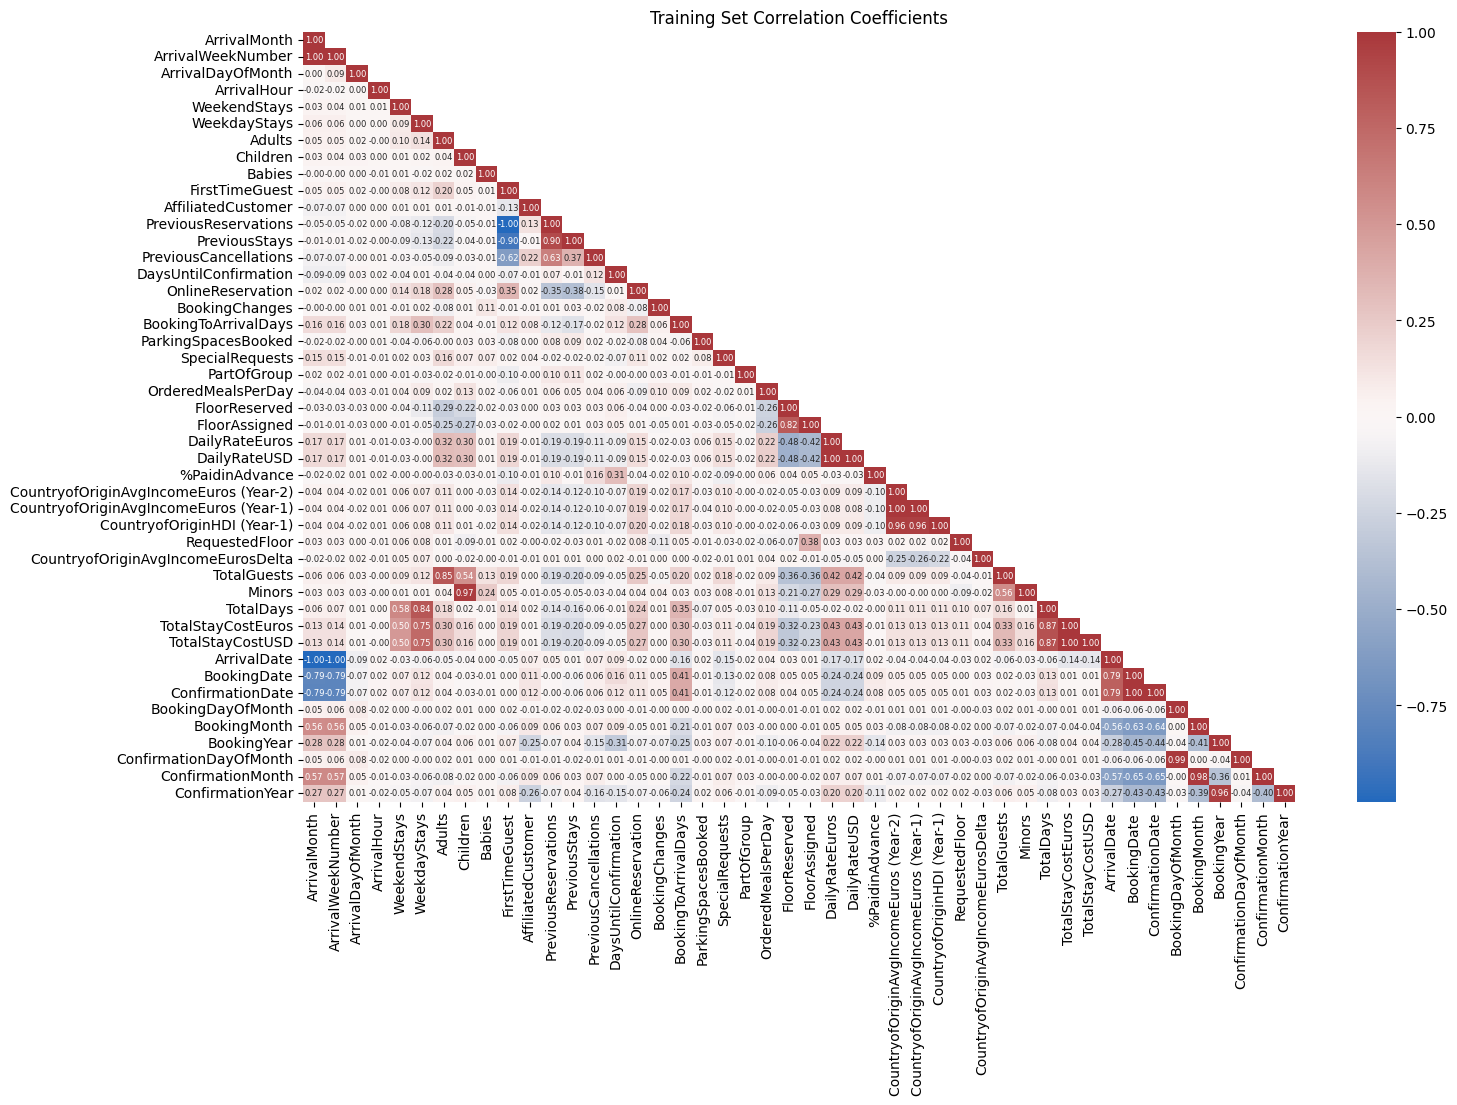

In [ ]:
# Spearman Correlation Coefficient

# Create a mask to cover half of the correlation matrix
mask = np.triu(np.ones_like(tts_train_x_ss.corr(method='spearman'), dtype=bool), k=1)

plt.figure(figsize=(16, 10))

correlation_coefficients = tts_train_x_ss.corr(method = 'spearman')

sns.heatmap(correlation_coefficients,
            annot = True,
            cmap='vlag',
            fmt=".2f",
            annot_kws={"size": 6},
            mask = mask)

# Setting the title of the plot
plt.title('Training Set Correlation Coefficients')

As we can see from looking at the correlation matrix above, there are various features which present a high correlation coefficient between them. However, for a more practical perspective, we will try to create a code that can tell us in the output the feature pairings with the higher correlation coefficients. This way, we can identify which features are more common to be highly correlated with others, meaning that we should be able to drop them, since they are easily explained by others from the dataset. <br>
As a **threshold** to consider two features highly correlated we will use the value **0.75**

In [ ]:
# defines a variable with all the columns of the dataset
dataset_cols = tts_train_x_ss.columns

sp = tts_train_x_ss.loc[:, dataset_cols].corr(method = "spearman")
corr_spearman_flat = sp.stack()


# removes the low-correlated pairs and the auto-correlations
l_threshold = 0.75
u_threshold = 1
srcc_top = corr_spearman_flat[(corr_spearman_flat.abs() > l_threshold) & (corr_spearman_flat.abs() < u_threshold)]

# prints the output of highly correlated pairs of variables
print("Top Most Correlated Feature Pairs: \n", srcc_top.abs())

Top Most Correlated Feature Pairs: 
 ArrivalMonth                            ArrivalWeekNumber                        1.00
                                        ArrivalDate                              1.00
                                        BookingDate                              0.79
                                        ConfirmationDate                         0.79
ArrivalWeekNumber                       ArrivalMonth                             1.00
                                        ArrivalDate                              1.00
                                        BookingDate                              0.79
                                        ConfirmationDate                         0.79
WeekdayStays                            TotalDays                                0.84
Adults                                  TotalGuests                              0.85
Children                                Minors                                   0.97
FirstTimeGuest   

According to the output above, and applying some critical thinking we are able to reduce the total amount of variables to just 25/30 out of the 48 original ones. <br>

However, in order to be sure, we will apply more statistical tests and Feature Selection methods to cross-reference the results and make sure that we cut the features in the most accurate way possible.

------------------------

In [ ]:
# Sequential Feature Selection
from sklearn.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(LogisticRegression(), n_features_to_select = 'auto',
           direction = "forward",
           scoring = 'roc_auc',
           n_jobs = 2)

sfs1 = sfs1.fit(tts_train_x_ss, tts_train_y)


In [ ]:
selected_features_sfs  = pd.Series(sfs1.support_, index = tts_train_x_ss.columns)
selected_features_sfs

ArrivalMonth                               True
ArrivalWeekNumber                         False
ArrivalDayOfMonth                         False
ArrivalHour                               False
WeekendStays                               True
WeekdayStays                              False
Adults                                    False
Children                                  False
Babies                                    False
FirstTimeGuest                             True
AffiliatedCustomer                         True
PreviousReservations                      False
PreviousStays                              True
PreviousCancellations                     False
DaysUntilConfirmation                     False
OnlineReservation                          True
BookingChanges                             True
BookingToArrivalDays                       True
ParkingSpacesBooked                        True
SpecialRequests                            True
PartOfGroup                             

In [ ]:
selected_features_sfs.value_counts()

True     23
False    23
Name: count, dtype: int64

In [ ]:
# RFE (Backwards Feature Selection)

bfs1 = SFS(LogisticRegression(), n_features_to_select = 'auto',
           direction = "backward",
           scoring = 'roc_auc',
           n_jobs = 2)

bfs1 = bfs1.fit(tts_train_x_ss, tts_train_y)


In [ ]:
selected_features_bfs  = pd.Series(bfs1.support_, index = tts_train_x_ss.columns)
selected_features_bfs

ArrivalMonth                              False
ArrivalWeekNumber                          True
ArrivalDayOfMonth                         False
ArrivalHour                               False
WeekendStays                              False
WeekdayStays                              False
Adults                                    False
Children                                  False
Babies                                    False
FirstTimeGuest                            False
AffiliatedCustomer                         True
PreviousReservations                      False
PreviousStays                             False
PreviousCancellations                     False
DaysUntilConfirmation                      True
OnlineReservation                          True
BookingChanges                             True
BookingToArrivalDays                       True
ParkingSpacesBooked                        True
SpecialRequests                            True
PartOfGroup                             

In [ ]:
selected_features_bfs.value_counts()

False    23
True     23
Name: count, dtype: int64

------------------------

In [ ]:
def importance_plot(coef, name):
  imp_coef = coef.sort_values()
  plt.figure(figsize=(16,28))
  imp_coef.plot(kind = 'barh', color = 'gold')
  plt.title(f"Feature Importnce using {name} model")
  plt.show()

In [ ]:
# Lasso Regression
lasso_reg = LassoCV()
lasso_reg.fit(tts_train_x_ss, tts_train_y)
coef = pd.Series(lasso_reg.coef_, index = tts_train_x_ss.columns)
coef.sort_values


<bound method Series.sort_values of ArrivalMonth                              0.00
ArrivalWeekNumber                        -0.09
ArrivalDayOfMonth                        -0.01
ArrivalHour                              -0.00
WeekendStays                             -0.01
WeekdayStays                              0.00
Adults                                    0.00
Children                                  0.01
Babies                                   -0.00
FirstTimeGuest                           -0.01
AffiliatedCustomer                        0.02
PreviousReservations                     -0.00
PreviousStays                            -0.00
PreviousCancellations                     0.00
DaysUntilConfirmation                    -0.01
OnlineReservation                         0.03
BookingChanges                           -0.02
BookingToArrivalDays                      0.06
ParkingSpacesBooked                      -0.06
SpecialRequests                          -0.12
PartOfGroup                              -0.01
OrderedMealsPerDay                       -0.04
FloorReserved                            -0.00
FloorAssigned                             0.01
DailyRateEuros                            0.05
DailyRateUSD                              0.00
%PaidinAdvance                            0.04
CountryofOriginAvgIncomeEuros (Year-2)   -0.01
CountryofOriginAvgIncomeEuros (Year-1)   -0.00
CountryofOriginHDI (Year-1)              -0.06
RequestedFloor                            0.08
CountryofOriginAvgIncomeEurosDelta       -0.02
TotalGuests                               0.02
Minors                                    0.00
TotalDays                                 0.00
TotalStayCostEuros                        0.04
TotalStayCostUSD                          0.00
ArrivalDate                              -0.11
BookingDate                              -0.00
ConfirmationDate                         -0.00
BookingDayOfMonth                        -0.03
BookingMonth                              0.00
BookingYear                              -0.00
ConfirmationDayOfMonth                    0.03
ConfirmationMonth                        -0.00
ConfirmationYear                          0.02
dtype: float64>

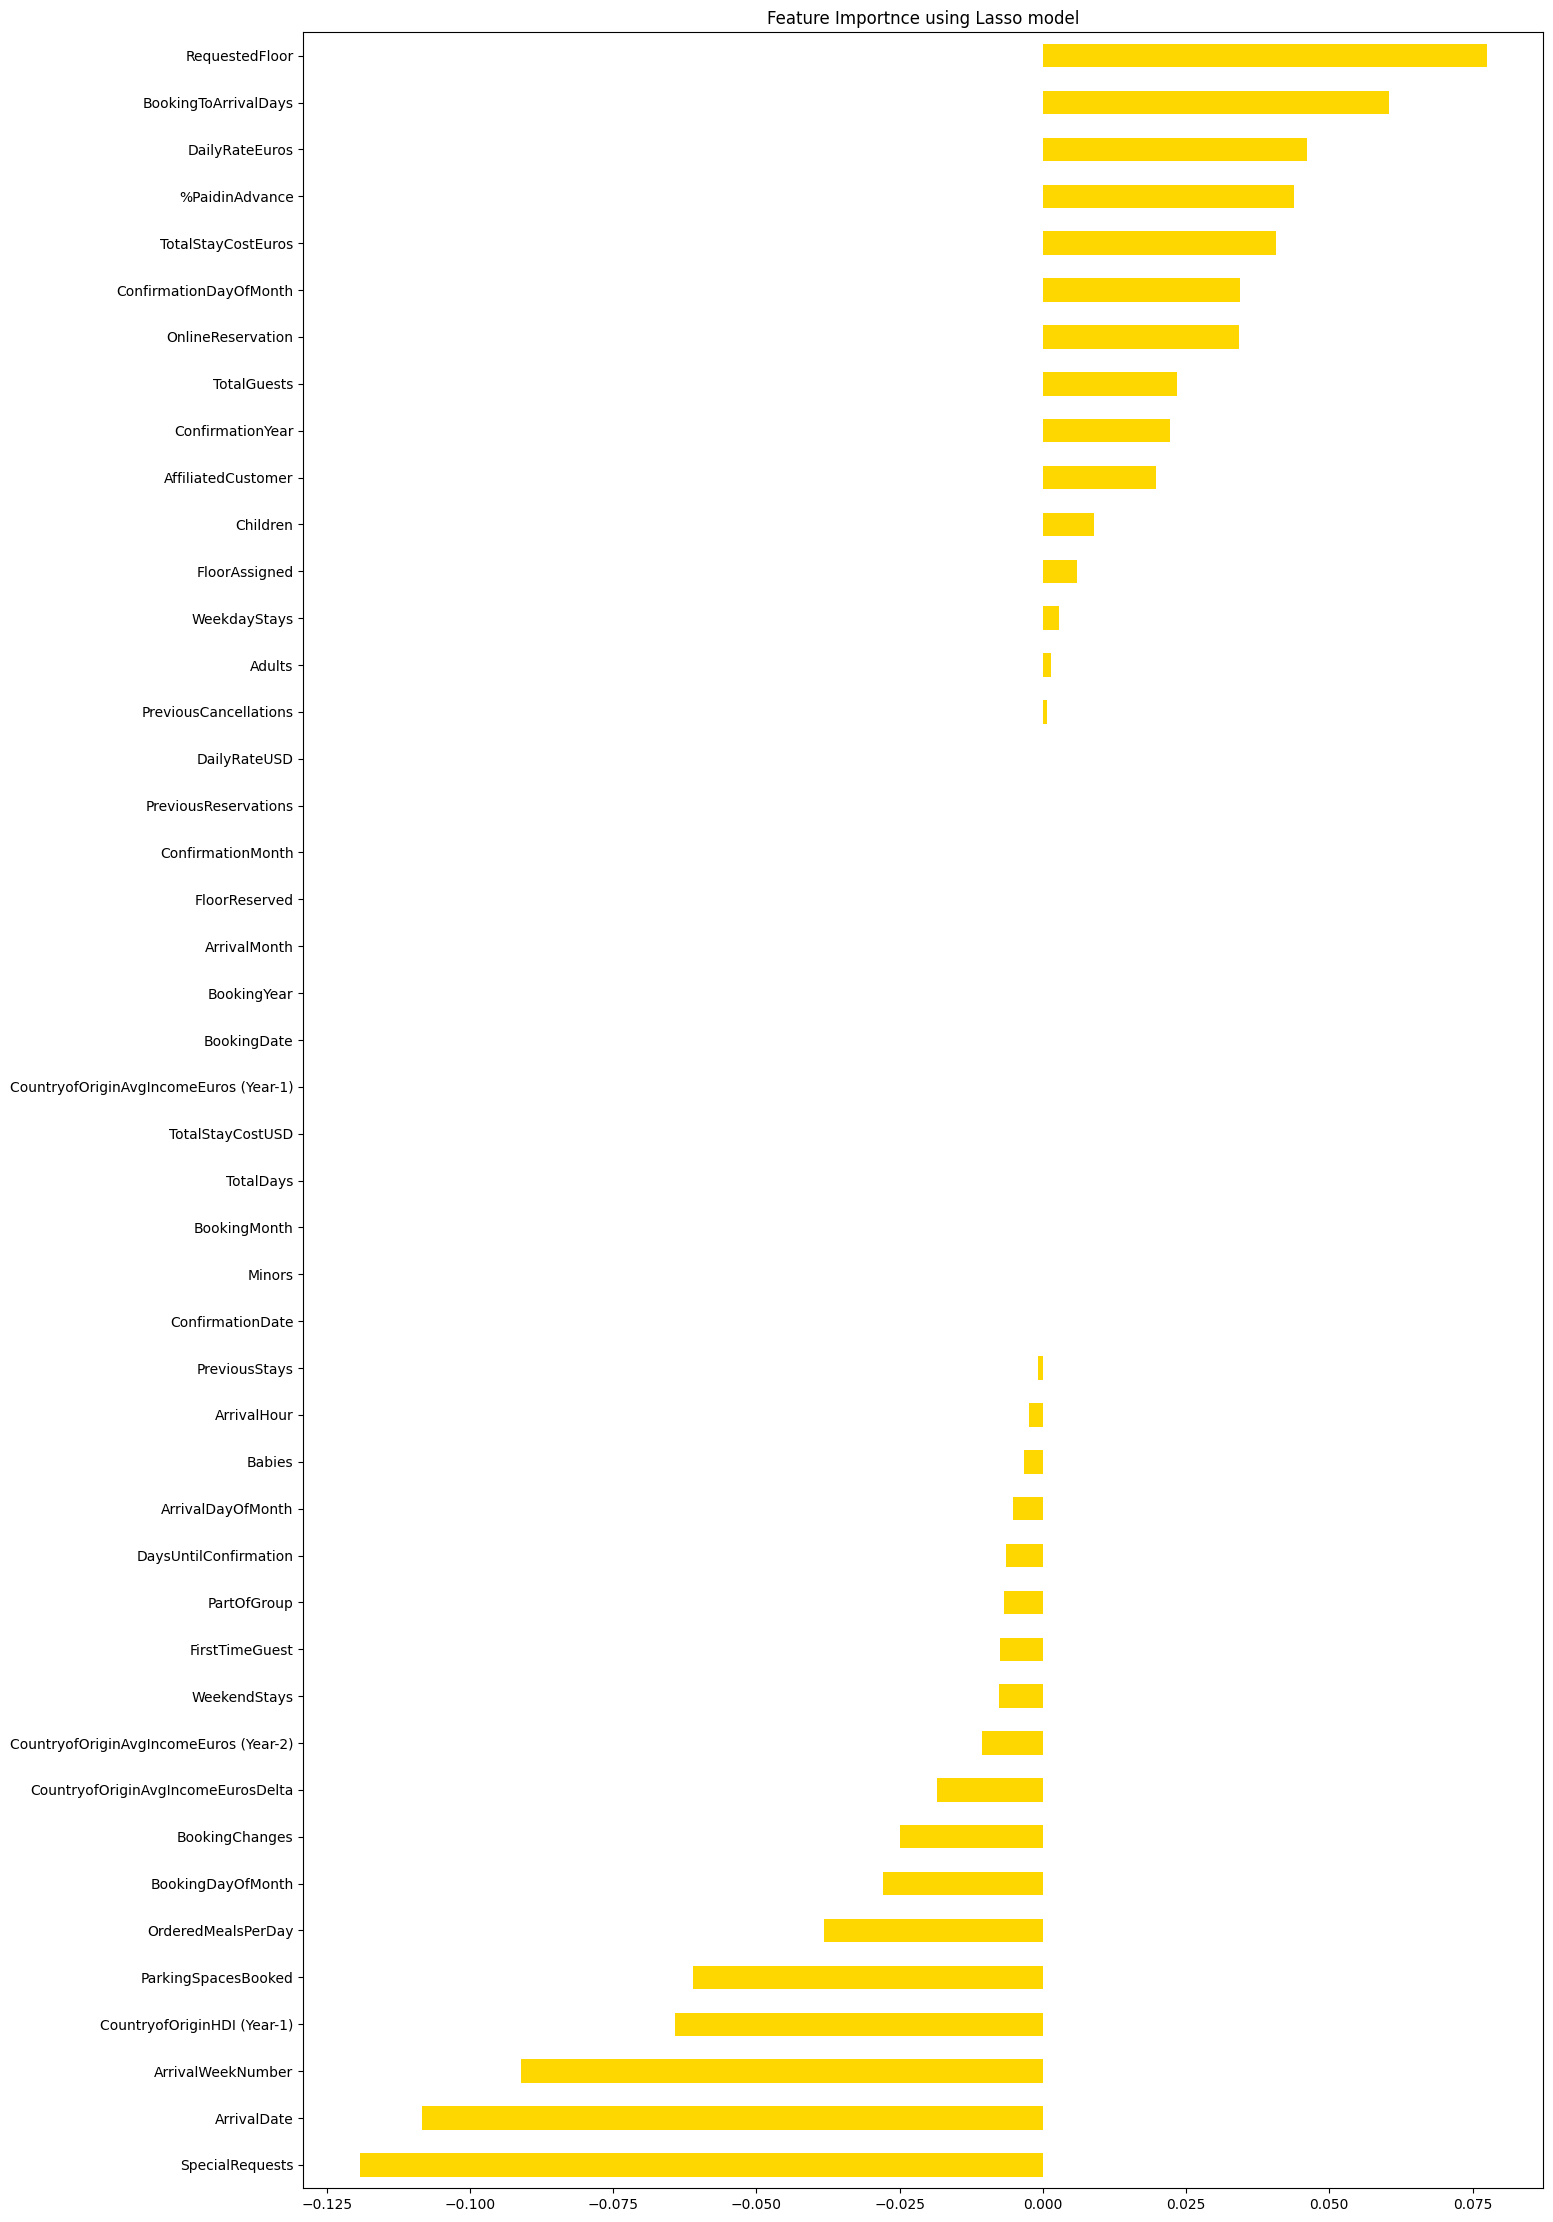

In [ ]:
importance_plot(coef, 'Lasso')

In [ ]:
# ElasticNet
from sklearn.linear_model import ElasticNet

# Instantiate ElasticNet model
elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.5)  # Adjust alpha and l1_ratio as needed

# Fit ElasticNet model to data
elastic_net.fit(tts_train_x_ss, tts_train_y)

# Get selected features based on non-zero coefficients
selected_features_elastic_net = tts_train_x_ss.columns[elastic_net.coef_ != 0]

# Print selected features
print("Selected Features:")
print(selected_features_elastic_net)


Selected Features:
Index(['ArrivalMonth', 'WeekdayStays', 'Children', 'AffiliatedCustomer',
       'OnlineReservation', 'BookingChanges', 'BookingToArrivalDays',
       'ParkingSpacesBooked', 'SpecialRequests', 'PartOfGroup',
       'OrderedMealsPerDay', 'DailyRateEuros', 'DailyRateUSD',
       '%PaidinAdvance', 'CountryofOriginAvgIncomeEuros (Year-2)',
       'CountryofOriginHDI (Year-1)', 'RequestedFloor',
       'CountryofOriginAvgIncomeEurosDelta', 'TotalGuests',
       'TotalStayCostEuros', 'TotalStayCostUSD', 'BookingYear',
       'ConfirmationDayOfMonth', 'ConfirmationYear'],
      dtype='object')


#### Modelling

In [ ]:
# Listing the features certain to be dropped according to the cross referenced
# feature selctions
certain_drops_ss = ['ArrivalDayOfMonth',
                    'ArrivalHour',
                    'WeekdayStays',
                    'Adults',
                    'Children',
                    'Babies',
                    'PreviousReservations',
                    'PreviousStays',
                    'PreviousCancellations',
                    'FloorAssigned',
                    'CountryofOriginAvgIncomeEuros (Year-1)',
                    'Minors',
                    'TotalDays',
                    'ConfirmationDayOfMonth',
                    'ConfirmationMonth',
                    'ConfirmationYear']

# Dropping them from training and testing sets
possible_ss_train = tts_train_x_ss.drop(certain_drops_ss, axis = 1)
possible_ss_valid = tts_val_x_ss.drop(certain_drops_ss, axis = 1)

##### Creating basic models using all plausible features

In [ ]:
# Creating a LR model using only the features certain to maintain
original_lr_train_acc_score, original_lr_val_acc_score = simplest_model_tester(LogisticRegression(), possible_ss_train, tts_train_y, possible_ss_valid, tts_val_y, True)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.85      0.80      6423
           1       0.69      0.56      0.62      3888

    accuracy                           0.74     10311
   macro avg       0.73      0.70      0.71     10311
weighted avg       0.74      0.74      0.73     10311

0.7403743574823004
[[5466  957]
 [1720 2168]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------------------------

In [ ]:
# Creating a RF model using only the features certain to maintain
original_rf_train_acc_score, original_rf_val_acc_score = simplest_model_tester(RandomForestClassifier(), possible_ss_train, tts_train_y, possible_ss_valid, tts_val_y, True)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6423
           1       1.00      1.00      1.00      3888

    accuracy                           1.00     10311
   macro avg       1.00      1.00      1.00     10311
weighted avg       1.00      1.00      1.00     10311

0.9982542915333139
[[6414    9]
 [   9 3879]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------------------------

Using LazyClassifier to test infinite models

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(possible_ss_train, possible_ss_valid, tts_train_y, tts_val_y)

models

 97%|█████████▋| 28/29 [01:07<00:01,  1.99s/it]

[LightGBM] [Info] Number of positive: 3888, number of negative: 6423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002098 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2486
[LightGBM] [Info] Number of data points in the train set: 10311, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.377073 -> initscore=-0.501990
[LightGBM] [Info] Start training from score -0.501990


100%|██████████| 29/29 [01:08<00:00,  2.35s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.79,0.77,0.77,0.79,0.47
LGBMClassifier,0.79,0.77,0.77,0.79,0.46
ExtraTreesClassifier,0.78,0.75,0.75,0.78,1.70
RandomForestClassifier,0.78,0.75,0.75,0.77,2.57
NuSVC,0.77,0.74,0.74,0.77,13.32
BaggingClassifier,0.77,0.74,0.74,0.77,1.67
SVC,0.77,0.73,0.73,0.76,9.59
KNeighborsClassifier,0.74,0.72,0.72,0.74,0.55
AdaBoostClassifier,0.74,0.72,0.72,0.74,1.26


Now, having the results of every model, we can note that there are sevral models with similar performances in our dataset (without fine-tuning) and without removing the questionable features. However, among the tested models, obviously some had shorter running-times than others. When selecting our final models we will obviously be looking for those that provide better results while also prioritizing those that are computationally more efficient. <br>
Having this in mind, the best models we have and therefore those which we will carry on for the Fine-Tuning will be:
- XGBClassifier;
- LGBMCLassifier;
- ExtraTreesClassifier;
- RandomForestClassifier;
- BaggingClassifier;
- KNeighbors;
- DecisionTreesClassifier;
- Logisticregression;


However, prior to going for the fine-tuning we must test te creation of models with and without the features that we considered as questionable. To do this, we will consider only the simplest models to understand (LogisticRegression and RandomForestClassifier)

##### Individual Try With and Withouts (SS Version)

###### ArrivalMonth

In [ ]:
# Excluding ArrivalMonth
possible_ss_train_am = possible_ss_train.copy()
possible_ss_train_am.drop('ArrivalMonth', axis = 1, inplace = True)

possible_ss_val_am = possible_ss_valid.copy()
possible_ss_val_am.drop('ArrivalMonth', axis = 1, inplace = True)

print("Logistic Regression results")
temp_train_acc, temp_val_acc = simplest_model_tester(LogisticRegression(), possible_ss_train_am, tts_train_y, possible_ss_val_am, tts_val_y, False)
print(f"Scores prior to dropping were: \n For the training:{original_lr_train_acc_score} || For the testing: {original_lr_val_acc_score} \n")
print(f"Scores after dropping were: \n For the training:{temp_train_acc} || For the testing: {temp_val_acc} \n")


print("")
print("")

print("RandomForest results")
temp_train_acc, temp_val_acc = simplest_model_tester(RandomForestClassifier(), possible_ss_train_am, tts_train_y, possible_ss_val_am, tts_val_y, False)
print(f"Scores prior to dropping were: \n For the training:{original_rf_train_acc_score} || For the testing: {original_rf_val_acc_score}")
print(f"Scores after dropping were: \n For the training:{temp_train_acc} || For the testing: {temp_val_acc} \n")

Logistic Regression results
Scores prior to dropping were: 
 For the training:0.7403743574823004 || For the testing: 0.733566026759744 

Scores after dropping were: 
 For the training:0.739695470856367 || For the testing: 0.7338568935427574 



RandomForest results
Scores prior to dropping were: 
 For the training:0.9982542915333139 || For the testing: 0.7835951134380453
Scores after dropping were: 
 For the training:0.9982542915333139 || For the testing: 0.7824316463059918 



The only score to get worse was the training score for the Logisticregression, with all other scores improving slightly. Therefore, we will be dropping this variable from the dataset.

In [ ]:
# Dropping ArrivalMonth
possible_ss_train.drop('ArrivalMonth', axis = 1, inplace = True)
possible_ss_valid.drop('ArrivalMonth', axis = 1, inplace = True)

###### ArrivalWeekNumber

In [ ]:
# Excluding ArrivalMonth
possible_ss_train_am = possible_ss_train.copy()
possible_ss_train_am.drop('ArrivalWeekNumber', axis = 1, inplace = True)

possible_ss_val_am = possible_ss_valid.copy()
possible_ss_val_am.drop('ArrivalWeekNumber', axis = 1, inplace = True)

print("Logistic Regression results")
temp_train_acc, temp_val_acc = simplest_model_tester(LogisticRegression(), possible_ss_train_am, tts_train_y, possible_ss_val_am, tts_val_y, False)
print(f"Scores prior to dropping were: \n For the training:{original_lr_train_acc_score} || For the testing: {original_lr_val_acc_score} \n")
print(f"Scores after dropping were: \n For the training:{temp_train_acc} || For the testing: {temp_val_acc} \n")


print("")
print("")

print("RandomForest results")
temp_train_acc, temp_val_acc = simplest_model_tester(RandomForestClassifier(), possible_ss_train_am, tts_train_y, possible_ss_val_am, tts_val_y, False)
print(f"Scores prior to dropping were: \n For the training:{original_rf_train_acc_score} || For the testing: {original_rf_val_acc_score}")
print(f"Scores after dropping were: \n For the training:{temp_train_acc} || For the testing: {temp_val_acc} \n")

Logistic Regression results
Scores prior to dropping were: 
 For the training:0.7403743574823004 || For the testing: 0.733566026759744 

Scores after dropping were: 
 For the training:0.7392105518378431 || For the testing: 0.7326934264107039 



RandomForest results
Scores prior to dropping were: 
 For the training:0.9982542915333139 || For the testing: 0.7835951134380453
Scores after dropping were: 
 For the training:0.9982542915333139 || For the testing: 0.7897033158813264 



In this case, because performance increased in one model and decreased in the other, we will be keeping this variable.

###### FirstTimeGuest

In [ ]:
# Excluding ArrivalMonth
possible_ss_train_am = possible_ss_train.copy()
possible_ss_train_am.drop('FirstTimeGuest', axis = 1, inplace = True)

possible_ss_val_am = possible_ss_valid.copy()
possible_ss_val_am.drop('FirstTimeGuest', axis = 1, inplace = True)

print("Logistic Regression results")
temp_train_acc, temp_val_acc = simplest_model_tester(LogisticRegression(), possible_ss_train_am, tts_train_y, possible_ss_val_am, tts_val_y, False)
print(f"Scores prior to dropping were: \n For the training:{original_lr_train_acc_score} || For the testing: {original_lr_val_acc_score} \n")
print(f"Scores after dropping were: \n For the training:{temp_train_acc} || For the testing: {temp_val_acc} \n")


print("")
print("")

print("RandomForest results")
temp_train_acc, temp_val_acc = simplest_model_tester(RandomForestClassifier(), possible_ss_train_am, tts_train_y, possible_ss_val_am, tts_val_y, False)
print(f"Scores prior to dropping were: \n For the training:{original_rf_train_acc_score} || For the testing: {original_rf_val_acc_score}")
print(f"Scores after dropping were: \n For the training:{temp_train_acc} || For the testing: {temp_val_acc} \n")

Logistic Regression results
Scores prior to dropping were: 
 For the training:0.7403743574823004 || For the testing: 0.733566026759744 

Scores after dropping were: 
 For the training:0.7399864222674813 || For the testing: 0.7341477603257708 



RandomForest results
Scores prior to dropping were: 
 For the training:0.9982542915333139 || For the testing: 0.7835951134380453
Scores after dropping were: 
 For the training:0.9982542915333139 || For the testing: 0.7789412449098313 



In this case, since all validation scores were improved with the LogReg training score only decreasing slightly and the RF training score remaining the same, we will be dropping this variable from the dataset.

In [ ]:
# Dropping FirstTimeGuest
possible_ss_train.drop('FirstTimeGuest', axis = 1, inplace = True)
possible_ss_valid.drop('FirstTimeGuest', axis = 1, inplace = True)

###### DaysUntilConfirmation

In [ ]:
# Excluding ArrivalMonth
possible_ss_train_am = possible_ss_train.copy()
possible_ss_train_am.drop('DaysUntilConfirmation', axis = 1, inplace = True)

possible_ss_val_am = possible_ss_valid.copy()
possible_ss_val_am.drop('DaysUntilConfirmation', axis = 1, inplace = True)

print("Logistic Regression results")
temp_train_acc, temp_val_acc = simplest_model_tester(LogisticRegression(), possible_ss_train_am, tts_train_y, possible_ss_val_am, tts_val_y, False)
print(f"Scores prior to dropping were: \n For the training:{original_lr_train_acc_score} || For the testing: {original_lr_val_acc_score} \n")
print(f"Scores after dropping were: \n For the training:{temp_train_acc} || For the testing: {temp_val_acc} \n")


print("")
print("")

print("RandomForest results")
temp_train_acc, temp_val_acc = simplest_model_tester(RandomForestClassifier(), possible_ss_train_am, tts_train_y, possible_ss_val_am, tts_val_y, False)
print(f"Scores prior to dropping were: \n For the training:{original_rf_train_acc_score} || For the testing: {original_rf_val_acc_score}")
print(f"Scores after dropping were: \n For the training:{temp_train_acc} || For the testing: {temp_val_acc} \n")

Logistic Regression results
Scores prior to dropping were: 
 For the training:0.7403743574823004 || For the testing: 0.733566026759744 

Scores after dropping were: 
 For the training:0.7400834060711862 || For the testing: 0.7341477603257708 



RandomForest results
Scores prior to dropping were: 
 For the training:0.9982542915333139 || For the testing: 0.7835951134380453
Scores after dropping were: 
 For the training:0.9982542915333139 || For the testing: 0.7789412449098313 



In this case, since all validation scores were improved with the LogReg training score only decreasing slightly and the RF training score remaining the same, we will be dropping this variable from the dataset.

In [ ]:
# Dropping DaysUntilConfirmation
possible_ss_train.drop('DaysUntilConfirmation', axis = 1, inplace = True)
possible_ss_valid.drop('DaysUntilConfirmation', axis = 1, inplace = True)

###### PartOfgroup

In [ ]:
# Excluding ArrivalMonth
possible_ss_train_am = possible_ss_train.copy()
possible_ss_train_am.drop('PartOfGroup', axis = 1, inplace = True)

possible_ss_val_am = possible_ss_valid.copy()
possible_ss_val_am.drop('PartOfGroup', axis = 1, inplace = True)

print("Logistic Regression results")
temp_train_acc, temp_val_acc = simplest_model_tester(LogisticRegression(), possible_ss_train_am, tts_train_y, possible_ss_val_am, tts_val_y, False)
print(f"Scores prior to dropping were: \n For the training:{original_lr_train_acc_score} || For the testing: {original_lr_val_acc_score} \n")
print(f"Scores after dropping were: \n For the training:{temp_train_acc} || For the testing: {temp_val_acc} \n")


print("")
print("")

print("RandomForest results")
temp_train_acc, temp_val_acc = simplest_model_tester(RandomForestClassifier(), possible_ss_train_am, tts_train_y, possible_ss_val_am, tts_val_y, False)
print(f"Scores prior to dropping were: \n For the training:{original_rf_train_acc_score} || For the testing: {original_rf_val_acc_score}")
print(f"Scores after dropping were: \n For the training:{temp_train_acc} || For the testing: {temp_val_acc} \n")

Logistic Regression results
Scores prior to dropping were: 
 For the training:0.7403743574823004 || For the testing: 0.733566026759744 

Scores after dropping were: 
 For the training:0.7400834060711862 || For the testing: 0.7338568935427574 



RandomForest results
Scores prior to dropping were: 
 For the training:0.9982542915333139 || For the testing: 0.7835951134380453
Scores after dropping were: 
 For the training:0.9982542915333139 || For the testing: 0.7815590459569517 



In this case, since all validation scores were improved with the LogReg training score only decreasing slightly and the RF training score remaining the same, we will be dropping this variable from the dataset.

In [ ]:
# Dropping DaysUntilConfirmation
possible_ss_train.drop('PartOfGroup', axis = 1, inplace = True)
possible_ss_valid.drop('PartOfGroup', axis = 1, inplace = True)

###### FloorReserved

In [ ]:
# Excluding ArrivalMonth
possible_ss_train_am = possible_ss_train.copy()
possible_ss_train_am.drop('FloorReserved', axis = 1, inplace = True)

possible_ss_val_am = possible_ss_valid.copy()
possible_ss_val_am.drop('FloorReserved', axis = 1, inplace = True)

print("Logistic Regression results")
temp_train_acc, temp_val_acc = simplest_model_tester(LogisticRegression(), possible_ss_train_am, tts_train_y, possible_ss_val_am, tts_val_y, False)
print(f"Scores prior to dropping were: \n For the training:{original_lr_train_acc_score} || For the testing: {original_lr_val_acc_score} \n")
print(f"Scores after dropping were: \n For the training:{temp_train_acc} || For the testing: {temp_val_acc} \n")


print("")
print("")

print("RandomForest results")
temp_train_acc, temp_val_acc = simplest_model_tester(RandomForestClassifier(), possible_ss_train_am, tts_train_y, possible_ss_val_am, tts_val_y, False)
print(f"Scores prior to dropping were: \n For the training:{original_rf_train_acc_score} || For the testing: {original_rf_val_acc_score}")
print(f"Scores after dropping were: \n For the training:{temp_train_acc} || For the testing: {temp_val_acc} \n")

Logistic Regression results
Scores prior to dropping were: 
 For the training:0.7403743574823004 || For the testing: 0.733566026759744 

Scores after dropping were: 
 For the training:0.7409562603045291 || For the testing: 0.7344386271087842 



RandomForest results
Scores prior to dropping were: 
 For the training:0.9982542915333139 || For the testing: 0.7835951134380453
Scores after dropping were: 
 For the training:0.9982542915333139 || For the testing: 0.7812681791739383 



In this case, because the validation scores improved in one of the models (LR) and decreased in the other (RF) we will be maintaining the variable in the dataset.

###### BookingDate

In [ ]:
# Excluding ArrivalMonth
possible_ss_train_am = possible_ss_train.copy()
possible_ss_train_am.drop('BookingDate', axis = 1, inplace = True)

possible_ss_val_am = possible_ss_valid.copy()
possible_ss_val_am.drop('BookingDate', axis = 1, inplace = True)

print("Logistic Regression results")
temp_train_acc, temp_val_acc = simplest_model_tester(LogisticRegression(), possible_ss_train_am, tts_train_y, possible_ss_val_am, tts_val_y, False)
print(f"Scores prior to dropping were: \n For the training:{original_lr_train_acc_score} || For the testing: {original_lr_val_acc_score} \n")
print(f"Scores after dropping were: \n For the training:{temp_train_acc} || For the testing: {temp_val_acc} \n")


print("")
print("")

print("RandomForest results")
temp_train_acc, temp_val_acc = simplest_model_tester(RandomForestClassifier(), possible_ss_train_am, tts_train_y, possible_ss_val_am, tts_val_y, False)
print(f"Scores prior to dropping were: \n For the training:{original_rf_train_acc_score} || For the testing: {original_rf_val_acc_score}")
print(f"Scores after dropping were: \n For the training:{temp_train_acc} || For the testing: {temp_val_acc} \n")

Logistic Regression results
Scores prior to dropping were: 
 For the training:0.7403743574823004 || For the testing: 0.733566026759744 

Scores after dropping were: 
 For the training:0.7402773736785957 || For the testing: 0.7332751599767307 



RandomForest results
Scores prior to dropping were: 
 For the training:0.9982542915333139 || For the testing: 0.7835951134380453
Scores after dropping were: 
 For the training:0.9982542915333139 || For the testing: 0.7783595113438045 



In this case the performance decreased in one of the model's validation score (LR) but increased in the other (RF). Normally, we would keep the variable in the dataset, however because the increase of performance in the RF was significantly higher in comparison to the decrease verified in the LR model, we will be dropping the variable from the dataset taking into consideration that performance can be improved a bit more.

In [ ]:
# Dropping DaysUntilConfirmation
possible_ss_train.drop('BookingDate', axis = 1, inplace = True)
possible_ss_valid.drop('BookingDate', axis = 1, inplace = True)

###### ConfirmationDate

In [ ]:
# Excluding ArrivalMonth
possible_ss_train_am = possible_ss_train.copy()
possible_ss_train_am.drop('ConfirmationDate', axis = 1, inplace = True)

possible_ss_val_am = possible_ss_valid.copy()
possible_ss_val_am.drop('ConfirmationDate', axis = 1, inplace = True)

print("Logistic Regression results")
temp_train_acc, temp_val_acc = simplest_model_tester(LogisticRegression(), possible_ss_train_am, tts_train_y, possible_ss_val_am, tts_val_y, False)
print(f"Scores prior to dropping were: \n For the training:{original_lr_train_acc_score} || For the testing: {original_lr_val_acc_score} \n")
print(f"Scores after dropping were: \n For the training:{temp_train_acc} || For the testing: {temp_val_acc} \n")


print("")
print("")

print("RandomForest results")
temp_train_acc, temp_val_acc = simplest_model_tester(RandomForestClassifier(), possible_ss_train_am, tts_train_y, possible_ss_val_am, tts_val_y, False)
print(f"Scores prior to dropping were: \n For the training:{original_rf_train_acc_score} || For the testing: {original_rf_val_acc_score}")
print(f"Scores after dropping were: \n For the training:{temp_train_acc} || For the testing: {temp_val_acc} \n")

Logistic Regression results
Scores prior to dropping were: 
 For the training:0.7403743574823004 || For the testing: 0.733566026759744 

Scores after dropping were: 
 For the training:0.74056832508971 || For the testing: 0.7332751599767307 



RandomForest results
Scores prior to dropping were: 
 For the training:0.9982542915333139 || For the testing: 0.7835951134380453
Scores after dropping were: 
 For the training:0.9982542915333139 || For the testing: 0.7818499127399651 



In this case, performance remained approximately the same despite increasing slightly in one case (RF) and decreasing slighltly in the other (LR). Therefore, we will keep the variable in the dataset.

###### BookingDayOfMonth

In [ ]:
# Excluding ArrivalMonth
possible_ss_train_am = possible_ss_train.copy()
possible_ss_train_am.drop('BookingDayOfMonth', axis = 1, inplace = True)

possible_ss_val_am = possible_ss_valid.copy()
possible_ss_val_am.drop('BookingDayOfMonth', axis = 1, inplace = True)

print("Logistic Regression results")
temp_train_acc, temp_val_acc = simplest_model_tester(LogisticRegression(), possible_ss_train_am, tts_train_y, possible_ss_val_am, tts_val_y, False)
print(f"Scores prior to dropping were: \n For the training:{original_lr_train_acc_score} || For the testing: {original_lr_val_acc_score} \n")
print(f"Scores after dropping were: \n For the training:{temp_train_acc} || For the testing: {temp_val_acc} \n")


print("")
print("")

print("RandomForest results")
temp_train_acc, temp_val_acc = simplest_model_tester(RandomForestClassifier(), possible_ss_train_am, tts_train_y, possible_ss_val_am, tts_val_y, False)
print(f"Scores prior to dropping were: \n For the training:{original_rf_train_acc_score} || For the testing: {original_rf_val_acc_score}")
print(f"Scores after dropping were: \n For the training:{temp_train_acc} || For the testing: {temp_val_acc} \n")

Logistic Regression results
Scores prior to dropping were: 
 For the training:0.7403743574823004 || For the testing: 0.733566026759744 

Scores after dropping were: 
 For the training:0.7394045194452527 || For the testing: 0.733566026759744 



RandomForest results
Scores prior to dropping were: 
 For the training:0.9982542915333139 || For the testing: 0.7835951134380453
Scores after dropping were: 
 For the training:0.9982542915333139 || For the testing: 0.7835951134380453 



In this case because one of he scores remained the same and the other improved slightly, we will be dropping the variable from the dataset.

In [ ]:
# Dropping DaysUntilConfirmation
possible_ss_train.drop('BookingDayOfMonth', axis = 1, inplace = True)
possible_ss_valid.drop('BookingDayOfMonth', axis = 1, inplace = True)

###### BookingMonth

In [ ]:
# Excluding ArrivalMonth
possible_ss_train_am = possible_ss_train.copy()
possible_ss_train_am.drop('BookingMonth', axis = 1, inplace = True)

possible_ss_val_am = possible_ss_valid.copy()
possible_ss_val_am.drop('BookingMonth', axis = 1, inplace = True)

print("Logistic Regression results")
temp_train_acc, temp_val_acc = simplest_model_tester(LogisticRegression(), possible_ss_train_am, tts_train_y, possible_ss_val_am, tts_val_y, False)
print(f"Scores prior to dropping were: \n For the training:{original_lr_train_acc_score} || For the testing: {original_lr_val_acc_score} \n")
print(f"Scores after dropping were: \n For the training:{temp_train_acc} || For the testing: {temp_val_acc} \n")


print("")
print("")

print("RandomForest results")
temp_train_acc, temp_val_acc = simplest_model_tester(RandomForestClassifier(), possible_ss_train_am, tts_train_y, possible_ss_val_am, tts_val_y, False)
print(f"Scores prior to dropping were: \n For the training:{original_rf_train_acc_score} || For the testing: {original_rf_val_acc_score}")
print(f"Scores after dropping were: \n For the training:{temp_train_acc} || For the testing: {temp_val_acc} \n")

Logistic Regression results
Scores prior to dropping were: 
 For the training:0.7403743574823004 || For the testing: 0.733566026759744 

Scores after dropping were: 
 For the training:0.7384346814082048 || For the testing: 0.7347294938917975 



RandomForest results
Scores prior to dropping were: 
 For the training:0.9982542915333139 || For the testing: 0.7835951134380453
Scores after dropping were: 
 For the training:0.9982542915333139 || For the testing: 0.7766143106457243 



Because the removal of this feature increased the performance of one of the models and reduced the performance of the other we will be maintaining the feature in the dataset.

###### BookingYear

In [ ]:
# Excluding ArrivalMonth
possible_ss_train_am = possible_ss_train.copy()
possible_ss_train_am.drop('BookingYear', axis = 1, inplace = True)

possible_ss_val_am = possible_ss_valid.copy()
possible_ss_val_am.drop('BookingYear', axis = 1, inplace = True)

print("Logistic Regression results")
temp_train_acc, temp_val_acc = simplest_model_tester(LogisticRegression(), possible_ss_train_am, tts_train_y, possible_ss_val_am, tts_val_y, False)
print(f"Scores prior to dropping were: \n For the training:{original_lr_train_acc_score} || For the testing: {original_lr_val_acc_score} \n")
print(f"Scores after dropping were: \n For the training:{temp_train_acc} || For the testing: {temp_val_acc} \n")


print("")
print("")

print("RandomForest results")
temp_train_acc, temp_val_acc = simplest_model_tester(RandomForestClassifier(), possible_ss_train_am, tts_train_y, possible_ss_val_am, tts_val_y, False)
print(f"Scores prior to dropping were: \n For the training:{original_rf_train_acc_score} || For the testing: {original_rf_val_acc_score}")
print(f"Scores after dropping were: \n For the training:{temp_train_acc} || For the testing: {temp_val_acc} \n")

Logistic Regression results
Scores prior to dropping were: 
 For the training:0.7403743574823004 || For the testing: 0.733566026759744 

Scores after dropping were: 
 For the training:0.739695470856367 || For the testing: 0.7350203606748109 



RandomForest results
Scores prior to dropping were: 
 For the training:0.9982542915333139 || For the testing: 0.7835951134380453
Scores after dropping were: 
 For the training:0.9982542915333139 || For the testing: 0.7789412449098313 



After analysing the results, the performance improved for both the LR and the RF models. So, we will be dropping the variable from the dataset.

In [ ]:
# Dropping DaysUntilConfirmation
possible_ss_train.drop('BookingYear', axis = 1, inplace = True)
possible_ss_valid.drop('BookingYear', axis = 1, inplace = True)

##### New Assessment of Basic Models Performance

After having finished his testing phase, we have been able to reduce the total size of our training and validation datasets to just 23 features. Now, we will re-assess the results obtained using the LazyClassifier to see if the best models are still the same ones as we had, prior to the dropping of the questionable features

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(possible_ss_train, possible_ss_valid, tts_train_y, tts_val_y)

models

 97%|█████████▋| 28/29 [00:54<00:01,  1.54s/it]

[LightGBM] [Info] Number of positive: 3888, number of negative: 6423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001569 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2149
[LightGBM] [Info] Number of data points in the train set: 10311, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.377073 -> initscore=-0.501990
[LightGBM] [Info] Start training from score -0.501990


100%|██████████| 29/29 [00:55<00:00,  1.91s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.79,0.77,0.77,0.79,0.36
XGBClassifier,0.79,0.76,0.76,0.78,0.41
RandomForestClassifier,0.78,0.76,0.76,0.78,2.95
ExtraTreesClassifier,0.78,0.75,0.75,0.78,1.54
NuSVC,0.77,0.74,0.74,0.76,11.13
BaggingClassifier,0.76,0.73,0.73,0.76,1.38
SVC,0.77,0.73,0.73,0.76,6.76
AdaBoostClassifier,0.75,0.72,0.72,0.74,1.16
KNeighborsClassifier,0.74,0.72,0.72,0.74,0.39


Overall, it's fair to say that we saw a reduction of the accuracy scores. However, we saw a reduction in terms overfit (score comparison of Accuracy and F1-Score).
Using this new version of the dataset, the best models appear to be:
- LGBMClassifier; (.79)
- XGBClassifier; (.785)
- RandomForestClassifier; (.78)
- ExtraTreesClassifier; (.78)
- BaggingClassifier; (.76)
- SVC; (.765) - higher run-time
- AdaBoostClassifier; (.745)
- KNeighbors; (.74)
- LogisticRegression; (.735)


Before we proceed with the fine-tuning of some of these models...

### Robust Scaler
For the RobustScaler, we are going to apply the same methodology that we did for the Standard Scaler. We will start by fitting the scaler, then we will perform feature selection (by applying various feature Selection methods) and then we will carry on by creating models using the features obtained in the aforementioned section.

In [ ]:
# Creating the Scaler instance
rb_scaler = RobustScaler()

# Fitting to the data
# Training data
tts_train_x_rb = rb_scaler.fit_transform(tts_train_x)
tts_train_x_rb = pd.DataFrame(tts_train_x_rb, columns = tts_train_x.columns).set_index(tts_train_x.index)
# Validation data
tts_val_x_rb = rb_scaler.transform(tts_val_x)
tts_val_x_rb = pd.DataFrame(tts_val_x_rb, columns = tts_val_x.columns).set_index(tts_val_x.index)


#### Feature Selection

Text(0.5, 1.0, 'Training Set Correlation Coefficients')

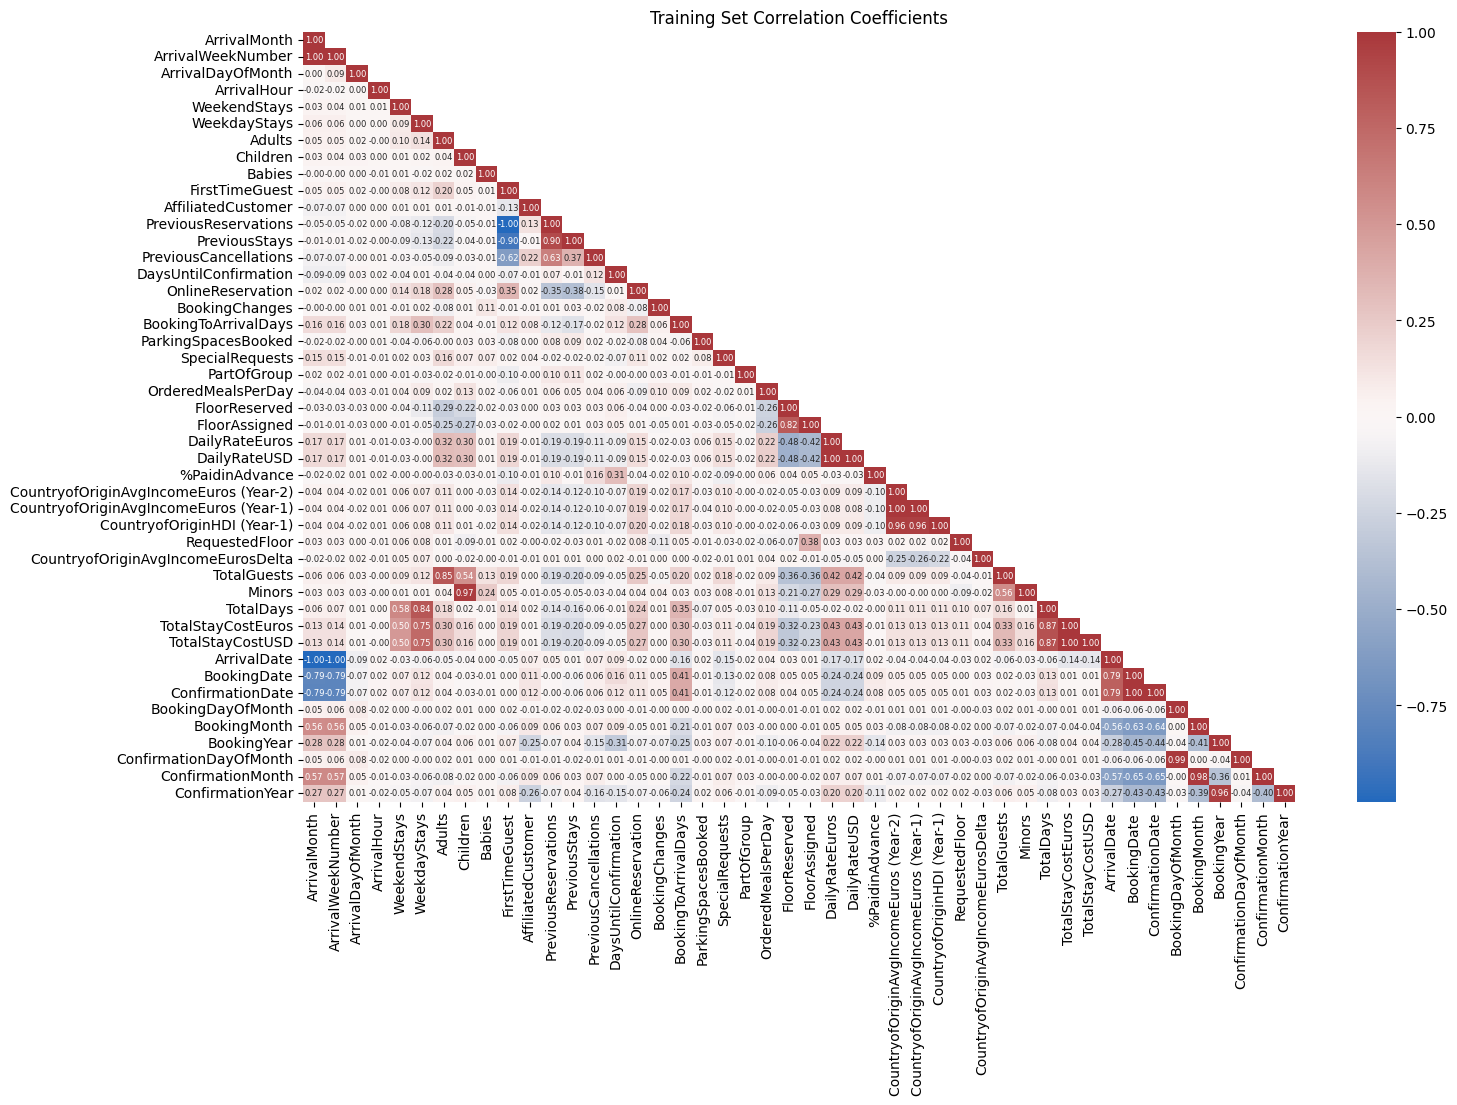

In [ ]:
# Spearman Correlation Coefficient

# Create a mask to cover half of the correlation matrix
mask = np.triu(np.ones_like(tts_train_x_rb.corr(method='spearman'), dtype=bool), k=1)

plt.figure(figsize=(16, 10))

correlation_coefficients = tts_train_x_rb.corr(method = 'spearman')

sns.heatmap(correlation_coefficients,
            annot = True,
            cmap='vlag',
            fmt=".2f",
            annot_kws={"size": 6},
            mask = mask)

# Setting the title of the plot
plt.title('Training Set Correlation Coefficients')

In [ ]:
# defines a variable with all the columns of the dataset
dataset_cols = tts_train_x_rb.columns

sp = tts_train_x_rb.loc[:, dataset_cols].corr(method = "spearman")
corr_spearman_flat = sp.stack()


# removes the low-correlated pairs and the auto-correlations
l_threshold = 0.75
u_threshold = 1
srcc_top = corr_spearman_flat[(corr_spearman_flat.abs() > l_threshold) & (corr_spearman_flat.abs() < u_threshold)]

# prints the output of highly correlated pairs of variables
print("Top Most Correlated Feature Pairs: \n", srcc_top.abs())

Top Most Correlated Feature Pairs: 
 ArrivalMonth                            ArrivalWeekNumber                        1.00
                                        ArrivalDate                              1.00
                                        BookingDate                              0.79
                                        ConfirmationDate                         0.79
ArrivalWeekNumber                       ArrivalMonth                             1.00
                                        ArrivalDate                              1.00
                                        BookingDate                              0.79
                                        ConfirmationDate                         0.79
WeekdayStays                            TotalDays                                0.84
Adults                                  TotalGuests                              0.85
Children                                Minors                                   0.97
FirstTimeGuest   

The values obtained for the correlation coefficients between the variables are pretty much the same that we obtained when doing the correlation for the Standard Scaler data. Therefore, the analysis will be the same.

In [ ]:
# Sequential Feature Selection
sfs2 = SFS(LogisticRegression(), n_features_to_select = 'auto',
           direction = "forward",
           scoring = 'roc_auc',
           n_jobs = 2)

sfs2 = sfs2.fit(tts_train_x_rb, tts_train_y)

In [ ]:
selected_features_sfs  = pd.Series(sfs2.support_, index = tts_train_x_rb.columns)
selected_features_sfs

ArrivalMonth                              False
ArrivalWeekNumber                          True
ArrivalDayOfMonth                         False
ArrivalHour                               False
WeekendStays                              False
WeekdayStays                              False
Adults                                    False
Children                                  False
Babies                                     True
FirstTimeGuest                            False
AffiliatedCustomer                         True
PreviousReservations                      False
PreviousStays                             False
PreviousCancellations                     False
DaysUntilConfirmation                     False
OnlineReservation                          True
BookingChanges                             True
BookingToArrivalDays                       True
ParkingSpacesBooked                        True
SpecialRequests                            True
PartOfGroup                             

In [ ]:
selected_features_sfs.value_counts()

False    23
True     23
Name: count, dtype: int64

In [ ]:
# RFE (Backwards Feature Selection)

bfs2 = SFS(LogisticRegression(), n_features_to_select = 'auto',
           direction = "backward",
           scoring = 'roc_auc',
           n_jobs = 2)

bfs2 = bfs2.fit(tts_train_x_rb, tts_train_y)


In [ ]:
selected_features_bfs  = pd.Series(bfs2.support_, index = tts_train_x_rb.columns)
selected_features_bfs

ArrivalMonth                               True
ArrivalWeekNumber                         False
ArrivalDayOfMonth                         False
ArrivalHour                               False
WeekendStays                               True
WeekdayStays                              False
Adults                                    False
Children                                  False
Babies                                    False
FirstTimeGuest                            False
AffiliatedCustomer                         True
PreviousReservations                       True
PreviousStays                              True
PreviousCancellations                      True
DaysUntilConfirmation                     False
OnlineReservation                          True
BookingChanges                             True
BookingToArrivalDays                      False
ParkingSpacesBooked                        True
SpecialRequests                            True
PartOfGroup                             

In [ ]:
selected_features_bfs.value_counts()

True     23
False    23
Name: count, dtype: int64

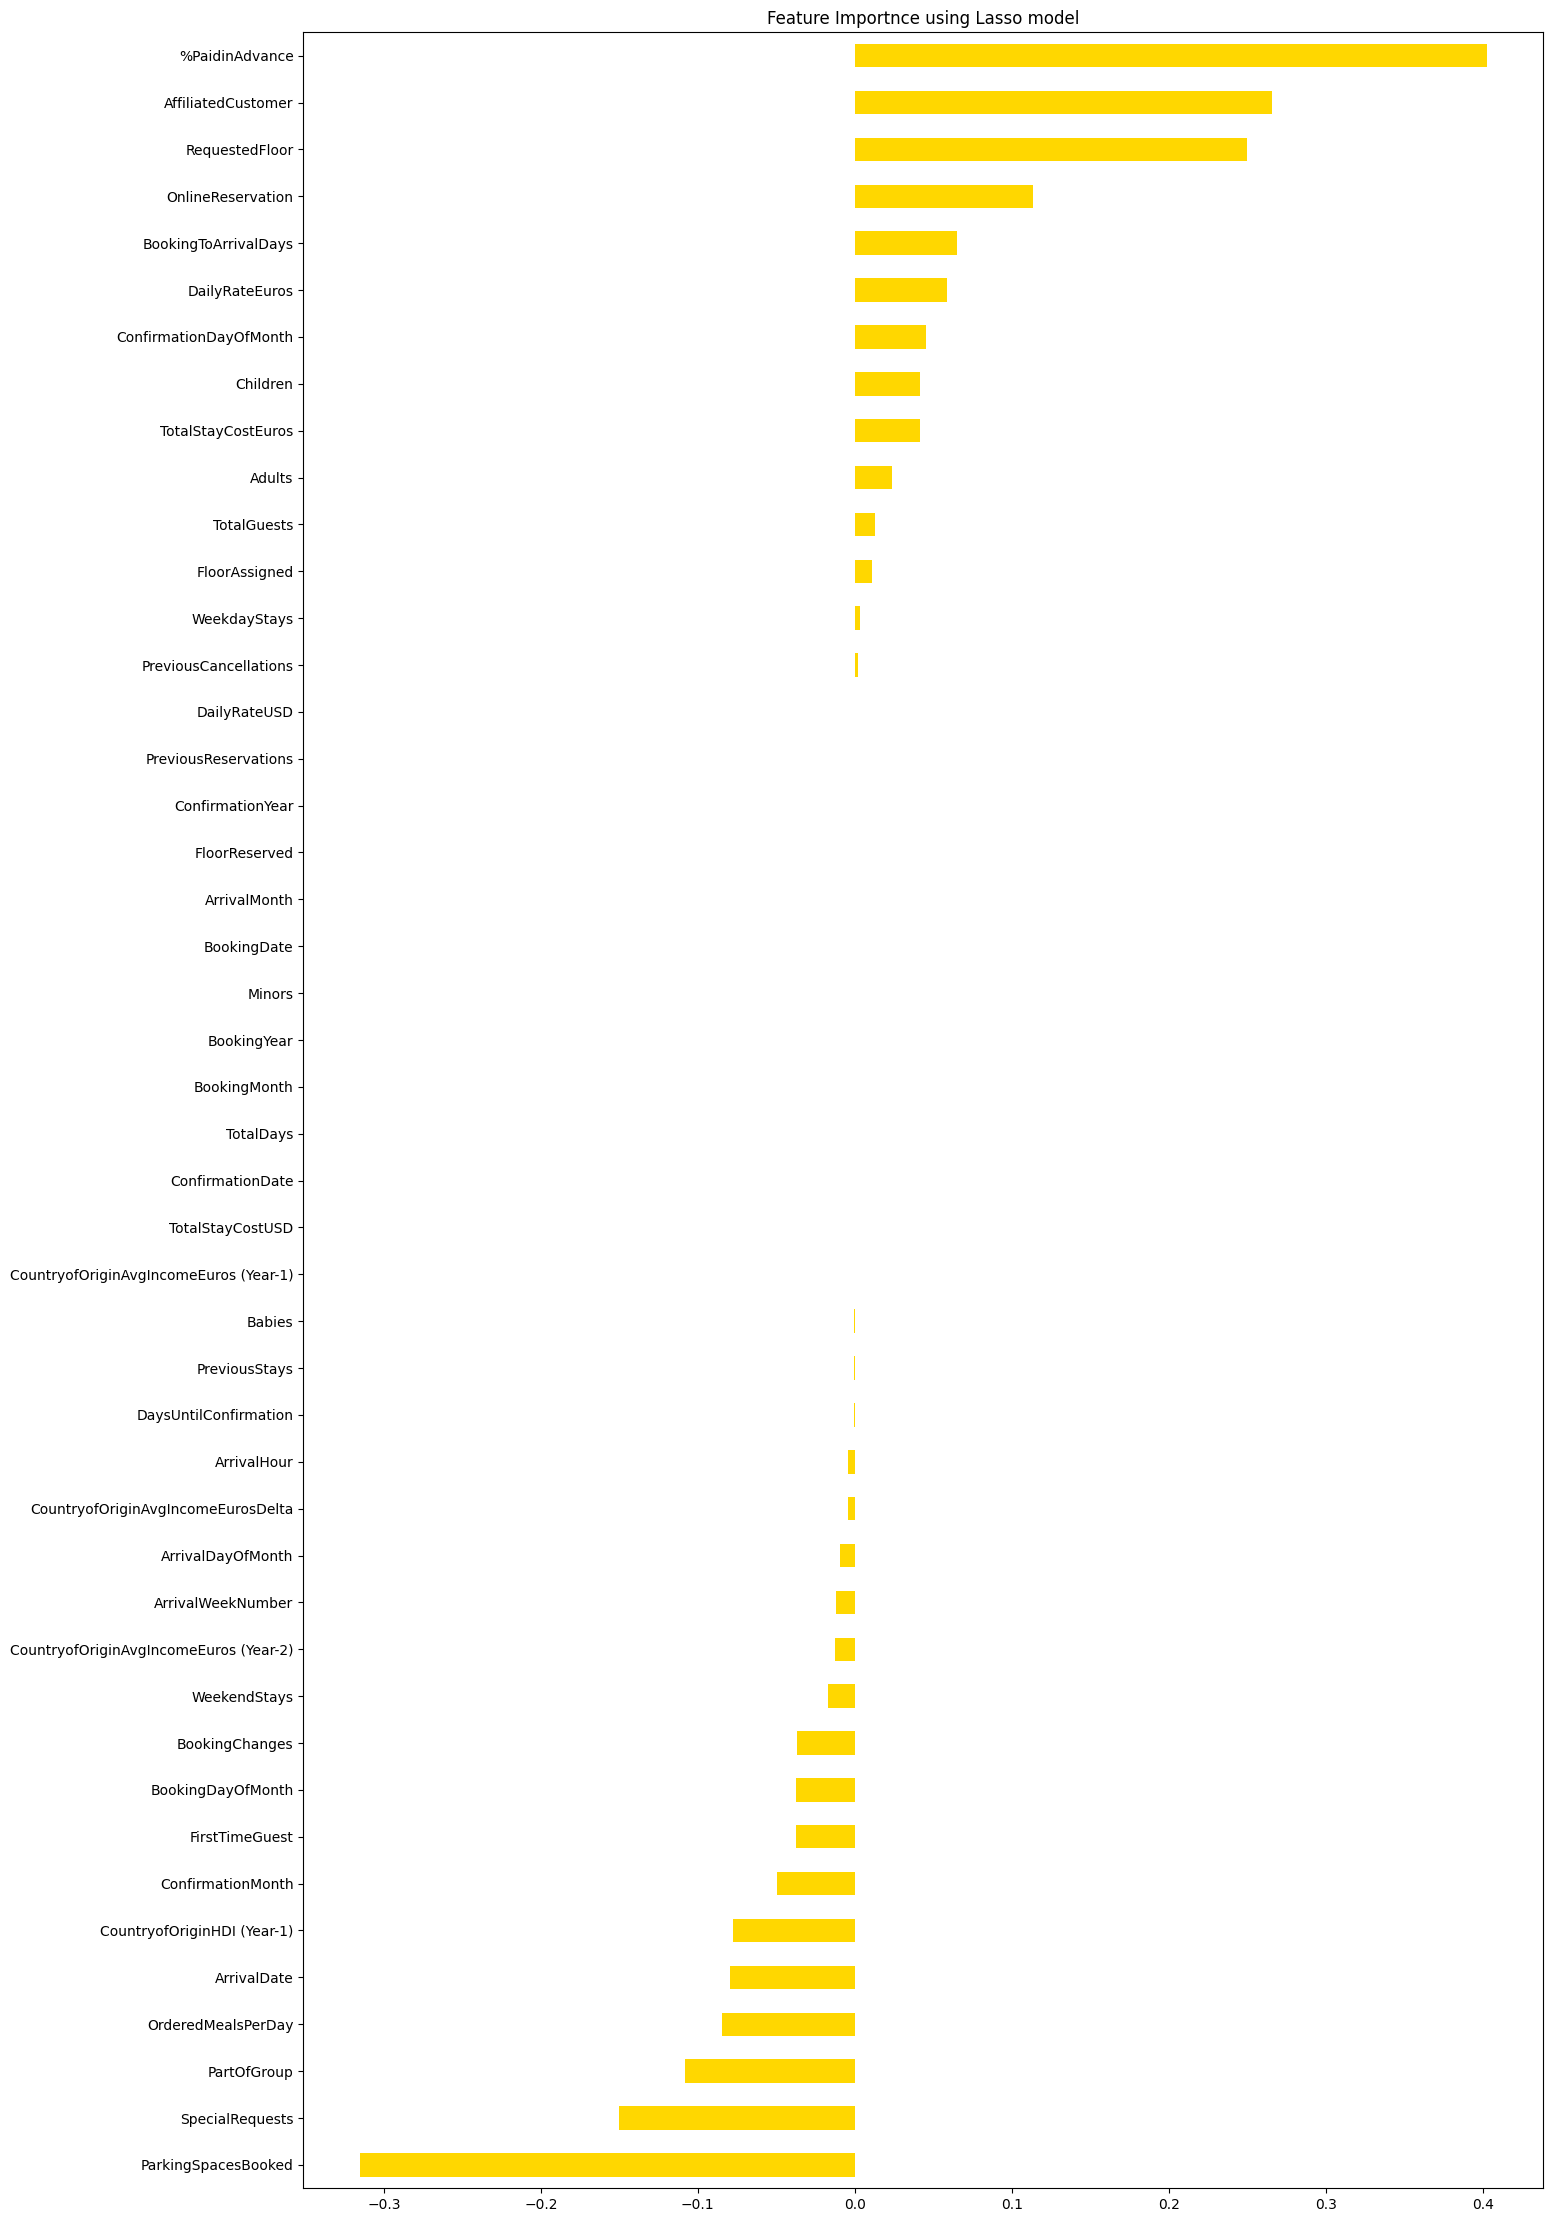

In [ ]:
lasso_reg.fit(tts_train_x_rb, tts_train_y)
coef = pd.Series(lasso_reg.coef_, index = tts_train_x_rb.columns)
coef.sort_values
importance_plot(coef, 'Lasso')

In [ ]:
# ElasticNet

# Instantiate ElasticNet model
elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.5)  # Adjust alpha and l1_ratio as needed

# Fit ElasticNet model to data
elastic_net.fit(tts_train_x_rb, tts_train_y)

# Get selected features based on non-zero coefficients
selected_features_elastic_net = tts_train_x_rb.columns[elastic_net.coef_ != 0]

# Print selected features
print("Selected Features:")
print(selected_features_elastic_net)


Selected Features:
Index(['PreviousStays', 'DaysUntilConfirmation', 'OnlineReservation',
       'BookingChanges', 'BookingToArrivalDays', 'ParkingSpacesBooked',
       'SpecialRequests', 'OrderedMealsPerDay', 'FloorAssigned',
       'DailyRateEuros', 'DailyRateUSD',
       'CountryofOriginAvgIncomeEuros (Year-2)', 'CountryofOriginHDI (Year-1)',
       'RequestedFloor', 'CountryofOriginAvgIncomeEurosDelta', 'TotalGuests',
       'TotalStayCostEuros', 'TotalStayCostUSD', 'ArrivalDate'],
      dtype='object')


#### Modelling

In [ ]:
# Listing the features certain to be dropped according to the cross referenced
# feature selctions
certain_drops_rb = ['ArrivalMonth',
                    'ArrivalWeekNumber',
                    'ArrivalDayOfMonth',
                    'ArrivalHour',
                    'WeekdayStays',
                    'Adults',
                    'Children',
                    'Babies',
                    'FirstTimeGuest',
                    'PreviousReservations',
                    'PreviousStays',
                    'PreviousCancellations',
                    'DaysUntilConfirmation',
                    'PartOfGroup',
                    'FloorReserved',
                    'CountryofOriginAvgIncomeEuros (Year-2)',
                    'CountryofOriginAvgIncomeEuros (Year-1)',
                    'Minors',
                    'TotalDays',
                    'BookingDate',
                    'ConfirmationDate',
                    'BookingDayOfMonth',
                    'ConfirmationDayOfMonth',
                    'ConfirmationMonth',
                    'ConfirmationYear']

# Dropping them from training and testing sets
possible_rb_train = tts_train_x_rb.drop(certain_drops_rb, axis = 1)
possible_rb_valid = tts_val_x_rb.drop(certain_drops_rb, axis = 1)

##### Creating basic models using all plausible features

In [ ]:
# testing a simple LR in the basic dataset
original_lr_train_acc_score, original_lr_val_acc_score = simplest_model_tester(LogisticRegression(), possible_rb_train, tts_train_y, possible_rb_valid, tts_val_y, True)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.85      0.80      6423
           1       0.69      0.55      0.62      3888

    accuracy                           0.74     10311
   macro avg       0.73      0.70      0.71     10311
weighted avg       0.74      0.74      0.73     10311

0.7399864222674813
[[5479  944]
 [1737 2151]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------------------------

In [ ]:
# Testing a simple RF in the basic dataset
original_lr_train_acc_score, original_lr_val_acc_score = simplest_model_tester(RandomForestClassifier(), possible_rb_train, tts_train_y, possible_rb_valid, tts_val_y, True)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6423
           1       1.00      1.00      1.00      3888

    accuracy                           1.00     10311
   macro avg       1.00      1.00      1.00     10311
weighted avg       1.00      1.00      1.00     10311

0.9983512753370187
[[6415    8]
 [   9 3879]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------------------------

In [ ]:
clf = LazyClassifier(verbose=0, ignore_warnings = True, custom_metric = None)
models, predictions = clf.fit(possible_rb_train, possible_rb_valid, tts_train_y, tts_val_y)

models

 97%|█████████▋| 28/29 [00:56<00:01,  1.66s/it]

[LightGBM] [Info] Number of positive: 3888, number of negative: 6423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001932 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1759
[LightGBM] [Info] Number of data points in the train set: 10311, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.377073 -> initscore=-0.501990
[LightGBM] [Info] Start training from score -0.501990


100%|██████████| 29/29 [00:56<00:00,  1.96s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.79,0.76,0.76,0.79,0.33
XGBClassifier,0.78,0.76,0.76,0.78,0.38
RandomForestClassifier,0.78,0.75,0.75,0.78,2.90
ExtraTreesClassifier,0.78,0.75,0.75,0.77,1.45
NuSVC,0.77,0.73,0.73,0.76,12.99
BaggingClassifier,0.76,0.73,0.73,0.76,0.81
SVC,0.76,0.72,0.72,0.76,7.11
AdaBoostClassifier,0.75,0.72,0.72,0.74,0.77
KNeighborsClassifier,0.74,0.71,0.71,0.73,0.36


 - write same text assesing best models -

##### Individual Try With and Withouts (RB version)

###### WeekendStays

In [ ]:
# Excluding WeekednStays
possible_rb_train_am = possible_rb_train.copy()
possible_rb_train_am.drop('WeekendStays', axis = 1, inplace = True)

possible_rb_val_am = possible_rb_valid.copy()
possible_rb_val_am.drop('WeekendStays', axis = 1, inplace = True)

print("Logistic Regression results")
temp_train_acc, temp_val_acc = simplest_model_tester(LogisticRegression(), possible_rb_train_am, tts_train_y, possible_rb_val_am, tts_val_y, False)
print(f"Scores prior to dropping were: \n For the training:{original_lr_train_acc_score} || For the testing: {original_lr_val_acc_score} \n")
print(f"Scores after dropping were: \n For the training:{temp_train_acc} || For the testing: {temp_val_acc} \n")


print("")
print("")

print("RandomForest results")
temp_train_acc, temp_val_acc = simplest_model_tester(RandomForestClassifier(), possible_rb_train_am, tts_train_y, possible_rb_val_am, tts_val_y, False)
print(f"Scores prior to dropping were: \n For the training:{original_rf_train_acc_score} || For the testing: {original_rf_val_acc_score}")
print(f"Scores after dropping were: \n For the training:{temp_train_acc} || For the testing: {temp_val_acc} \n")

Logistic Regression results
Scores prior to dropping were: 
 For the training:0.9983512753370187 || For the testing: 0.7835951134380453 

Scores after dropping were: 
 For the training:0.7392105518378431 || For the testing: 0.7326934264107039 



RandomForest results
Scores prior to dropping were: 
 For the training:0.9982542915333139 || For the testing: 0.7835951134380453
Scores after dropping were: 
 For the training:0.9983512753370187 || For the testing: 0.779522978475858 



We will be keeping because the performance drops slightly in the testing set of the LR

###### BookingMonth

In [ ]:
# Excluding BookingMonth
possible_rb_train_am = possible_rb_train.copy()
possible_rb_train_am.drop('BookingMonth', axis = 1, inplace = True)

possible_rb_val_am = possible_rb_valid.copy()
possible_rb_val_am.drop('BookingMonth', axis = 1, inplace = True)

print("Logistic Regression results")
temp_train_acc, temp_val_acc = simplest_model_tester(LogisticRegression(), possible_rb_train_am, tts_train_y, possible_rb_val_am, tts_val_y, False)
print(f"Scores prior to dropping were: \n For the training:{original_lr_train_acc_score} || For the testing: {original_lr_val_acc_score} \n")
print(f"Scores after dropping were: \n For the training:{temp_train_acc} || For the testing: {temp_val_acc} \n")


print("")
print("")

print("RandomForest results")
temp_train_acc, temp_val_acc = simplest_model_tester(RandomForestClassifier(), possible_rb_train_am, tts_train_y, possible_rb_val_am, tts_val_y, False)
print(f"Scores prior to dropping were: \n For the training:{original_rf_train_acc_score} || For the testing: {original_rf_val_acc_score}")
print(f"Scores after dropping were: \n For the training:{temp_train_acc} || For the testing: {temp_val_acc} \n")

Logistic Regression results
Scores prior to dropping were: 
 For the training:0.9983512753370187 || For the testing: 0.7835951134380453 

Scores after dropping were: 
 For the training:0.7399864222674813 || For the testing: 0.7341477603257708 



RandomForest results
Scores prior to dropping were: 
 For the training:0.9982542915333139 || For the testing: 0.7835951134380453
Scores after dropping were: 
 For the training:0.9983512753370187 || For the testing: 0.7815590459569517 



In this case because the results are inconclusive, we will be keeping the variable in the final datasets

###### BookingYear

In [ ]:
# Excluding BookingMonth
possible_rb_train_am = possible_rb_train.copy()
possible_rb_train_am.drop('BookingYear', axis = 1, inplace = True)

possible_rb_val_am = possible_rb_valid.copy()
possible_rb_val_am.drop('BookingYear', axis = 1, inplace = True)

print("Logistic Regression results")
temp_train_acc, temp_val_acc = simplest_model_tester(LogisticRegression(), possible_rb_train_am, tts_train_y, possible_rb_val_am, tts_val_y, False)
print(f"Scores prior to dropping were: \n For the training:{original_lr_train_acc_score} || For the testing: {original_lr_val_acc_score} \n")
print(f"Scores after dropping were: \n For the training:{temp_train_acc} || For the testing: {temp_val_acc} \n")


print("")
print("")

print("RandomForest results")
temp_train_acc, temp_val_acc = simplest_model_tester(RandomForestClassifier(), possible_rb_train_am, tts_train_y, possible_rb_val_am, tts_val_y, False)
print(f"Scores prior to dropping were: \n For the training:{original_rf_train_acc_score} || For the testing: {original_rf_val_acc_score}")
print(f"Scores after dropping were: \n For the training:{temp_train_acc} || For the testing: {temp_val_acc} \n")

Logistic Regression results
Scores prior to dropping were: 
 For the training:0.9983512753370187 || For the testing: 0.7835951134380453 

Scores after dropping were: 
 For the training:0.7398894384637765 || For the testing: 0.7324025596276905 



RandomForest results
Scores prior to dropping were: 
 For the training:0.9982542915333139 || For the testing: 0.7835951134380453
Scores after dropping were: 
 For the training:0.9983512753370187 || For the testing: 0.7838859802210587 



Again, performances after droppping got worse, therefore we will be keeping the variable in the dataset. <br>

With that being done, we can consider that our final dataset was the one we used previously with the LazyClassifier package. We will pull the results again and analyze which seem to be the most promising models in terms of results of their most basic versions.

##### New Assessment of Basic Models Performance


In [ ]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.79,0.76,0.76,0.79,0.33
XGBClassifier,0.78,0.76,0.76,0.78,0.38
RandomForestClassifier,0.78,0.75,0.75,0.78,2.90
ExtraTreesClassifier,0.78,0.75,0.75,0.77,1.45
NuSVC,0.77,0.73,0.73,0.76,12.99
BaggingClassifier,0.76,0.73,0.73,0.76,0.81
SVC,0.76,0.72,0.72,0.76,7.11
AdaBoostClassifier,0.75,0.72,0.72,0.74,0.77
KNeighborsClassifier,0.74,0.71,0.71,0.73,0.36


Overall, it's fair to say that accuracy scores appear to be slightly smaller to those obtained for the Standard Scaled version of the data. Using this new version of the dataset, the best models appear to be:
- LGBMClassifier; (.79)
- XGBClassifier; (.78)
- RandomForestClassifier; (.78)
- ExtraTreesClassifier; (.775)
- BaggingClassifier; (.76)
- NuSVC; (.76) - highest run-time (10s) - not to be used due to being very time consuming
- SVC; (.76) - higher run-time (6s)
- AdaBoostClassifier; (.745)
- KNeighbors; (.735)
- LogisticRegression; (.735)


In [ ]:
final_rb_train_x = possible_rb_train
final_rb_valid_x = possible_rb_valid

### PowerTransformer

In [ ]:
# pow_trans = PowerTransformer()


# # Fitting to the data
# # Training data
# tts_train_x_pt = pow_trans.fit_transform(tts_train_x)
# tts_train_x_pt = pd.DataFrame(tts_train_x_pt, columns = tts_train_x.columns).set_index(tts_train_x.index)

# # Validation data
# tts_val_x_pt = pow_trans.transform(tts_val_x)
# tts_val_x_pt = pd.DataFrame(tts_val_x_pt, columns = tts_val_x.columns).set_index(tts_val_x.index)


The PowerTransformer doesn't seem to work, therefore we will not be using it for the purpose of this project. <br>
After some careful research, it was found that the one of the best (if not the best) ways to assess model performances was by doing a K-Folds Cross-Validation technique. By applying this technique, we are able to obtain more robust results to assess a model's performance. <br>
Initially the plan was not to have a Train, a Validation and a Test Sets as we did not have enough data to create the three subsets. However, after doing the train-test splitting in order to do the Selection of our best features and also the division of our data into a training and a testing set - and using teh information gathered upon researching - it was thought that the idea of using K-Folds Cross validation on the training set could be very interesting in order to assess model performance, as we could use all the training data that we had originally deemed for training to also validate the training.
This way, we will be able to train the data and validate this training at the same time and then we will be tetsing these results in the test set. <br>
Having said that, we will be using the Robust Scaler data, as we obtained the same accuracy results for the basic models (obviously Weighted F1-Score-wise) and we will be applying the K-Folds Cross Validation method in the training set to create a validation system.<br>
<br>
Data that will be used from this point:

- Training Data (to apply K-Folds CV on): final_rb_train_x + tts_train_y
- Testing Data: final_rb_valid_x + tts_val_y

## Hyperparameter Tuning and Final Model Selection

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.svm import NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Define the parameter grids for each classifier
param_grid = {
    'LGBMClassifier': {
        'num_leaves': [10, 20, 30],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.1, 0.01, 0.001]
    },
    'XGBClassifier': {
        'max_depth': [3, 5, 7],
        'learning_rate': [0.1, 0.01, 0.001]
    },
    'RandomForestClassifier': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'ExtraTreesClassifier': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'BaggingClassifier': {
        'n_estimators': [10, 20, 30],
        'max_samples': [0.5, 0.7, 1.0]
    },
    'SVC': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly']
    },
    'AdaBoostClassifier': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.1, 0.01, 0.001]
    },
    'KNeighborsClassifier': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    },
    'LogisticRegression': {
        'C': [0.1, 1, 10],
        'penalty': ['l1', 'l2']
    }
}

# Initialize classifiers
classifiers = {
    'LGBMClassifier': LGBMClassifier(),
    'XGBClassifier': XGBClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'BaggingClassifier': BaggingClassifier(),
    'SVC': SVC(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression()
}

# Perform GridSearchCV for each classifier
for classifier_name, classifier in classifiers.items():
    print(f"Performing GridSearchCV for {classifier_name}...")
    clf = GridSearchCV(classifier, param_grid[classifier_name], cv=5, verbose=2, n_jobs=-1)
    clf.fit(final_rb_train_x, tts_train_y)
    print(f"Best parameters for {classifier_name}: {clf.best_params_}")
    print(f"Best score for {classifier_name}: {clf.best_score_} \n")


Performing GridSearchCV for LGBMClassifier...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3888, number of negative: 6423
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004367 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1744
[LightGBM] [Info] Number of data points in the train set: 10311, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.377073 -> initscore=-0.501990
[LightGBM] [Info] Start training from score -0.501990
Best parameters for LGBMClassifier: {'learning_rate': 0.1, 'max_depth': 7, 'num_leaves': 30}
Best score for LGBMClassifier: 0.7889636019225625 

Performing GridSearchCV for XGBClassifier...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters for XGBClassifier: {'learning_rate': 0.1, 'max_depth':

In [ ]:
# to let run during a night
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Define the parameter grids for each classifier
param_grid = {
   'LGBMClassifier': {
       'num_leaves': [10, 20, 30],
       'max_depth': [3, 5, 7],
       'learning_rate': [0.1, 0.01, 0.001],
       'subsample': [0.6, 0.8, 1.0],  # Subsample ratio of the training instances
       'colsample_bytree': [0.6, 0.8, 1.0],  # Subsample ratio of columns when constructing each tree
      'reg_alpha': [0, 0.1, 0.5],  # L1 regularization term on weights
      'reg_lambda': [0, 0.1, 0.5],  # L2 regularization term on weights
   },
    'XGBClassifier': {
        'max_depth': [3, 5, 7],
        'learning_rate': [0.1, 0.01, 0.001],
        'n_estimators': [50, 100, 200],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'gamma': [0, 0.1, 0.5],
        'scale_pos_weight': [1, 2, 5]  # Adjust for class imbalance
    },
    'RandomForestClassifier': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'ExtraTreesClassifier': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'BaggingClassifier': {
        'n_estimators': [10, 20, 30],
        'max_samples': [0.5, 0.7, 1.0]
    },
    'AdaBoostClassifier': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.1, 0.01, 0.001]
    },
    'SVC': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly']
    },
    'KNeighborsClassifier': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    },
    'LogisticRegression': {
        'C': [0.1, 1, 10],
        'penalty': ['l1', 'l2']
    }
}

# Initialize classifiers
classifiers = {
 #   'LGBMClassifier': LGBMClassifier(),
    'XGBClassifier': XGBClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'BaggingClassifier': BaggingClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'SVC': SVC(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression()
}

# Perform GridSearchCV for each classifier
for classifier_name, classifier in classifiers.items():
    print(f"Performing GridSearchCV for {classifier_name}...")
    clf = GridSearchCV(classifier, param_grid[classifier_name], cv=5, verbose=2, n_jobs=-1)
    clf.fit(final_rb_train_x, tts_train_y)
    print(f"Best parameters for {classifier_name}: {clf.best_params_}")
    print(f"Best score for {classifier_name}: {clf.best_score_} \n")


Performing GridSearchCV for XGBClassifier...
Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best parameters for XGBClassifier: {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'scale_pos_weight': 1}
Best score for XGBClassifier: 0.7926490618269421 

Performing GridSearchCV for RandomForestClassifier...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for RandomForestClassifier: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best score for RandomForestClassifier: 0.7860542757644385 

Performing GridSearchCV for ExtraTreesClassifier...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for ExtraTreesClassifier: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Best score for ExtraTreesClassifier: 0.7850848138158202 

Performing GridSearchCV for BaggingClassifier...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best paramete

Looking at the outputs of the code above, we can celarly see that there are some models that outperform some of the others, with some even proving to be advantageous due to having a very reduced running time.
Out of the tested models, the ones we will be testing with the given hyperparameters are:
- LGBMClassifier;
- XGBClassifier;
- RandomForestClassifier;
- ExtraTreesClassifier;
- BaggingClassifier;

*Note: despite the model being slightly worse in terms of Train Performance teh AdaBoostClassifier will be kept in mind, in case Ensemble Methods are to be tested in the future.

#### LGBMClassifier with tested hyperparameters

In [ ]:
# First LGBMClassifier with tested hyperparameters
simplest_model_tester(LGBMClassifier(learning_rate = 0.1, max_depth = 7, num_leaves = 30),
                      final_rb_train_x, tts_train_y, final_rb_valid_x, tts_val_y)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3888, number of negative: 6423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001934 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1744
[LightGBM] [Info] Number of data points in the train set: 10311, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.377073 -> initscore=-0.501990
[LightGBM] [Info] Start training from score -0.501990
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-sc

(0.8449228978760547, 0.789412449098313)

In [ ]:
# Second LGBMClassifier with tested hyperparameters
simplest_model_tester(LGBMClassifier(learning_rate = 0.1, max_depth = 5, n_estimators = 200, num_leaves = 20),
                      final_rb_train_x, tts_train_y, final_rb_valid_x, tts_val_y)
# worse than first

In [ ]:
# Third LGBMClassifier with tested hyperparameters (big gridsearch outcome)
simplest_model_tester(LGBMClassifier(colsample_bytree = 1.0, learning_rate = 0.1, max_depth = 7, num_leaves = 30, reg_alpha = 0, reg_lambda = 0.1, subsample = 0.6),
                      final_rb_train_x, tts_train_y, final_rb_valid_x, tts_val_y)
# meh

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3888, number of negative: 6423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002601 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1744
[LightGBM] [Info] Number of data points in the train set: 10311, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.377073 -> initscore=-0.501990
[LightGBM] [Info] Start training from score -0.501990
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

(0.8432741732130734, 0.7853403141361257)

#### XGBClassifier with tested hyperparameters

In [ ]:
# First XGBClassifier with tested hyperparameters
# Currently the best
simplest_model_tester(XGBClassifier(learning_rate = 0.1, max_depth = 7),
                      final_rb_train_x, tts_train_y, final_rb_valid_x, tts_val_y)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      6423
           1       0.85      0.78      0.81      3888

    accuracy                           0.87     10311
   macro avg       0.86      0.85      0.85     10311
weighted avg       0.87      0.87      0.86     10311

0.8657744156725827
[[5881  542]
 [ 842 3046]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------------------------

(0.8657744156725827, 0.7897033158813264)

In [ ]:
# Second XGBClassifier with tested hyperparameters
# Currently the best interpretation-wise and score wise (fn are lower)
simplest_model_tester(XGBClassifier(learning_rate = 0.1, max_depth = 5, n_estimators = 200),
                      final_rb_train_x, tts_train_y, final_rb_valid_x, tts_val_y)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      6423
           1       0.83      0.76      0.79      3888

    accuracy                           0.85     10311
   macro avg       0.85      0.83      0.84     10311
weighted avg       0.85      0.85      0.85     10311

0.8501600232761128
[[5817  606]
 [ 939 2949]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------------------------

(0.8501600232761128, 0.7926119837114601)

In [ ]:
# Third XGBClassifier
simplest_model_tester(XGBClassifier(colsample_bytree = 0.6, gamma = 0, learning_rate = 0.1, max_depth = 7, n_estimators = 100, scale_pos_weight = 1),  final_rb_train_x, tts_train_y, final_rb_valid_x, tts_val_y)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      6423
           1       0.85      0.78      0.81      3888

    accuracy                           0.87     10311
   macro avg       0.86      0.85      0.85     10311
weighted avg       0.86      0.87      0.86     10311

0.865192512850354
[[5893  530]
 [ 860 3028]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------

(0.865192512850354, 0.7902850494473531)

#### RandomForestClassifier with tested hyperparameters

In [ ]:
# First RandomForestClassifier with tested hyperparameters
simplest_model_tester(RandomForestClassifier(max_depth= None, min_samples_split = 10, n_estimators = 200),
                      final_rb_train_x, tts_train_y, final_rb_valid_x, tts_val_y)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      6423
           1       0.95      0.89      0.92      3888

    accuracy                           0.94     10311
   macro avg       0.94      0.93      0.94     10311
weighted avg       0.94      0.94      0.94     10311

0.9424886044030647
[[6240  183]
 [ 410 3478]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------------------------

(0.9424886044030647, 0.7847585805700988)

In [ ]:
# Second RandomForestClassifier with tested hyperparameters
#simplest_model_tester(RandomForestClassifier(max_depth= 20, min_samples_split = 2, n_estimators = 300),
#                     final_rb_train_x, tts_train_y, final_rb_valid_x, tts_val_y)
# worse than first one

#### ExtraTreesClassifier with tested hyperparameters

In [ ]:
# First ExtraTreesClassifier with tested hyperparameters
simplest_model_tester(ExtraTreesClassifier(max_depth= None, min_samples_split = 5, n_estimators = 200),
                      final_rb_train_x, tts_train_y, final_rb_valid_x, tts_val_y)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6423
           1       1.00      0.99      0.99      3888

    accuracy                           1.00     10311
   macro avg       1.00      0.99      0.99     10311
weighted avg       1.00      1.00      1.00     10311

0.9950538260110562
[[6408   15]
 [  36 3852]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------------------------

(0.9950538260110562, 0.7818499127399651)

In [ ]:
# Second ExtraTreesClassifier with tested hyperparameters
#simplest_model_tester(ExtraTreesClassifier(max_depth= None, min_samples_split = 5, n_estimators = 300),
#                      final_rb_train_x, tts_train_y, final_rb_valid_x, tts_val_y)
# worse than first one

#### BaggingClassifier with tested hyperparameters

In [ ]:
# First BaggingClassifier with tested hyperparameters
simplest_model_tester(BaggingClassifier(max_samples = 0.7, n_estimators = 200),
                      final_rb_train_x, tts_train_y, final_rb_valid_x, tts_val_y)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6423
           1       1.00      0.99      0.99      3888

    accuracy                           0.99     10311
   macro avg       1.00      0.99      0.99     10311
weighted avg       0.99      0.99      0.99     10311

0.9948598584036465
[[6409   14]
 [  39 3849]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------------------------

(0.9948598584036465, 0.7818499127399651)

In [ ]:
# Second BaggingClassifier with tested hyperparameters
simplest_model_tester(BaggingClassifier(max_features = 1.0, max_samples = 0.5, n_estimators = 50),
                      final_rb_train_x, tts_train_y, final_rb_valid_x, tts_val_y)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      6423
           1       0.96      0.91      0.94      3888

    accuracy                           0.95     10311
   macro avg       0.95      0.94      0.95     10311
weighted avg       0.95      0.95      0.95     10311

0.9526719037920667
[[6274  149]
 [ 339 3549]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------------------------

(0.9526719037920667, 0.7853403141361257)

## Testing Combinations of Ensemble Models

#### Voting Classifier with Different Base Models:


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Define base classifiers
base_classifiers = [
    ('decision_tree', DecisionTreeClassifier()),
    ('random_forest', RandomForestClassifier()),
    ('gradient_boosting', GradientBoostingClassifier()),
]

# Initialize VotingClassifier with the list of base classifiers
voting_classifier = VotingClassifier(estimators=base_classifiers)

# Fit the VotingClassifier to the training data
voting_classifier.fit(final_rb_train_x, tts_train_y)

# Evaluate the VotingClassifier on the validation set
validation_score = voting_classifier.score(final_rb_valid_x, tts_val_y)
print("Validation score of the VotingClassifier:")
print(validation_score)

Validation score of the VotingClassifier:
0.7838859802210587


#### Stacking Classifier with Different Meta-Classifiers:


In [ ]:
from sklearn.ensemble import StackingClassifier

# Define base classifiers
base_classifiers = [
    ('decision_tree', DecisionTreeClassifier()),
    ('random_forest', RandomForestClassifier())
]

# Define meta-classifier
meta_classifier = LogisticRegression()

# Initialize StackingClassifier with the list of base classifiers and meta-classifier
stacking_classifier = StackingClassifier(estimators=base_classifiers, final_estimator=meta_classifier)

# Fit and evaluate the StackingClassifier as usual
stacking_classifier.fit(final_rb_train_x, tts_train_y)

# Evaluate the VotingClassifier on the validation set
validation_score = stacking_classifier.score(final_rb_valid_x, tts_val_y)
print("Validation score of the VotingClassifier:")
print(validation_score)

Validation score of the VotingClassifier:
0.783304246655032


#### Bagging with Different Base Models:


In [ ]:
from sklearn.ensemble import BaggingClassifier

# Define base classifier
base_classifier = DecisionTreeClassifier()

# Initialize BaggingClassifier with the base classifier
bagging_classifier = BaggingClassifier(base_classifier)

# Fit and evaluate the BaggingClassifier as usual
bagging_classifier.fit(final_rb_train_x, tts_train_y)

# Evaluate the VotingClassifier on the validation set
validation_score = bagging_classifier.score(final_rb_valid_x, tts_val_y)
print("Validation score of the BaggingClassifier:")
print(validation_score)

Validation score of the BaggingClassifier:
0.7670157068062827


#### AdaBoost with Different Base Models:


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Define base classifier
base_classifier = RandomForestClassifier()

# Initialize AdaBoostClassifier with the base classifier
adaboost_classifier = AdaBoostClassifier(base_classifier)

# Fit and evaluate the AdaBoostClassifier as usual
adaboost_classifier.fit(final_rb_train_x, tts_train_y)

# Evaluate the VotingClassifier on the validation set
validation_score = adaboost_classifier.score(final_rb_valid_x, tts_val_y)
print("Validation score of the BaggingClassifier:")
print(validation_score)

Validation score of the BaggingClassifier:
0.7705061082024433


#### Ensemble Combination of Different Models:


In [ ]:
# Firstly a GridSeacrh to find the optimal combination of hyperparameters for
# Combinated models
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# Define base classifiers with reduced hyperparameter grids
base_classifiers = {
    'decision_tree': (DecisionTreeClassifier(), {
        'max_depth': [3, None],
        'min_samples_split': [2, 10]
    }),
    'random_forest': (RandomForestClassifier(), {
        'n_estimators': [50, 200],
        'max_depth': [3, None],
        'min_samples_split': [2, 10]
    }),
    'logistic_regression': (LogisticRegression(), {
        'C': [0.1, 10],
        'penalty': ['l1', 'l2']
    }),
    'xgboost': (XGBClassifier(), {
        'max_depth': [3, 7],
        'learning_rate': [0.1, 0.001],
        'n_estimators': [50, 200]
    })
}

# Define combinations of models to test
model_combinations = [
    [('xgboost', {}), ('random_forest', {})],
    [('decision_tree', {}), ('logistic_regression', {}), ('xgboost', {})]
]

# Initialize list to store results
results = []

# Perform GridSearchCV for each model combination
for combination in model_combinations:
    estimators = []
    param_grids = {}
    for model_name, model_params in combination:
        estimators.append((model_name, base_classifiers[model_name][0]))
        param_grids.update({f'{model_name}__{k}': v for k, v in base_classifiers[model_name][1].items()})

    # Initialize VotingClassifier with the list of base classifiers
    voting_classifier = VotingClassifier(estimators=estimators)

    # Perform GridSearchCV
    grid_search = GridSearchCV(voting_classifier, param_grids, cv=5, verbose=2, n_jobs=-1)
    grid_search.fit(final_rb_train_x, tts_train_y)

    # Store results
    results.append({
        'combination': combination,
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_,
        'validation_score': grid_search.score(final_rb_valid_x, tts_val_y)
    })

# Print results
for result in results:
    print("Combination:", result['combination'])
    print("Best parameters:", result['best_params'])
    print("Best score:", result['best_score'])
    print("Validation score:", result['validation_score'])
    print()


Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 128 candidates, totalling 640 fits
Combination: [('xgboost', {}), ('random_forest', {})]
Best parameters: {'random_forest__max_depth': None, 'random_forest__min_samples_split': 2, 'random_forest__n_estimators': 200, 'xgboost__learning_rate': 0.1, 'xgboost__max_depth': 7, 'xgboost__n_estimators': 200}
Best score: 0.7887697565484522
Validation score: 0.7853403141361257

Combination: [('decision_tree', {}), ('logistic_regression', {}), ('xgboost', {})]
Best parameters: {'decision_tree__max_depth': None, 'decision_tree__min_samples_split': 2, 'logistic_regression__C': 10, 'logistic_regression__penalty': 'l2', 'xgboost__learning_rate': 0.1, 'xgboost__max_depth': 7, 'xgboost__n_estimators': 200}
Best score: 0.7796532880604319
Validation score: 0.7763234438627109



In [ ]:
# Best parameters for the first combination
best_params_1 = {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}

# Initialize base classifiers with best parameters
xgboost_classifier_1 = XGBClassifier(**best_params_1)
random_forest_classifier_1 = RandomForestClassifier(**best_params_1)

# Initialize VotingClassifier with the list of base classifiers
voting_classifier_1 = VotingClassifier(estimators=[
    ('xgboost', xgboost_classifier_1),
    ('random_forest', random_forest_classifier_1)
])

# Test the first combination
train_score_1, val_score_1 = simplest_model_tester(voting_classifier_1, final_rb_train_x, tts_train_y, final_rb_valid_x, tts_val_y)
print("Train accuracy:", train_score_1)
print("Validation accuracy:", val_score_1)


___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      6423
           1       1.00      0.95      0.98      3888

    accuracy                           0.98     10311
   macro avg       0.99      0.98      0.98     10311
weighted avg       0.98      0.98      0.98     10311

0.9821549801183203
[[6417    6]
 [ 178 3710]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------------------------

In [ ]:
# Best parameters for the second combination - split into separate dictionaries
decision_tree_params = {
    'max_depth': None,
    'min_samples_split': 4
}

logistic_regression_params = {
    'C': 8,
    'penalty': 'l2'
}

xgboost_params = {
    'learning_rate': 0.008,
    'max_depth': 8,
    'n_estimators': 125
}

# Initialize base classifiers with best parameters
decision_tree_classifier_2 = DecisionTreeClassifier(**decision_tree_params)
logistic_regression_classifier_2 = LogisticRegression(**logistic_regression_params)
xgboost_classifier_2 = XGBClassifier(**xgboost_params)

# Initialize VotingClassifier with the list of base classifiers
voting_classifier_2 = VotingClassifier(estimators=[
    ('decision_tree', decision_tree_classifier_2),
    ('logistic_regression', logistic_regression_classifier_2),
    ('xgboost', xgboost_classifier_2)
])

# Test the second combination
train_score_2, val_score_2 = simplest_model_tester(voting_classifier_2, final_rb_train_x, tts_train_y, final_rb_valid_x, tts_val_y)
print("Train accuracy:", train_score_2)
print("Validation accuracy:", val_score_2)


___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      6423
           1       0.86      0.66      0.75      3888

    accuracy                           0.83     10311
   macro avg       0.84      0.80      0.81     10311
weighted avg       0.83      0.83      0.83     10311

0.8305692949277471
[[6000  423]
 [1324 2564]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
---------------------------------------------------------------------------------------

In [ ]:
# GridSsearch to try and improve the second combination as it appeared promising
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define base classifiers
decision_tree_classifier = DecisionTreeClassifier()
logistic_regression_classifier = LogisticRegression()
xgboost_classifier = XGBClassifier()

# Define hyperparameter grids for each classifier
param_grid_decision_tree = {
    'max_depth': [None, 3, 5, 7],
    'min_samples_split': [2, 4, 6, 8]
}

param_grid_logistic_regression = {
    'C': [0.1, 1, 5, 10],
    'penalty': ['l1', 'l2']
}

param_grid_xgboost = {
    'learning_rate': [0.001, 0.01, 0.1],
    'max_depth': [3, 5, 7, 9],
    'n_estimators': [50, 100, 150, 200]
}

# Create grid search for each classifier
grid_search_decision_tree = GridSearchCV(decision_tree_classifier, param_grid_decision_tree, cv=5)
grid_search_logistic_regression = GridSearchCV(logistic_regression_classifier, param_grid_logistic_regression, cv=5)
grid_search_xgboost = GridSearchCV(xgboost_classifier, param_grid_xgboost, cv=5)

# Fit grid search models
grid_search_decision_tree.fit(final_rb_train_x, tts_train_y)
grid_search_logistic_regression.fit(final_rb_train_x, tts_train_y)
grid_search_xgboost.fit(final_rb_train_x, tts_train_y)

# Get best parameters
best_params_decision_tree = grid_search_decision_tree.best_params_
best_params_logistic_regression = grid_search_logistic_regression.best_params_
best_params_xgboost = grid_search_xgboost.best_params_

# Initialize base classifiers with best parameters
decision_tree_classifier = DecisionTreeClassifier(**best_params_decision_tree)
logistic_regression_classifier = LogisticRegression(**best_params_logistic_regression)
xgboost_classifier = XGBClassifier(**best_params_xgboost)

# Initialize VotingClassifier with the list of base classifiers
voting_classifier = VotingClassifier(estimators=[
    ('decision_tree', decision_tree_classifier),
    ('logistic_regression', logistic_regression_classifier),
    ('xgboost', xgboost_classifier)
])

# Fit the VotingClassifier
voting_classifier.fit(final_rb_train_x, tts_train_y)

# Evaluate on validation set
train_preds = voting_classifier.predict(final_rb_train_x)
val_preds = voting_classifier.predict(final_rb_valid_x)

train_acc = accuracy_score(tts_train_y, train_preds)
val_acc = accuracy_score(tts_val_y, val_preds)

print("Train accuracy:", train_acc)
print("Validation accuracy:", val_acc)


Train accuracy: 0.8260110561536224
Validation accuracy: 0.7777777777777778


Despite the fact that these combinations of models appeared to be promising, the results turned out to be very disappointing. With that being said, we will stick to the best results obtained in the previous section.